In [ ]:
## Importing libraries

from scipy import signal
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import scipy.io
from google.colab import drive
import matplotlib.pyplot as plt
from random import random
from scipy import fftpack

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Extracting signals from .mat files
p = [4,5,8]
signals = {}

for i in p:
  patient = "Paciente_0"+str(i)
  signals[patient] = {}
  path = '/content/drive/MyDrive/Imagem_e_Acao/Sinais/Paciente' + str(i) + '/Paciente' + str(i) + '_left.mat'
  signals[patient]["left"] = np.loadtxt(path)
  path = '/content/drive/MyDrive/Imagem_e_Acao/Sinais/Paciente' + str(i) + '/Paciente' + str(i) + '_right.mat'
  signals[patient]["right"] = np.loadtxt(path)

**Comentários:**

Extração das informações dos sinais no tempo por paciente e por mão (esquerda e direita).

In [ ]:
chanels = {}
for k in p:
  patient = "patient_"+str(k)
  chanels[patient] = {}
  chanels[patient]["left"] = {}
  chanels[patient]["right"] = {}
  for j in range(3): 
    chanel = "chanel_0" + str(j+1) + "_" + patient
    chanels[patient]["left"][chanel+"_left"] = []
    chanels[patient]["right"][chanel+"_right"] = []
    for i in signals["Paciente_0"+str(k)]["left"][:]:
      chanels[patient]["left"][chanel+"_left"].append(i[j])
    for i in signals["Paciente_0"+str(k)]["right"][:]:
      chanels[patient]["right"][chanel+"_right"].append(i[j])
  
  df_left = pd.DataFrame(data=chanels[patient]["left"])
  display(df_left)
  df_right = pd.DataFrame(data=chanels[patient]["right"])
  display(df_right)

  print("\n")


chanel_01_patient_4_left  chanel_02_patient_4_left  \
0                     -0.155642                  0.997940   
1                     -0.704967                  0.012207   
2                     -0.289921                  1.348898   
3                      1.165789                  0.952163   
4                      0.430304                  1.113909   
...                         ...                       ...   
18835                  5.859464                  1.815824   
18836                  4.672313                  2.993820   
18837                  4.711986                  1.867704   
18838                  4.818799                  0.445563   
18839                  4.693675                 -2.948043   

       chanel_03_patient_4_left  
0                      0.341802  
1                     -1.992828  
2                     -3.140307  
3                     -1.223774  
4                     -0.134279  
...                         ...  
18835                  4.992752  
18836                  6.506447  
18837                  5.758755  
18838                  4.620432  
18839                  3.256275  

[18840 rows x 3 columns]

chanel_01_patient_4_right  chanel_02_patient_4_right  \
0                       0.704967                  -1.840238   
1                       1.831083                  -1.321431   
2                       0.808728                  -2.484169   
3                      -1.016251                  -3.305104   
4                      -0.247196                  -2.316320   
...                          ...                        ...   
18835                   4.324407                   0.259403   
18836                   5.218585                  -1.092546   
18837                   2.514687                  -0.711070   
18838                   3.997864                  -1.532006   
18839                   1.647974                  -2.197299   

       chanel_03_patient_4_right  
0                       1.324483  
1                       2.478065  
2                       3.775082  
3                       2.435340  
4                       4.693675  
...                          ...  
18835                   2.102693  
18836                   0.561532  
18837                  -0.265507  
18838                   0.149538  
18839                  -0.119020  

[18840 rows x 3 columns]

chanel_01_patient_5_left  chanel_02_patient_5_left  \
0                     -3.466850                  2.169833   
1                     -4.324407                  0.292973   
2                     -4.208438                 -0.982681   
3                     -4.202335                 -0.793469   
4                     -3.192187                  0.347906   
...                         ...                       ...   
18835                 -3.927672                  0.534066   
18836                 -2.569619                  2.673381   
18837                 -3.125048                  3.045701   
18838                 -2.520790                  4.510567   
18839                 -1.940948                  3.698787   

       chanel_03_patient_5_left  
0                     -1.226825  
1                     -4.196231  
2                     -4.245060  
3                     -2.981613  
4                     -3.567559  
...                         ...  
18835                 -2.560464  
18836                 -1.712062  
18837                 -0.411994  
18838                  1.953155  
18839                  0.094606  

[18840 rows x 3 columns]

chanel_01_patient_5_right  chanel_02_patient_5_right  \
0                       0.656138                   3.616388   
1                      -0.982681                   2.298009   
2                      -1.574731                   0.833143   
3                      -1.315328                   0.378424   
4                      -1.315328                   1.355001   
...                          ...                        ...   
18835                  -0.836194                   0.619516   
18836                  -0.939956                   1.583886   
18837                  -1.260395                   1.763943   
18838                  -1.355001                   1.705959   
18839                   2.148470                   4.043641   

       chanel_03_patient_5_right  
0                       4.504463  
1                       2.197299  
2                       0.772107  
3                      -1.608301  
4                      -0.238041  
...                          ...  
18835                   0.775158  
18836                   0.369268  
18837                   0.668345  
18838                   0.027466  
18839                   2.636759  

[18840 rows x 3 columns]

chanel_01_patient_8_left  chanel_02_patient_8_left  \
0                      2.908370                  4.748608   
1                      4.476997                  5.169757   
2                      3.179980                  5.191119   
3                      4.299992                  5.416953   
4                      2.511635                  4.690623   
...                         ...                       ...   
25115                  4.443427                  5.810636   
25116                  4.589914                  5.859464   
25117                  2.929732                  5.664149   
25118                  1.025406                  3.759823   
25119                  0.634775                  3.027390   

       chanel_03_patient_8_left  
0                      7.400626  
1                      8.908217  
2                     10.052644  
3                      9.552148  
4                      9.118791  
...                         ...  
25115                 10.159457  
25116                 10.598917  
25117                 10.598917  
25118                  8.645762  
25119                  6.692607  

[25120 rows x 3 columns]

chanel_01_patient_8_right  chanel_02_patient_8_right  \
0                       2.282750                  -0.512703   
1                       0.793469                  -0.915541   
2                       0.216678                  -1.684596   
3                       0.430304                  -1.922637   
4                      -0.979629                  -2.145418   
...                          ...                        ...   
25115                   9.329366                   6.298924   
25116                  12.063783                   7.815671   
25117                  14.261082                  10.354772   
25118                  14.651713                   9.915312   
25119                  14.309911                   9.182879   

       chanel_03_patient_8_right  
0                      -1.223774  
1                       0.573739  
2                       0.869764  
3                      -2.850385  
4                      -0.650034  
...                          ...  
25115                   4.736400  
25116                   1.562524  
25117                   4.589914  
25118                   4.687572  
25119                   4.248112  

[25120 rows x 3 columns]

**Comentários:**

Plot do janelamento dos sinais por canal, por paciente, por mão.

In [ ]:
 
def plot_signals(chanels=list,text=str,start=int,tam=int):
  for i,j in zip(range(3),chanels):
    t = np.linspace(0,0.4,tam)
    hex = '#{:06X}'.format(round(random() * 0xffffff))
    f = plt.figure(figsize=(100,5))
    plt.subplot(1,6,(i+1), title=text+'_chanel_'+str(i+1))
    plt.xlabel('s', fontsize=10)
    plt.ylabel('µV', fontsize=10)
    plt.stem(t, j[start:start+tam], linefmt=hex)

  plt.show()

In [ ]:
start = 10000
tam = 100 ## 100 samples used to the 0,4s of observation

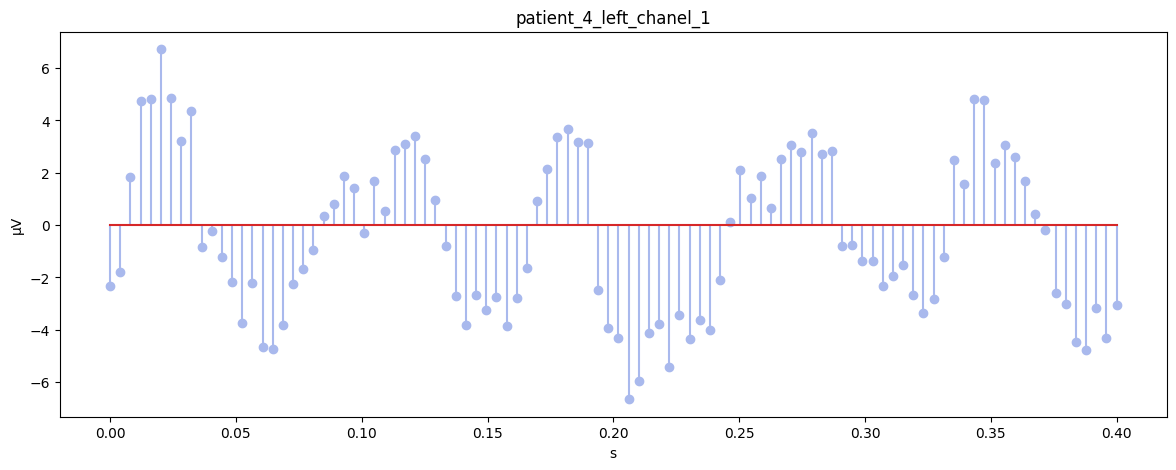

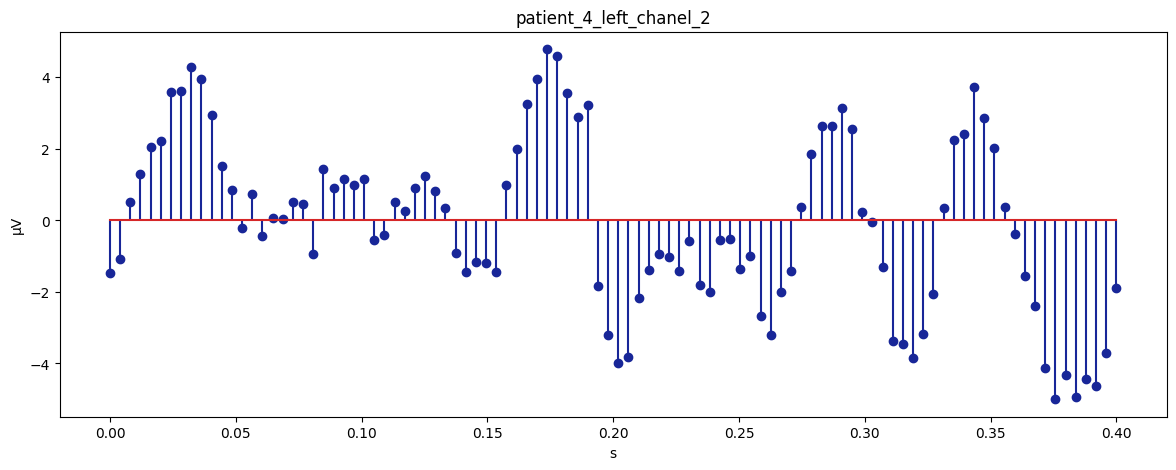

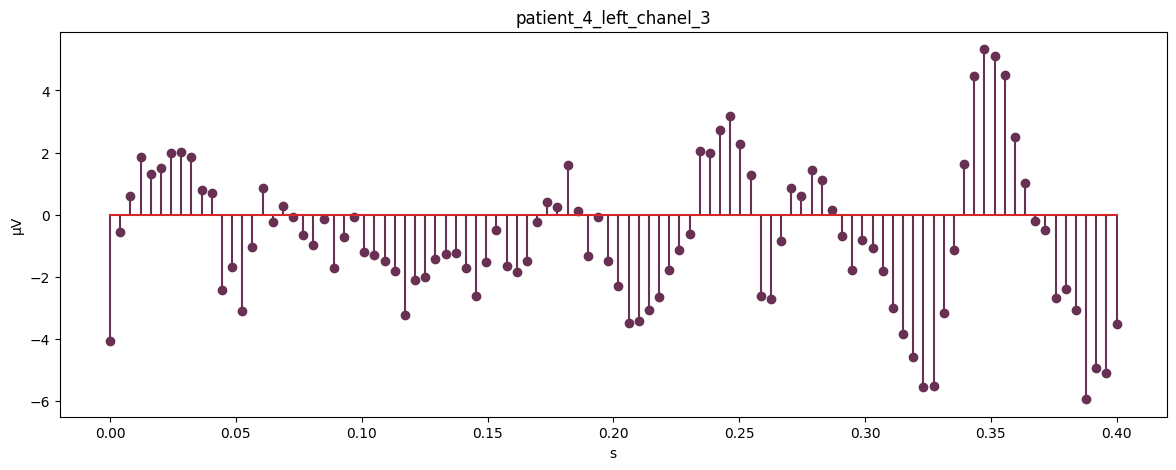

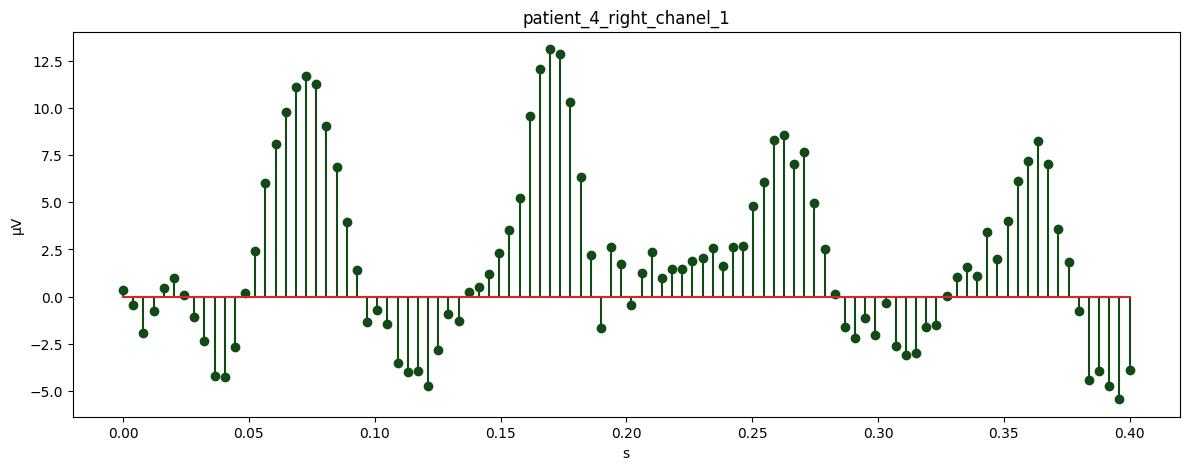

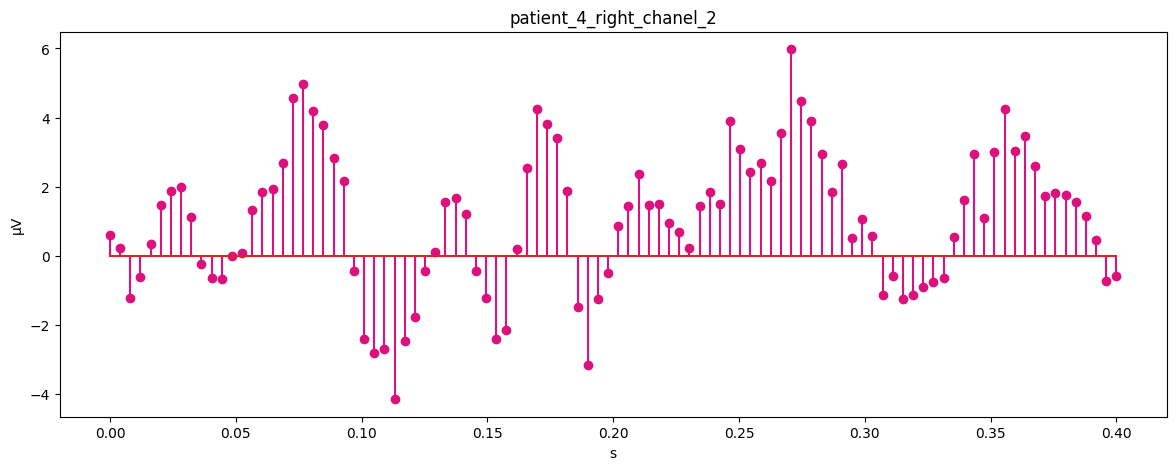

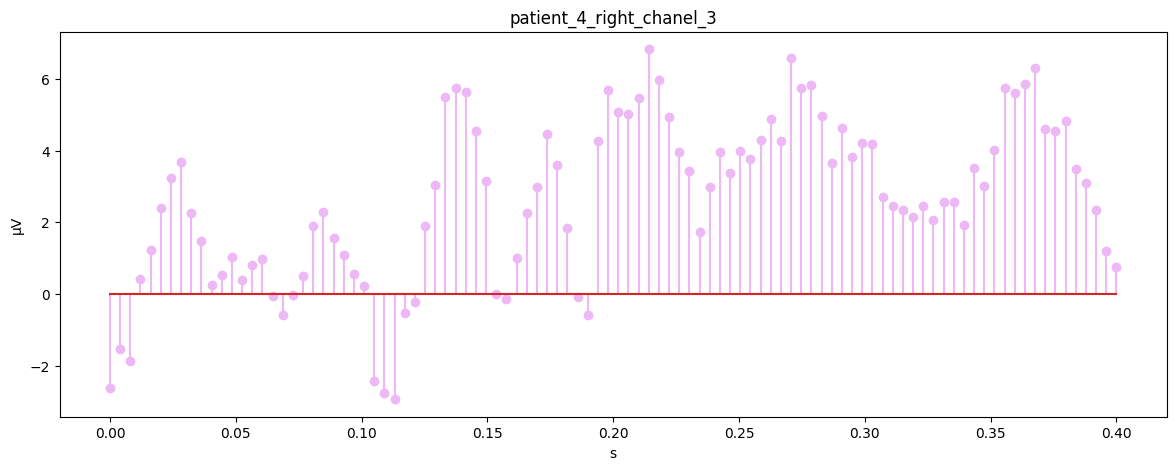

In [ ]:
##Patient 4 signals plot

plot_signals(list(chanels["patient_4"]["left"].values()),"patient_4_left",start,tam)
plot_signals(list(chanels["patient_4"]["right"].values()),"patient_4_right",start,tam)

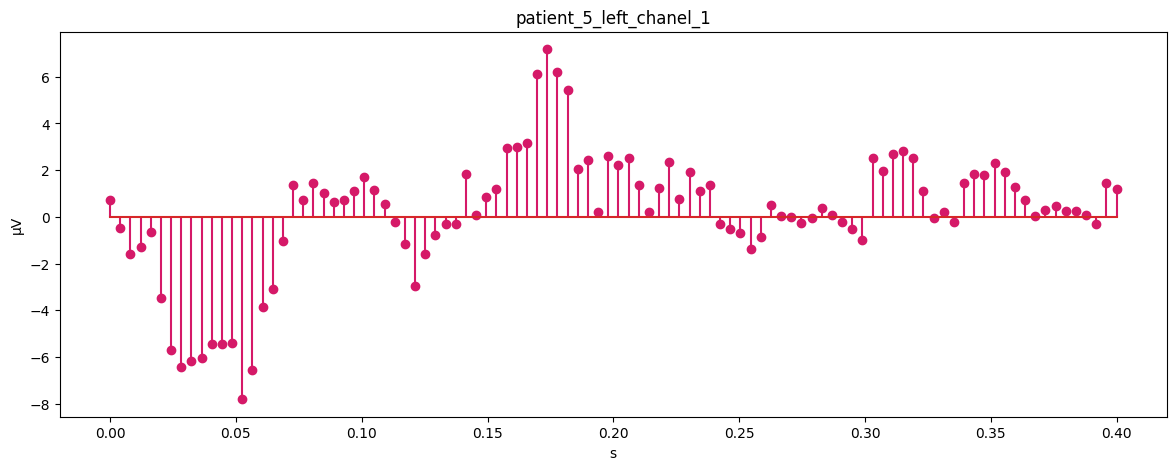

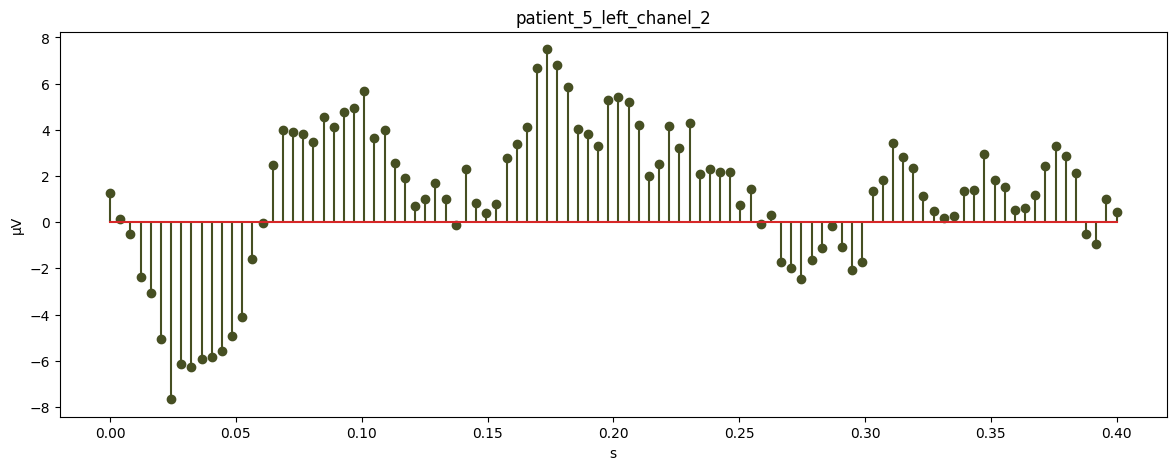

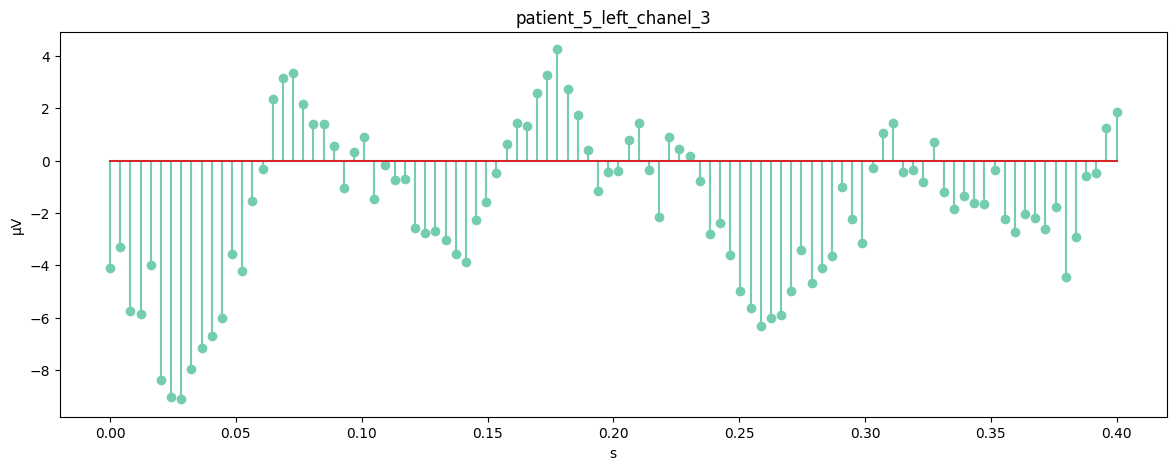

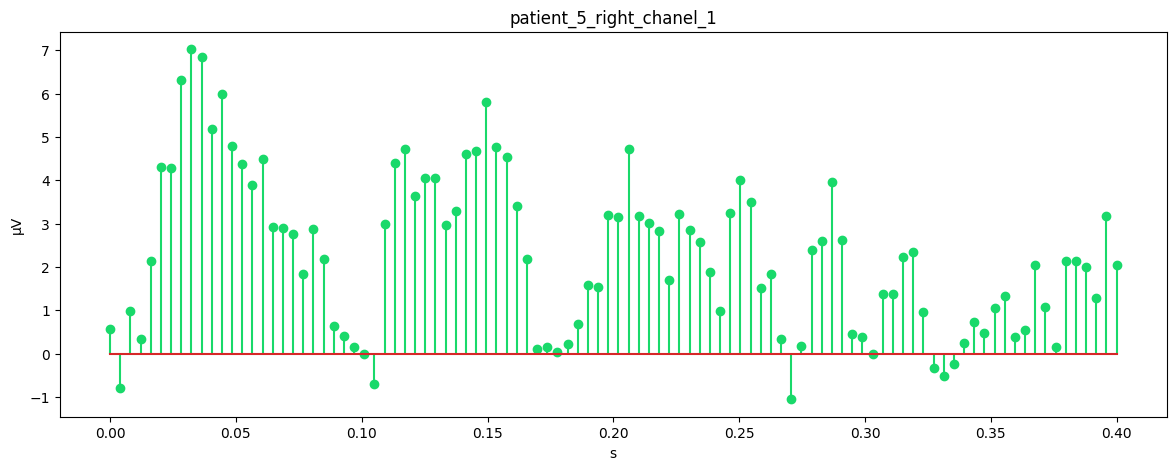

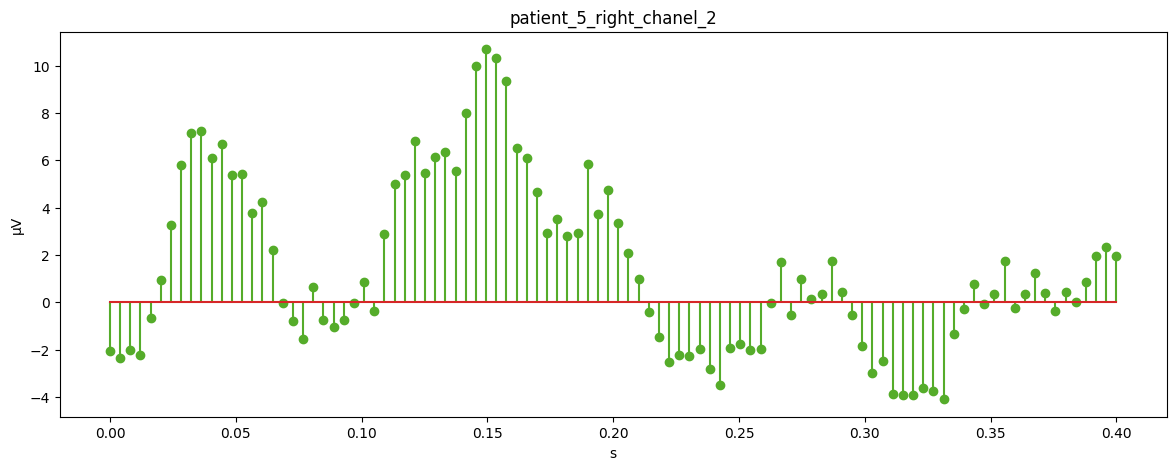

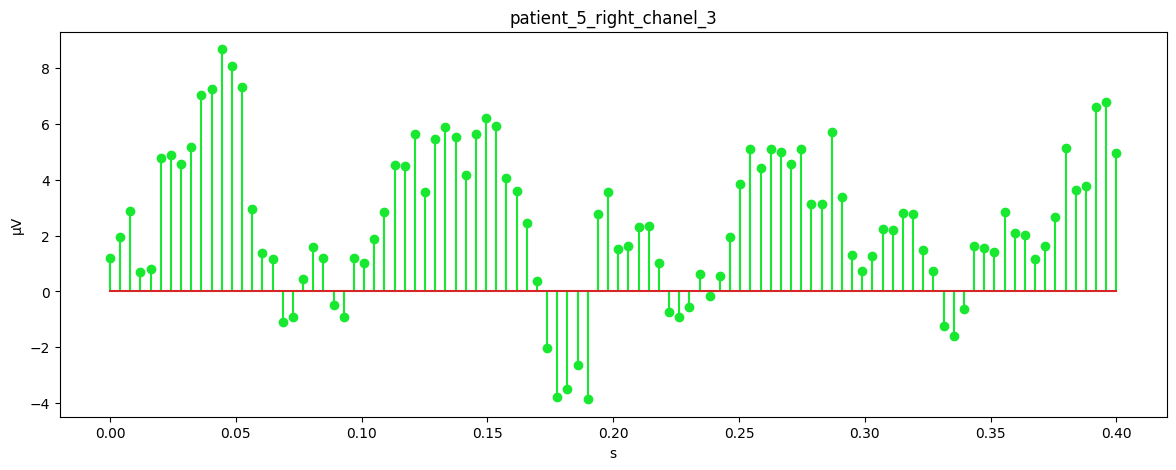

In [ ]:
##Patient 5 signals plot

plot_signals(list(chanels["patient_5"]["left"].values()),"patient_5_left",start,tam)
plot_signals(list(chanels["patient_5"]["right"].values()),"patient_5_right",start,tam)

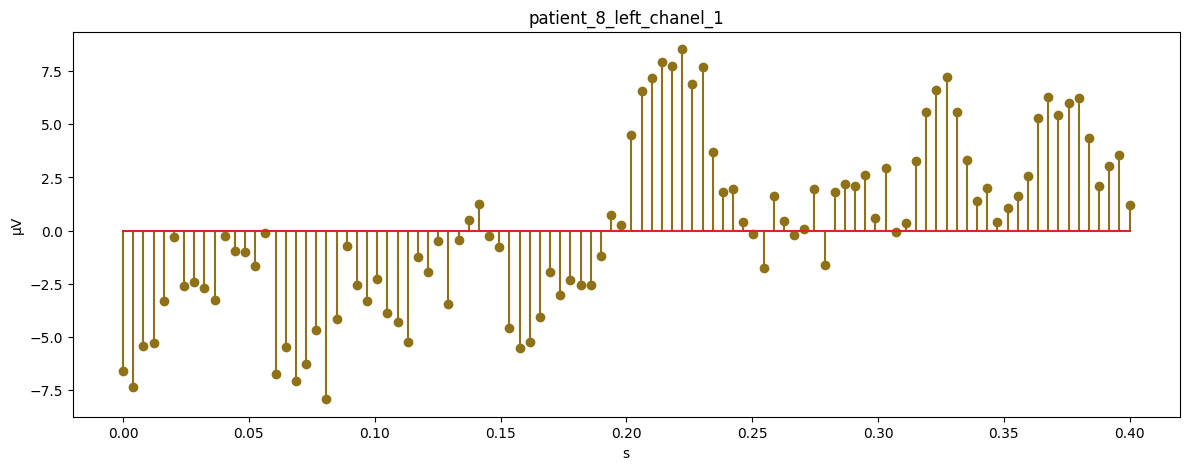

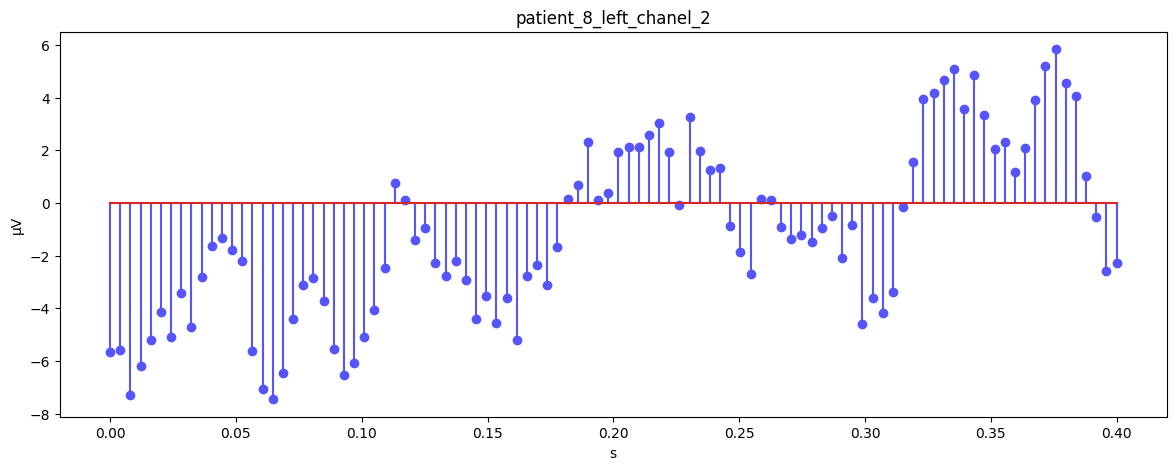

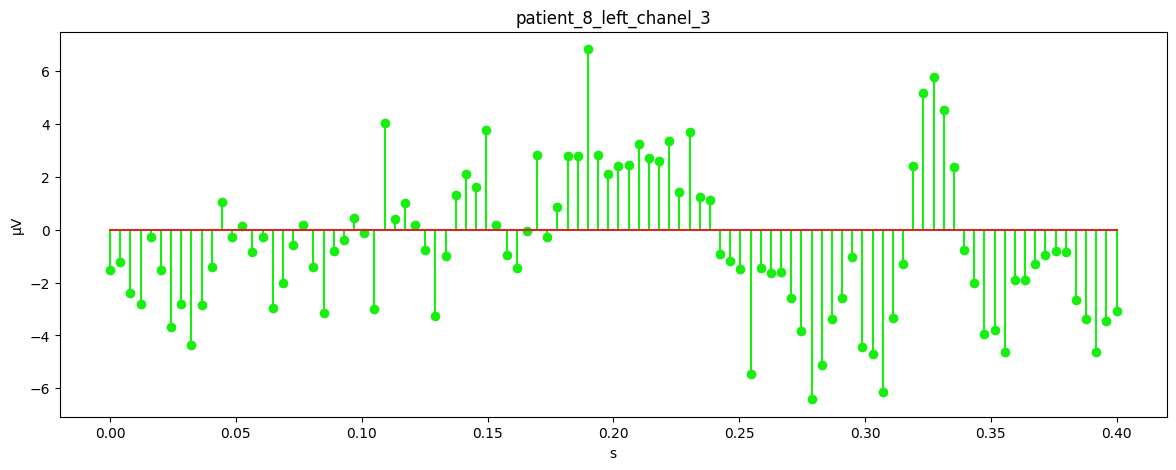

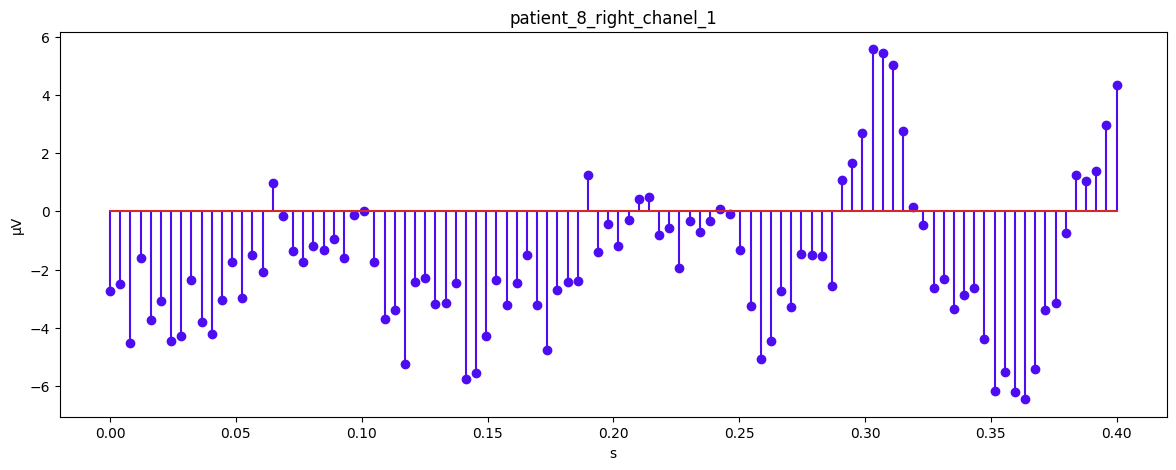

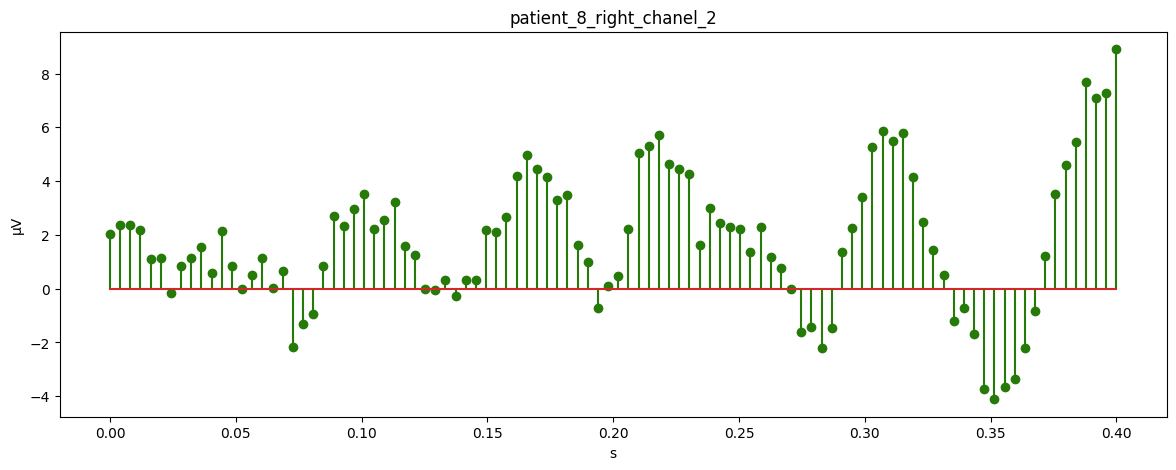

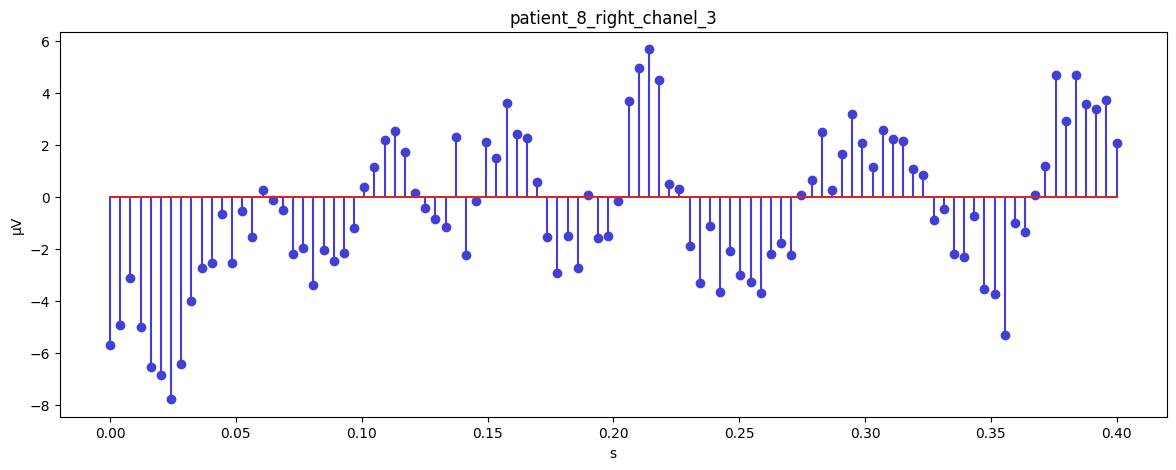

In [ ]:
##Patient 8 signals plot

plot_signals(list(chanels["patient_8"]["left"].values()),"patient_8_left",start,tam)
plot_signals(list(chanels["patient_8"]["right"].values()),"patient_8_right",start,tam)

**Comentários:**

*(Avaliar se isso será incluído ou não)*

A densidade espectral de potência foi calculada para avaliar qual a faixa de frequência que há contribuição das componentes do sinal, e auxiliar na tomada de decisão da faixa de frequência para plotar o gráfico no domínio da frequência.

In [ ]:
## Calculating Power Spectral Density 
# f contains the frequency components
# S is the PSD

def PSD(chanels:list,text:str, ch:int):
  fs = 250
  s = chanels
  (f, S) = signal.periodogram(s, fs, scaling='density')
  fig = plt.figure(figsize=(100,5))
  plt.subplot(1,3,ch+1, title=text)
  plt.semilogy(f, S)
  #plt.ylim([1e-7, 1e2])
  plt.xlim([0,130])
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.vlines(x=125,ymin = 0, ymax = 1e2, colors = 'r')
  plt.show()

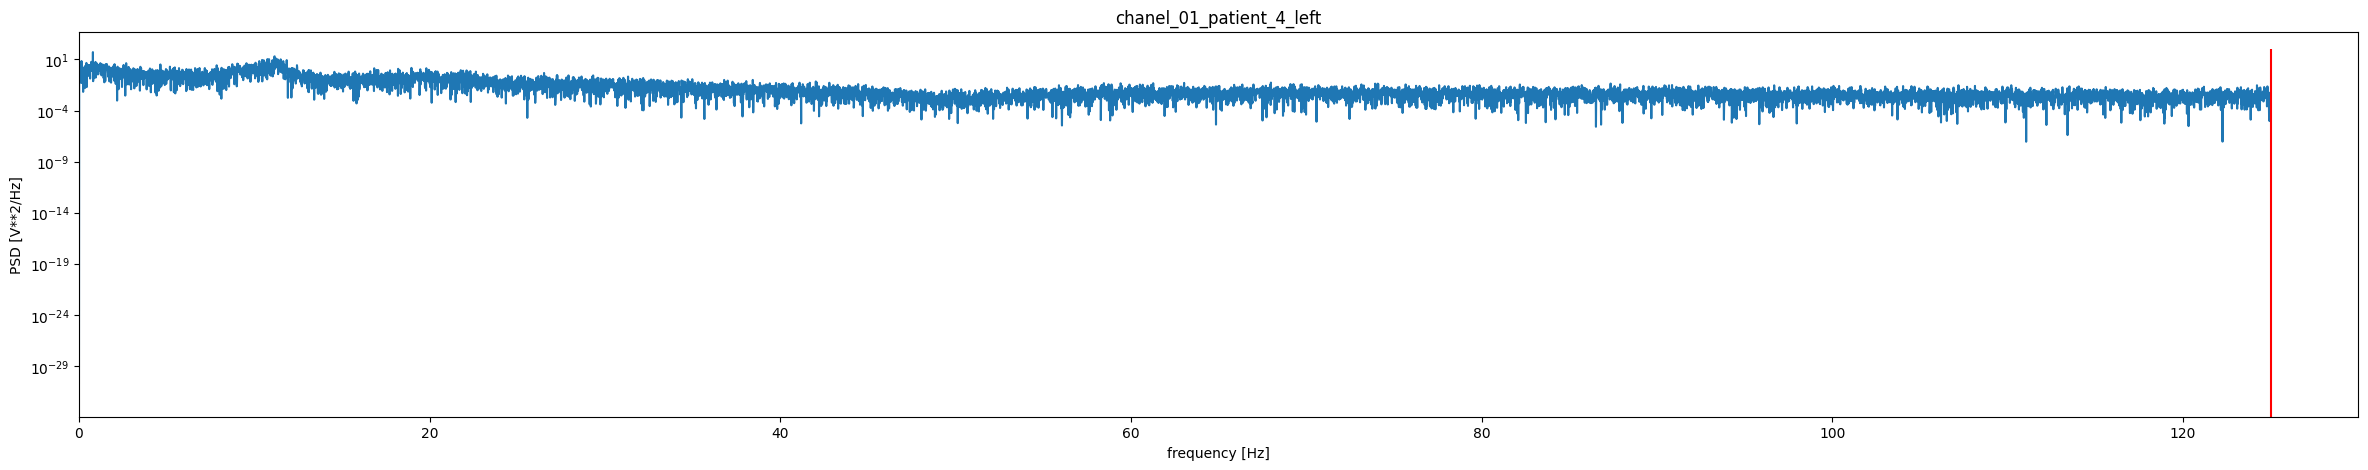

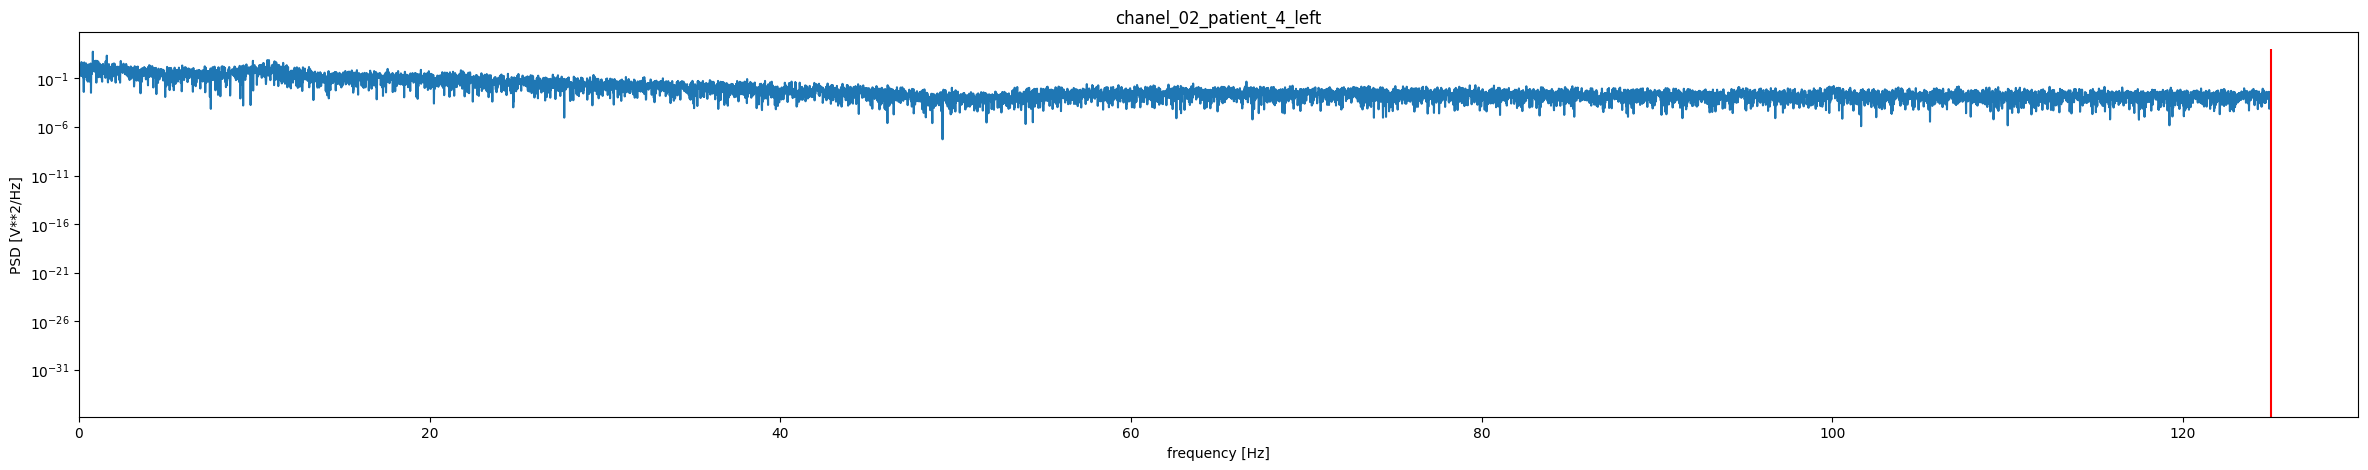

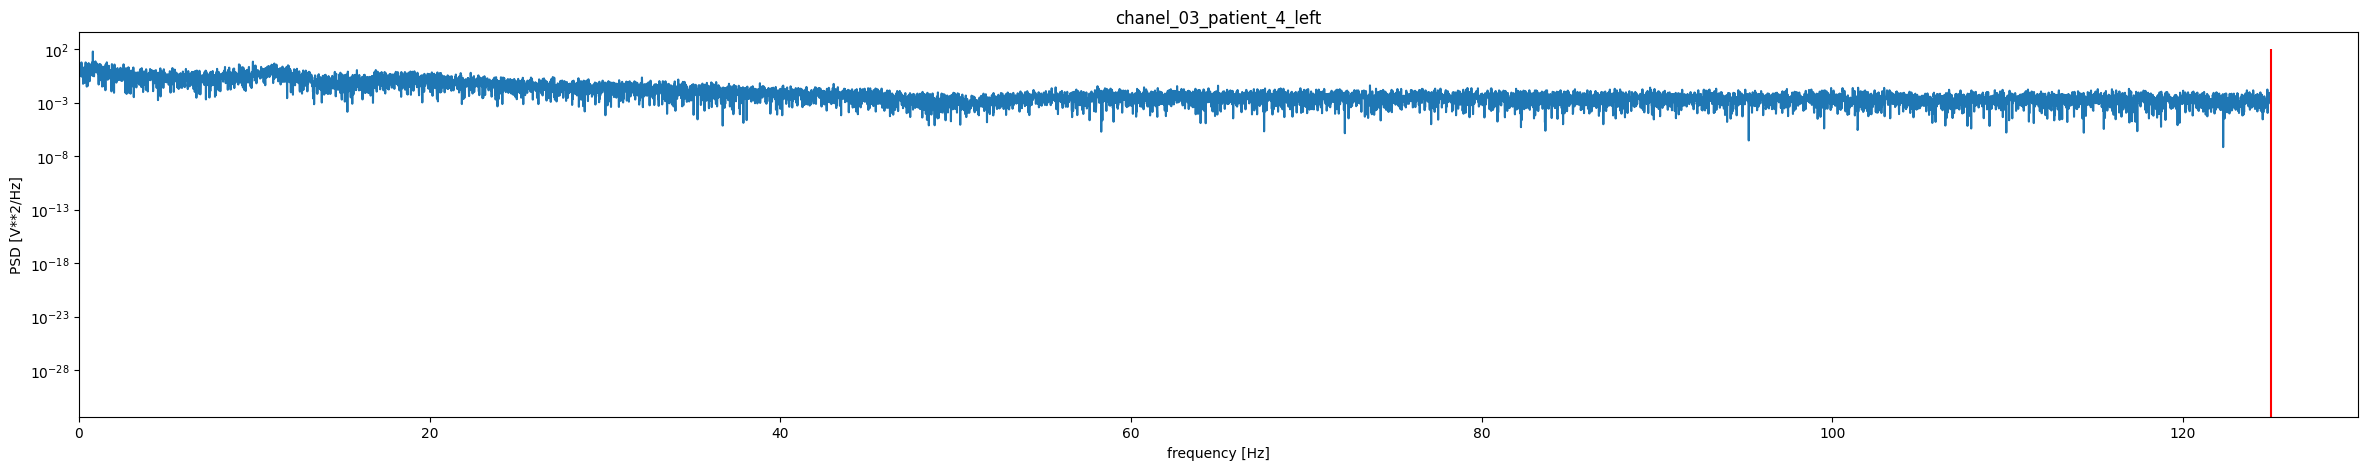

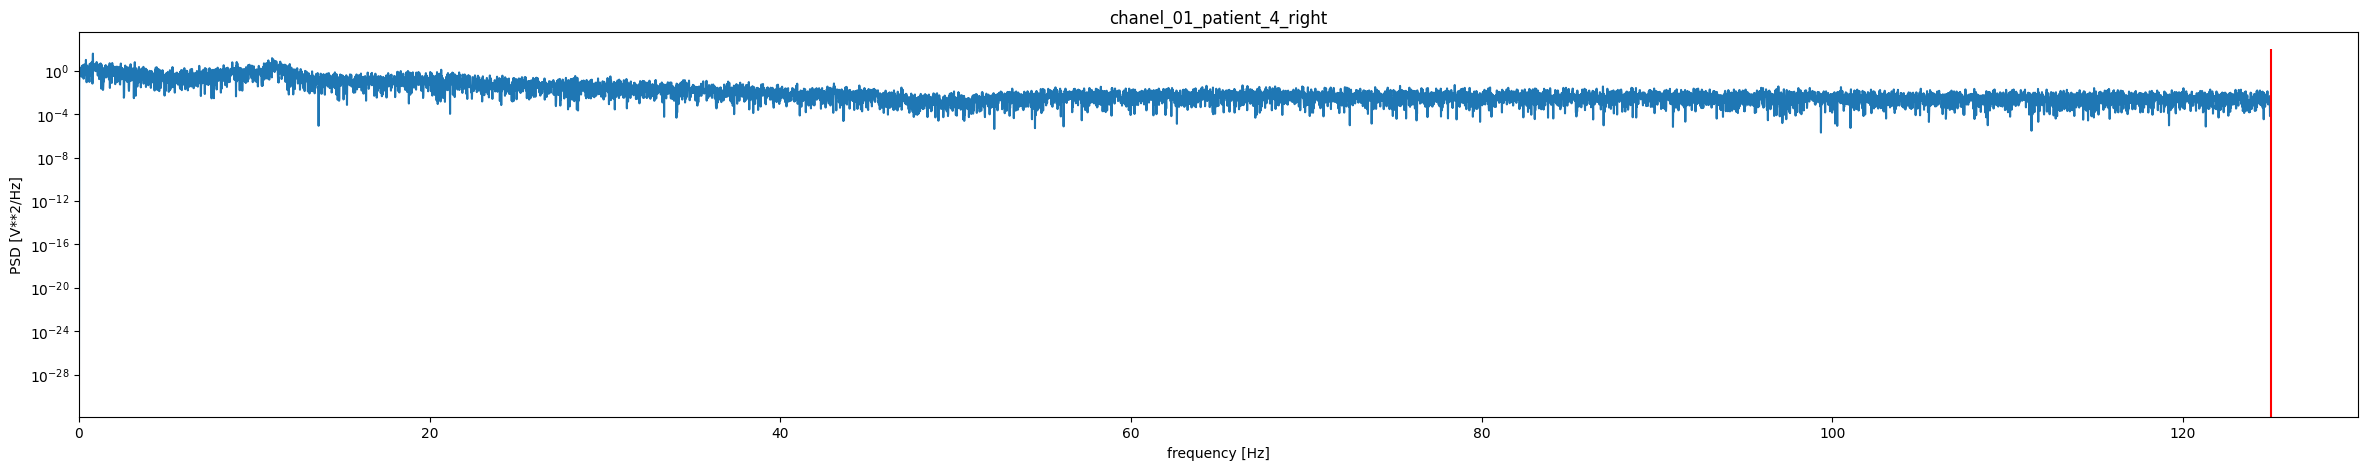

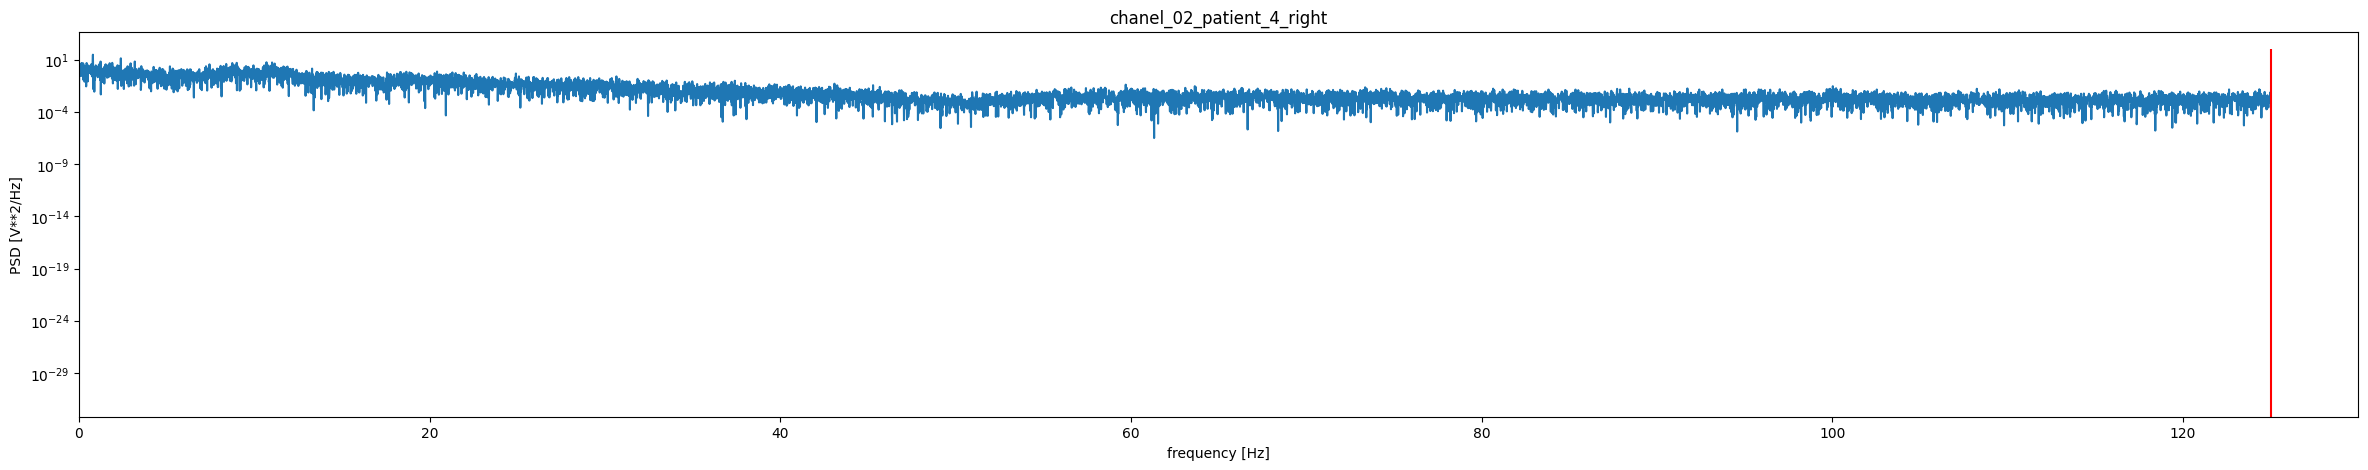

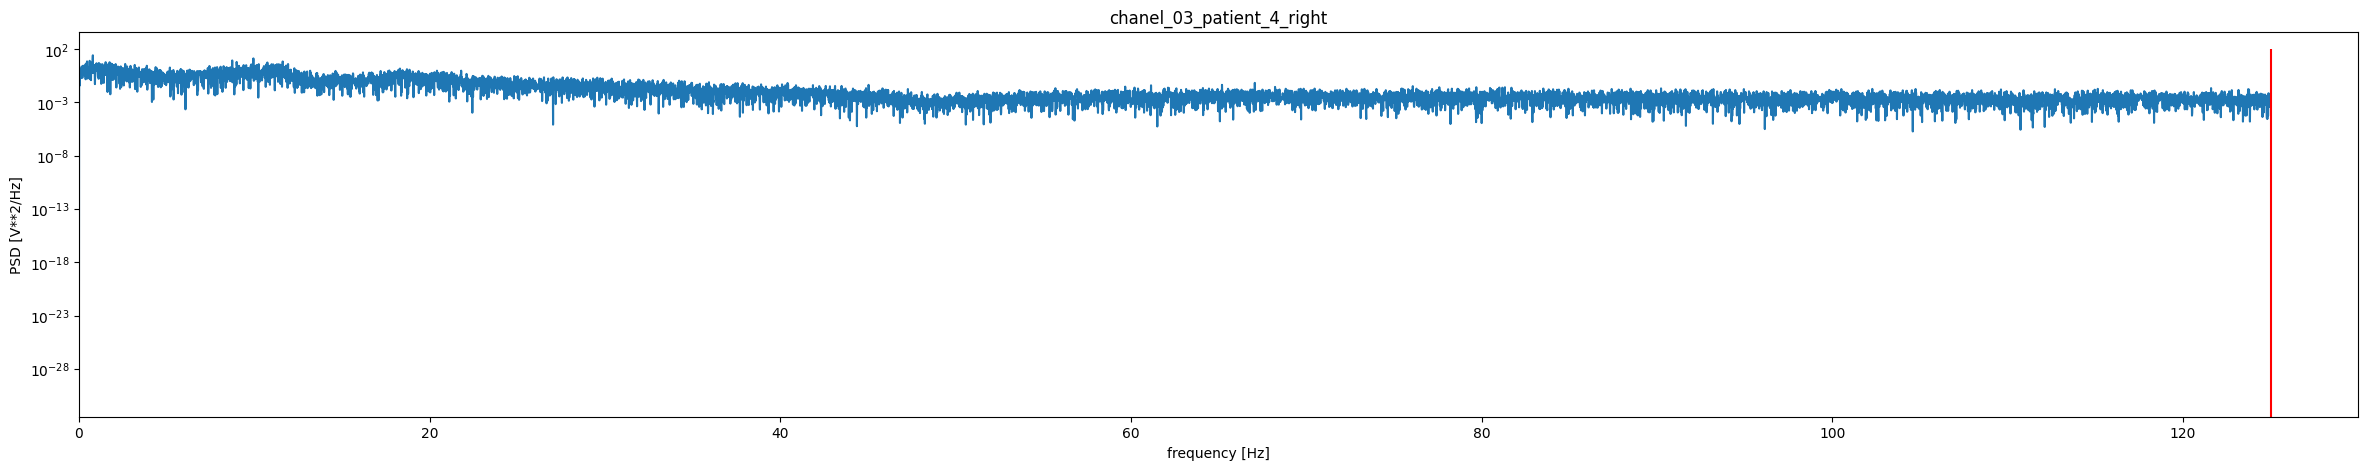

In [ ]:
for i, j, ch in zip(chanels["patient_4"]["left"].values(), chanels["patient_4"]["left"].keys(), range(3)):
  PSD(i, j, ch)
for i, j, ch in zip(chanels["patient_4"]["right"].values(), chanels["patient_4"]["right"].keys(), range(3)):
  PSD(i, j, ch)

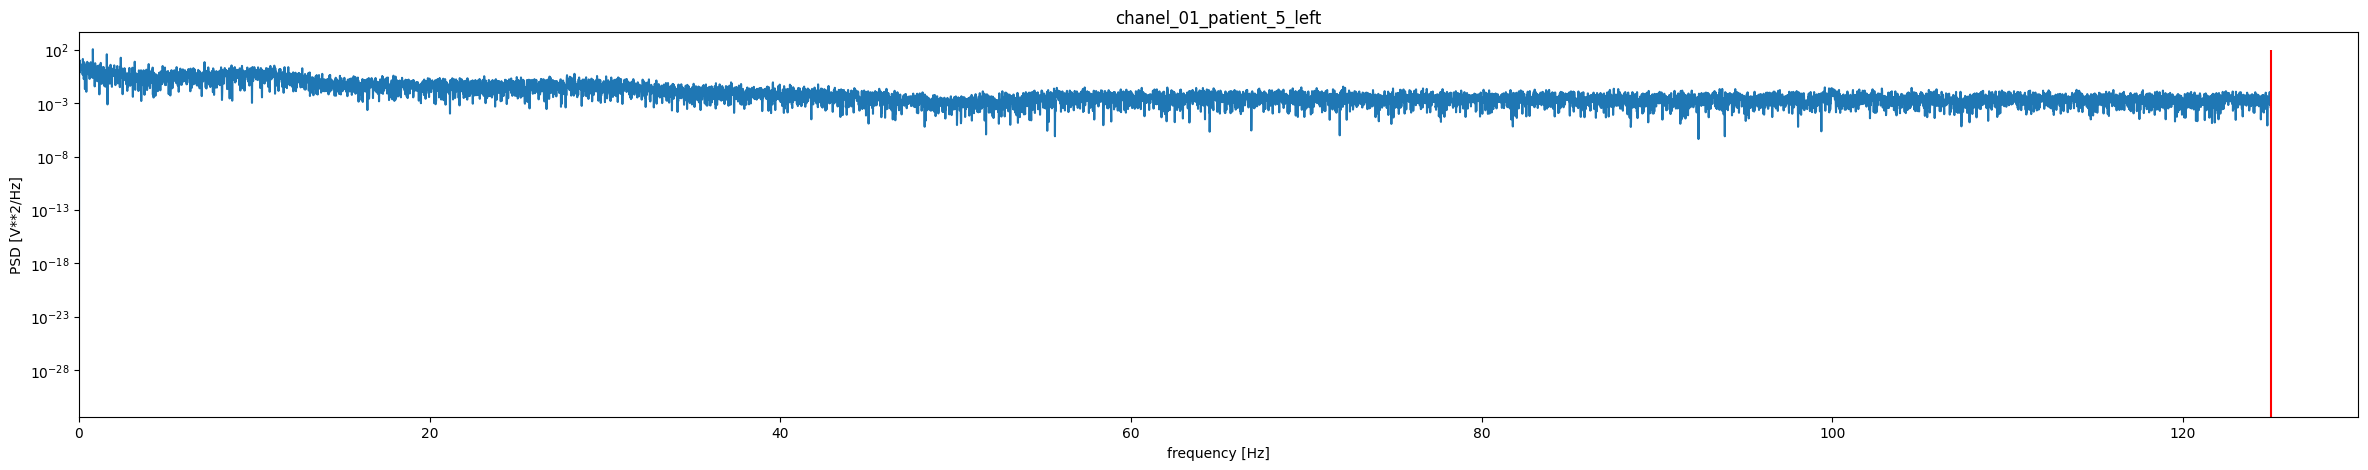

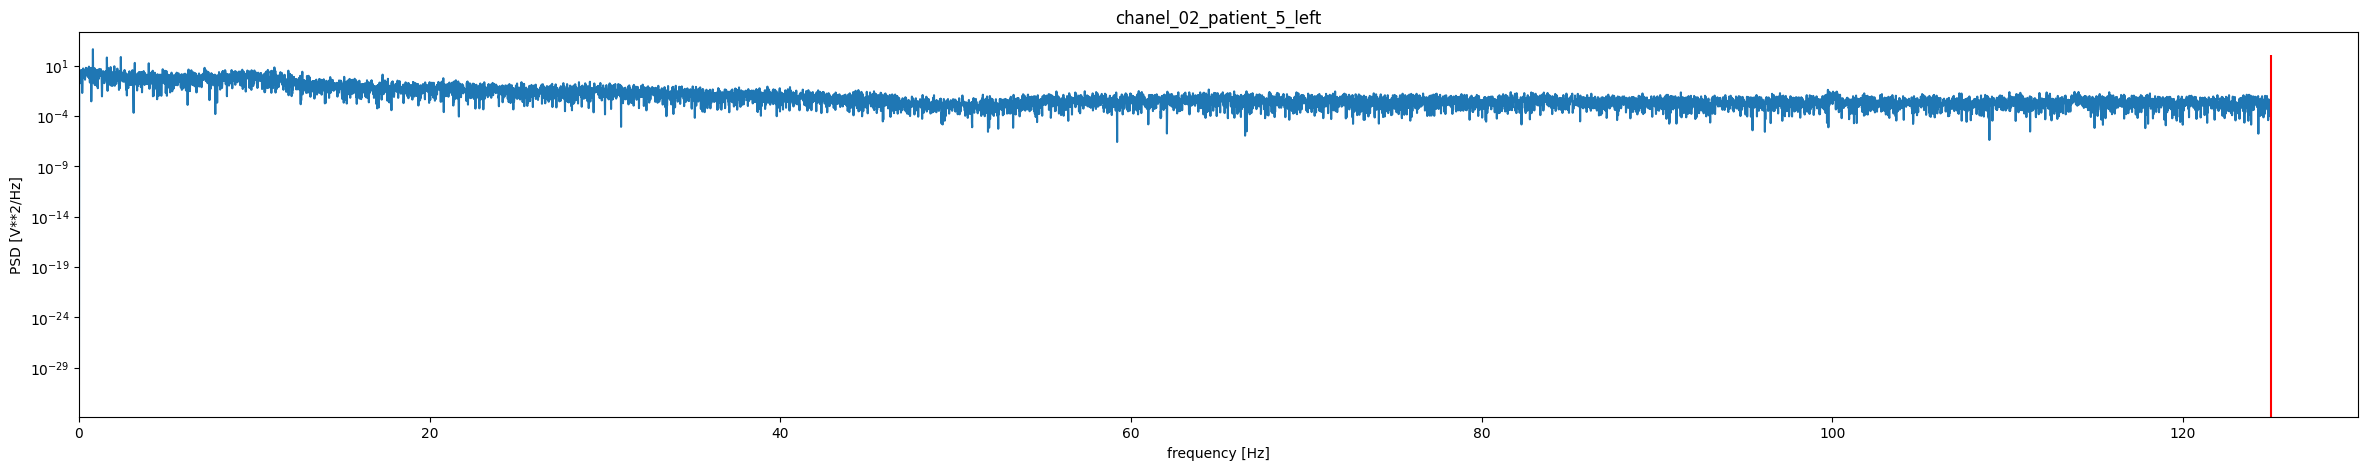

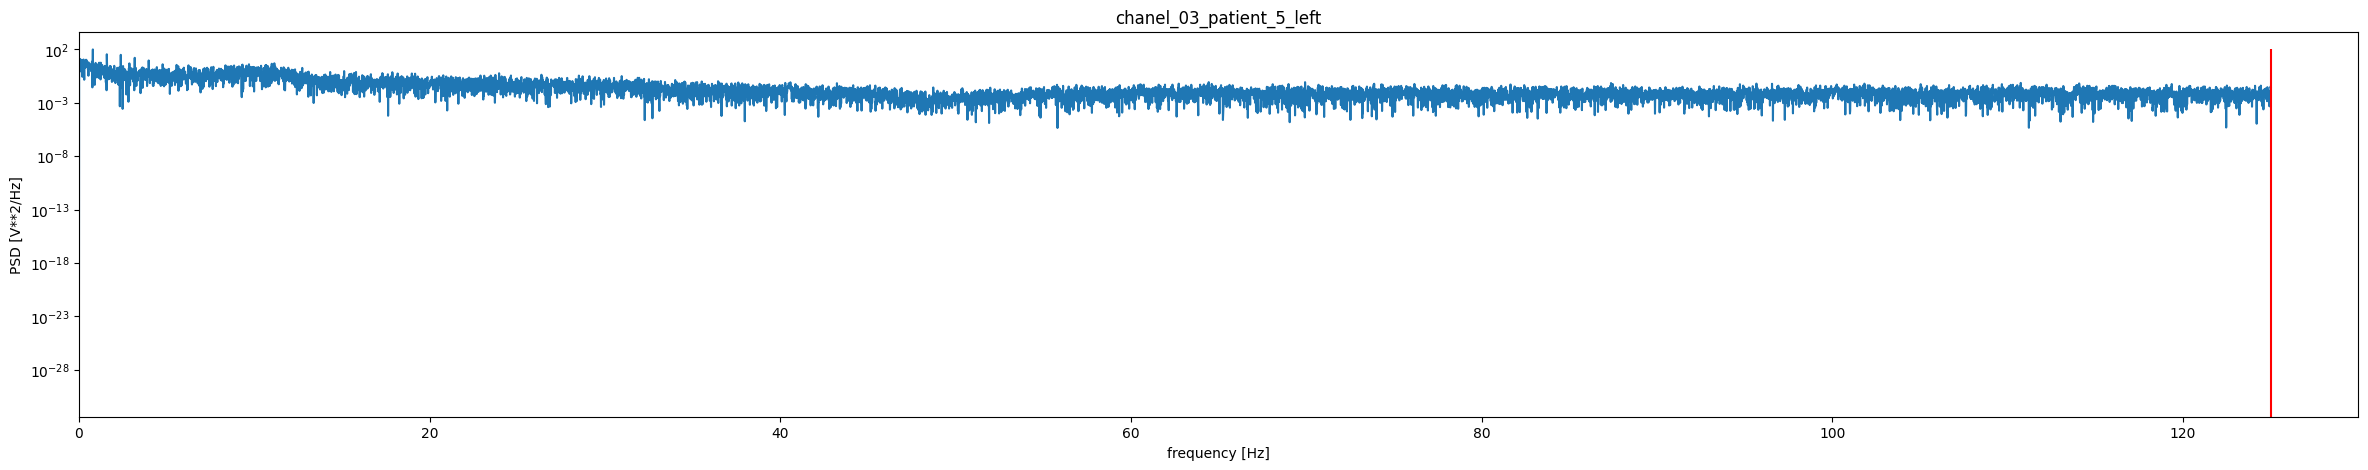

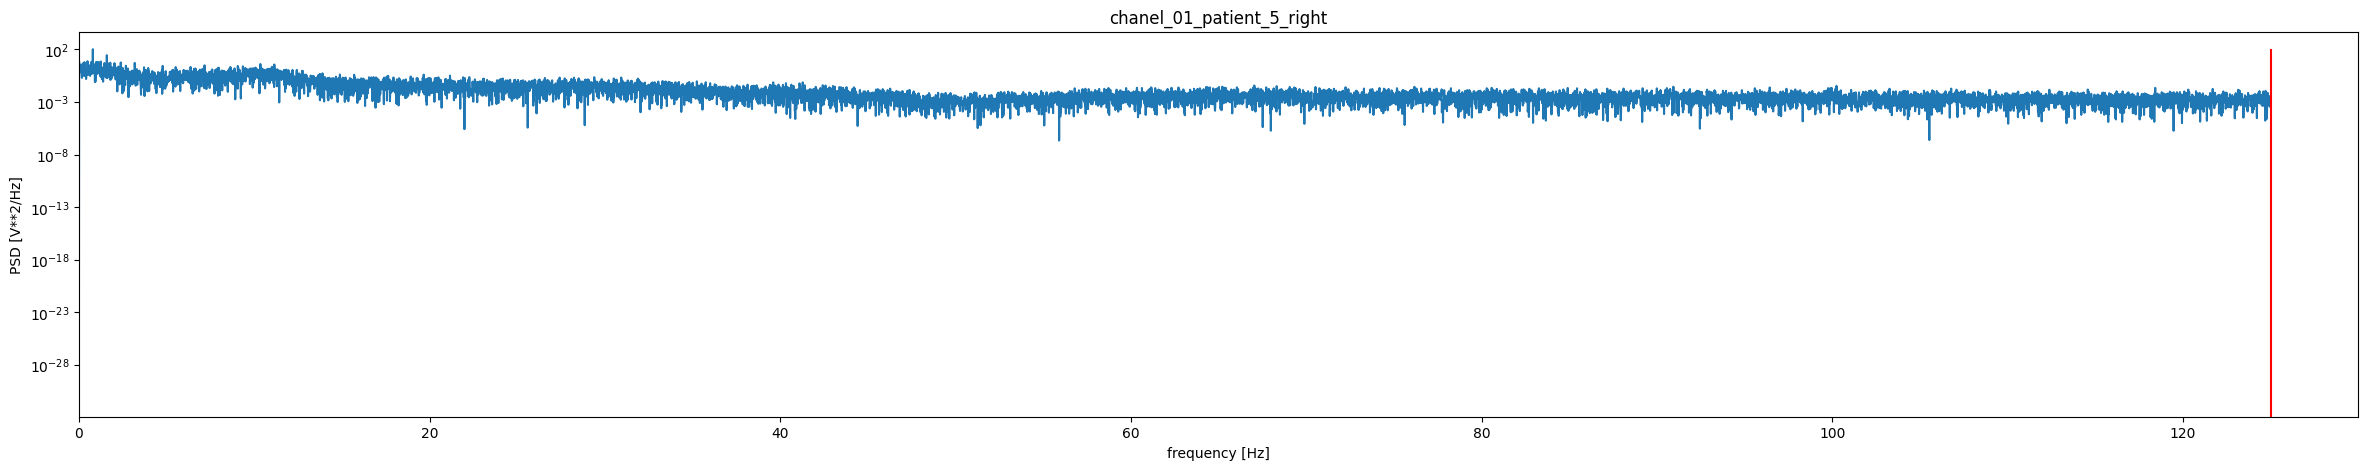

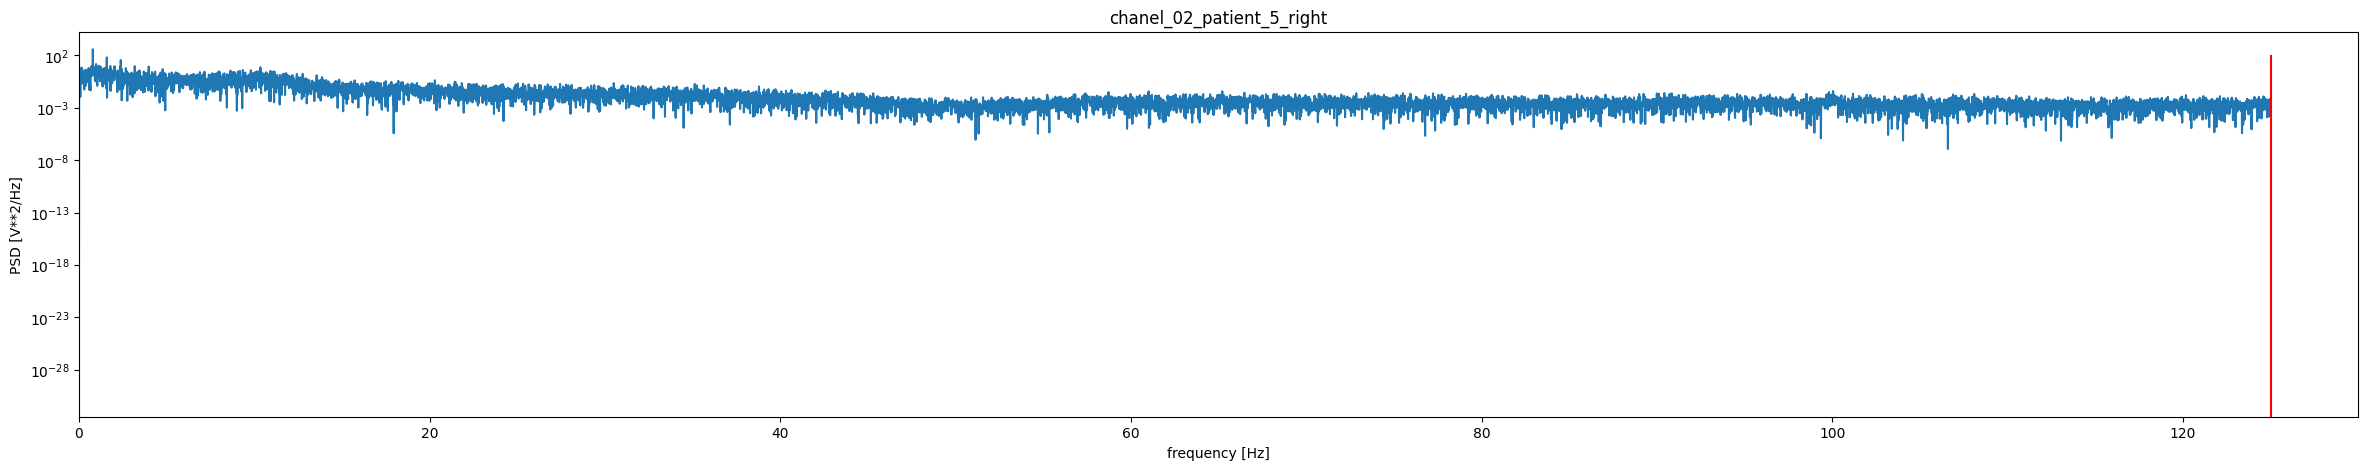

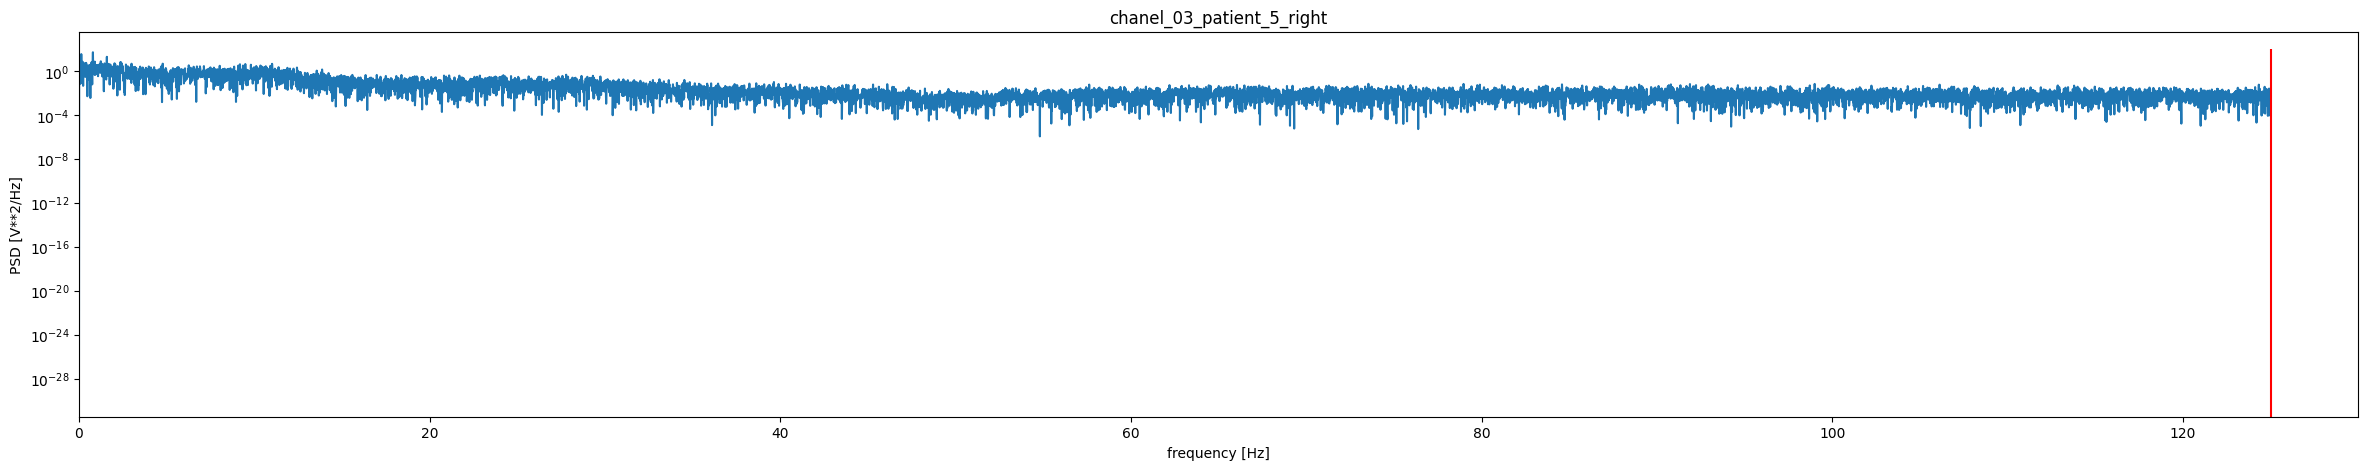

In [ ]:
for i, j, ch in zip(chanels["patient_5"]["left"].values(), chanels["patient_5"]["left"].keys(), range(3)):
  PSD(i, j, ch)
for i, j, ch in zip(chanels["patient_5"]["right"].values(), chanels["patient_5"]["right"].keys(), range(3)):
  PSD(i, j, ch)

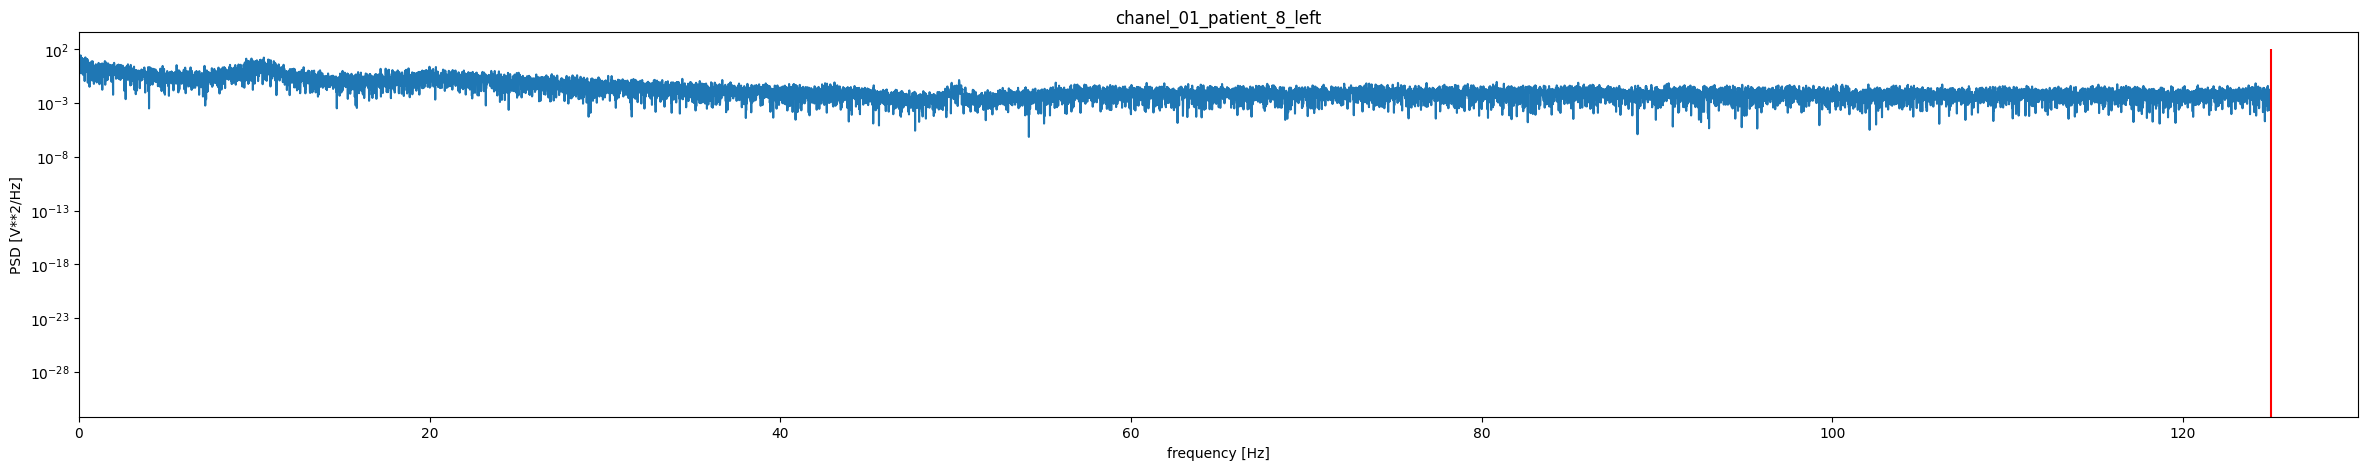

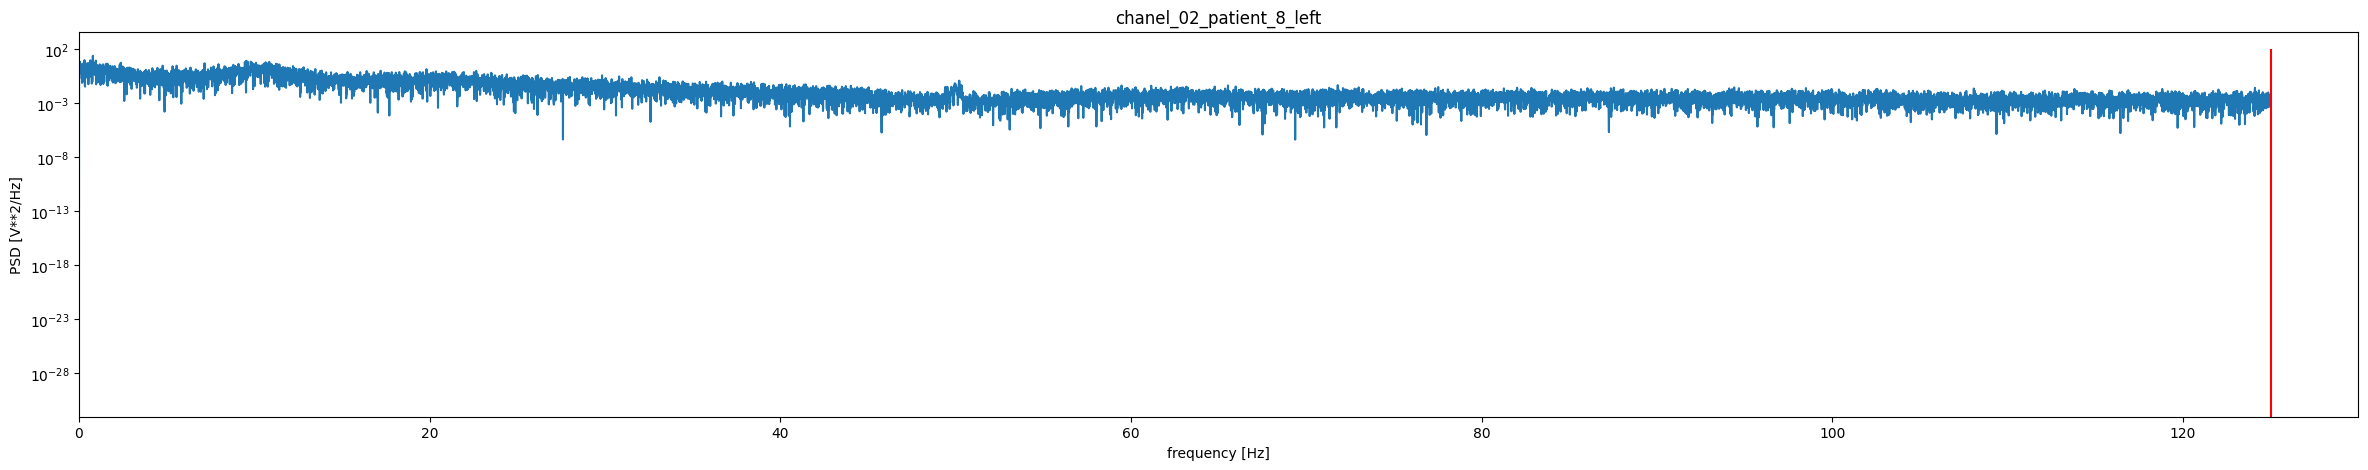

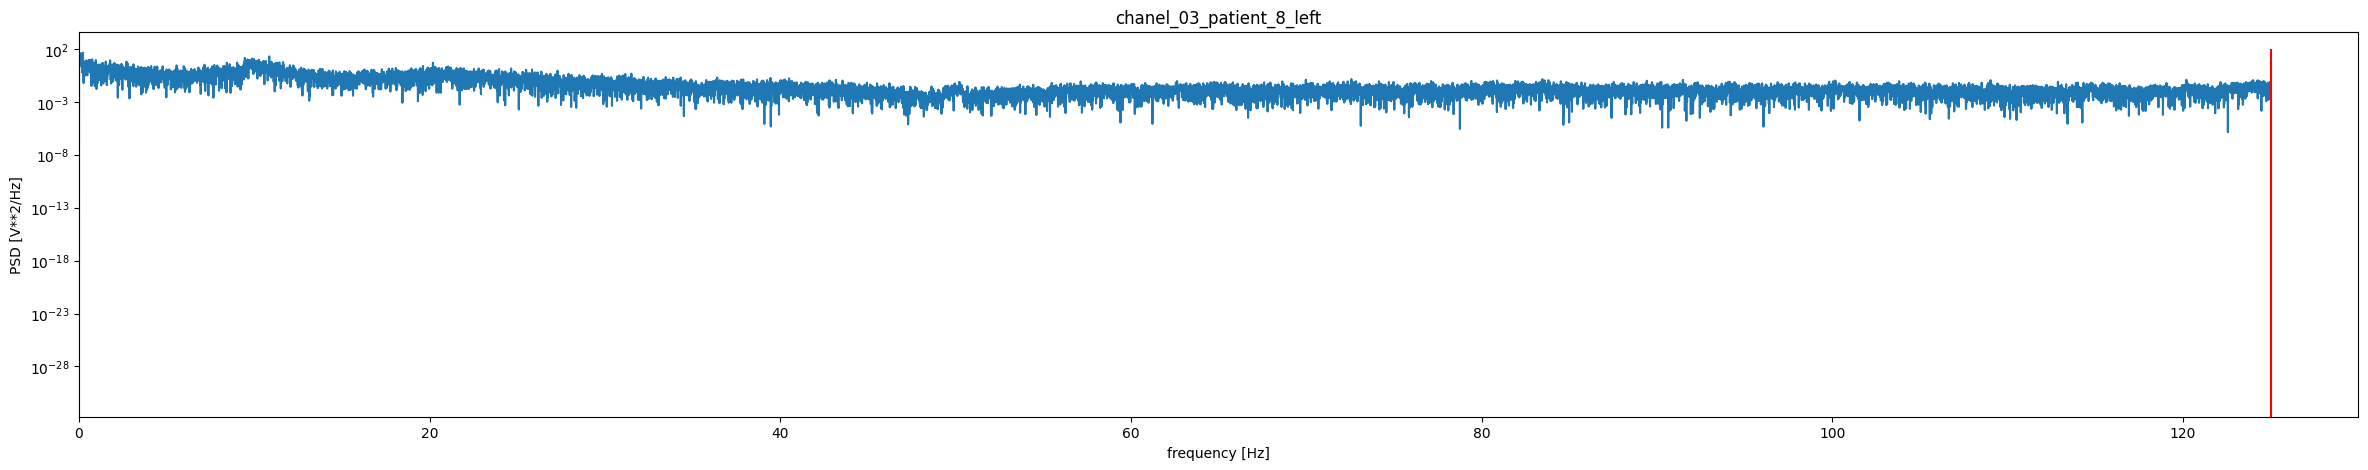

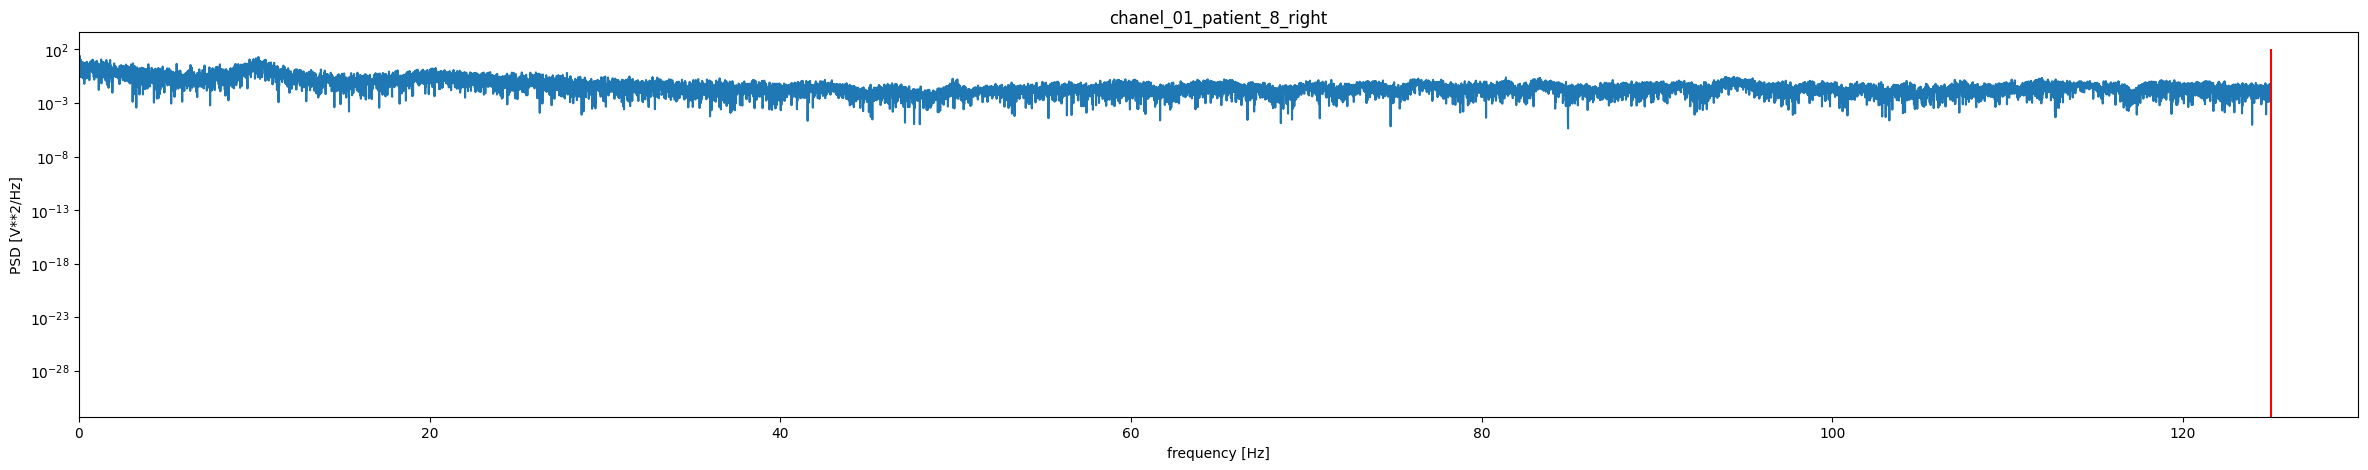

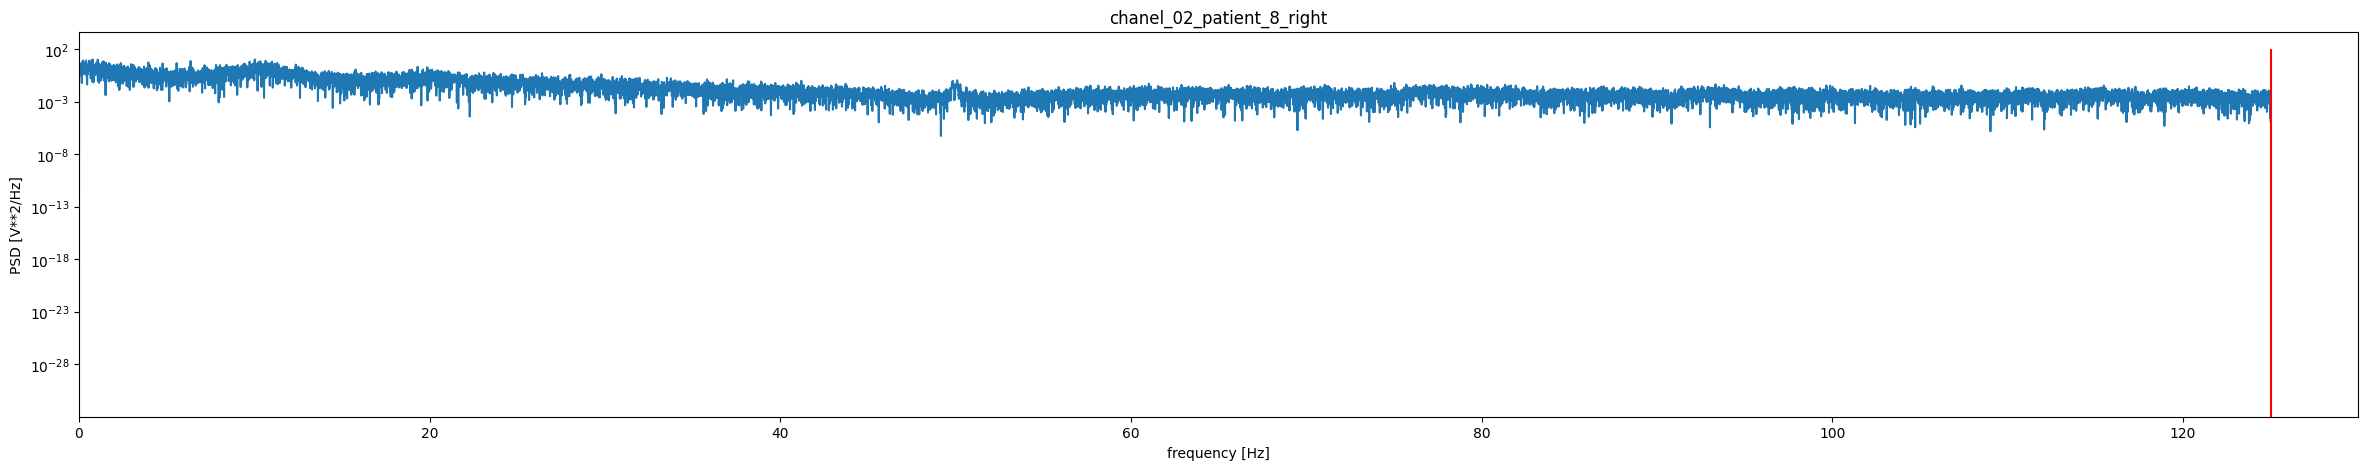

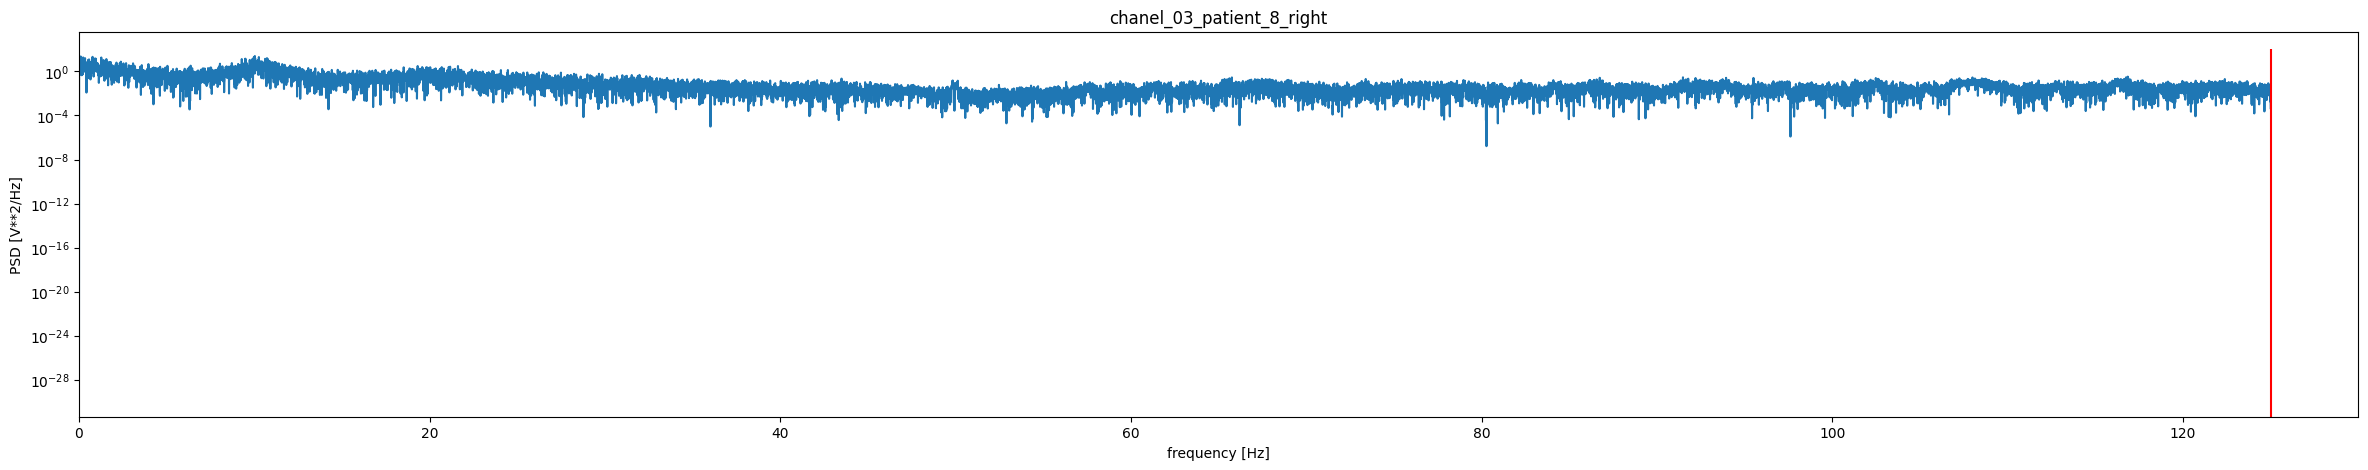

In [ ]:
for i, j, ch in zip(chanels["patient_8"]["left"].values(), chanels["patient_8"]["left"].keys(), range(3)):
  PSD(i, j, ch)
for i, j, ch in zip(chanels["patient_8"]["right"].values(), chanels["patient_8"]["right"].keys(), range(3)):
  PSD(i, j, ch)

**Comentários:**

Criação da função para aplicação da transformada de Fourier nos canais janelados.

In [ ]:
def TFTD(chanels:dict,chanels_count:list,start:int,tam:int):
  XTF = {}
  for i,j,k in zip(chanels.keys(),chanels.values(),chanels_count):
    fhz = np.linspace(-125,125,tam) ##band-pass filter was applied
    Xtf = fftpack.fftshift(fftpack.fft(j[start:start+tam]))
    XTF[i] = abs(Xtf)
    f = plt.figure(figsize=(200,5))
    plt.subplot(1,3,k+1, title='Módulo_da_Transformada_Discreta_de_Fourier_'+i+'_EEG')
    plt.xlabel("Hz")
    plt.ylabel("TFTD")
    plt.plot(fhz, XTF[i], 'b')
    plt.show()
  return XTF

In [ ]:
chanels_count=np.arange(0,3,1) ##first three chanels -> EEG

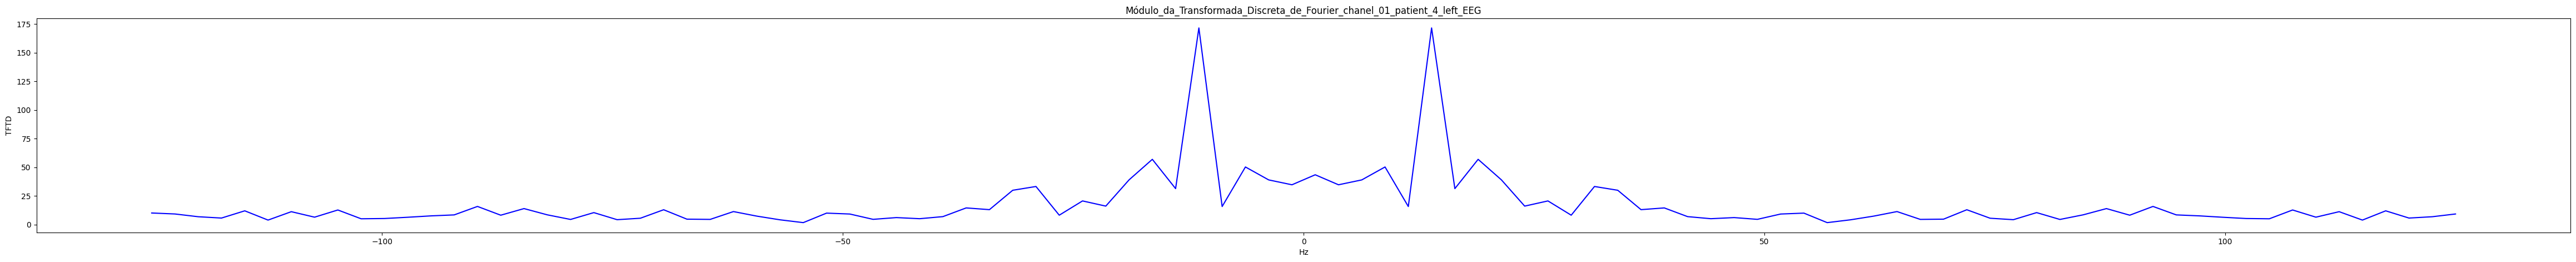

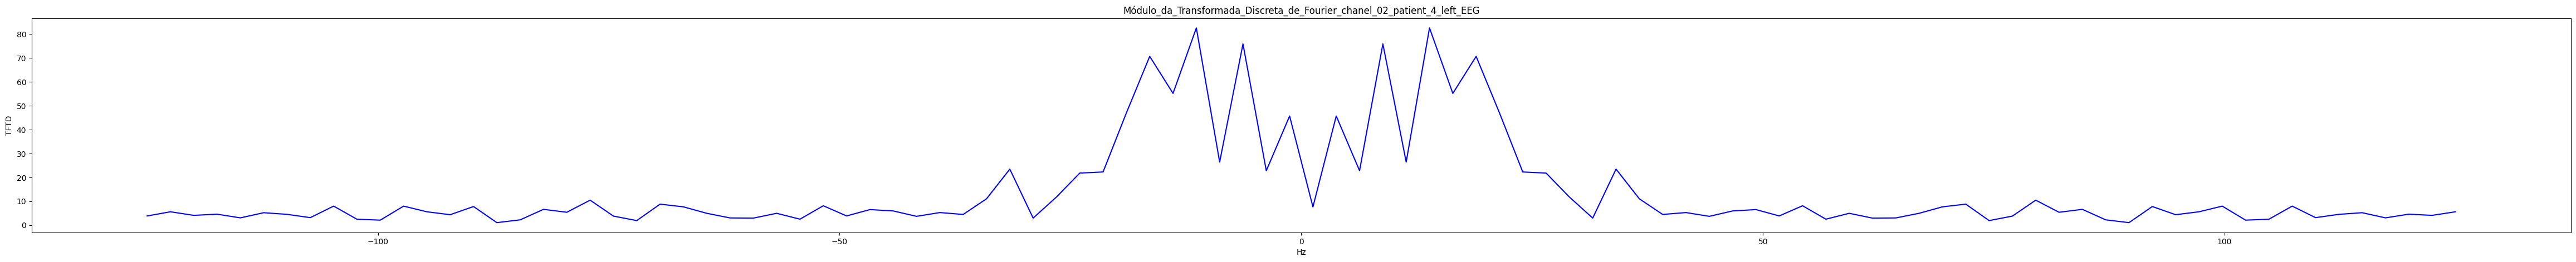

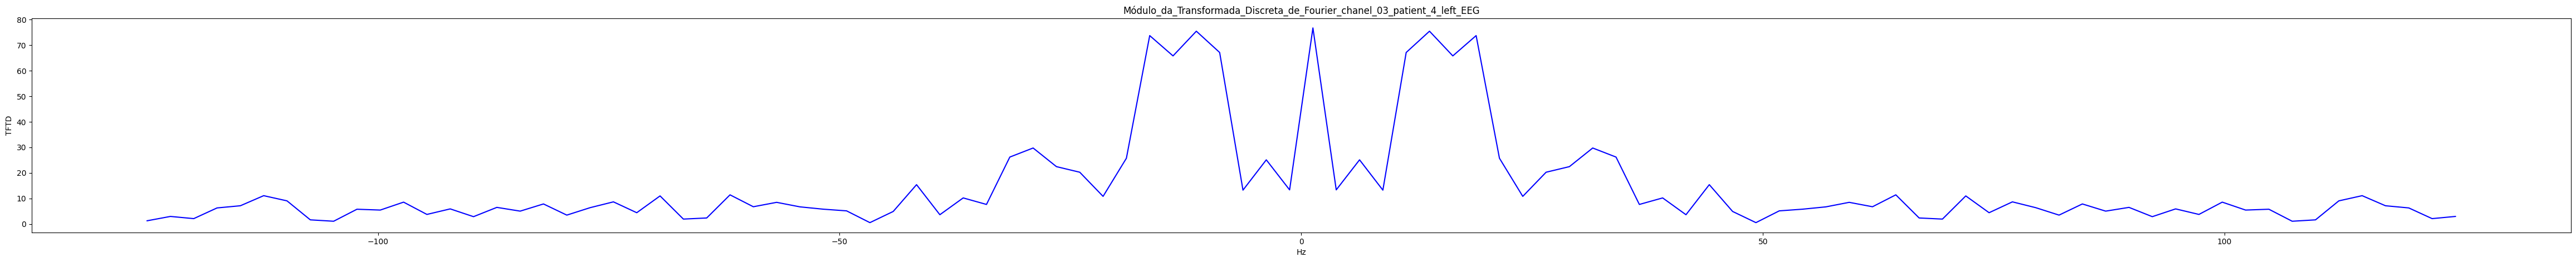

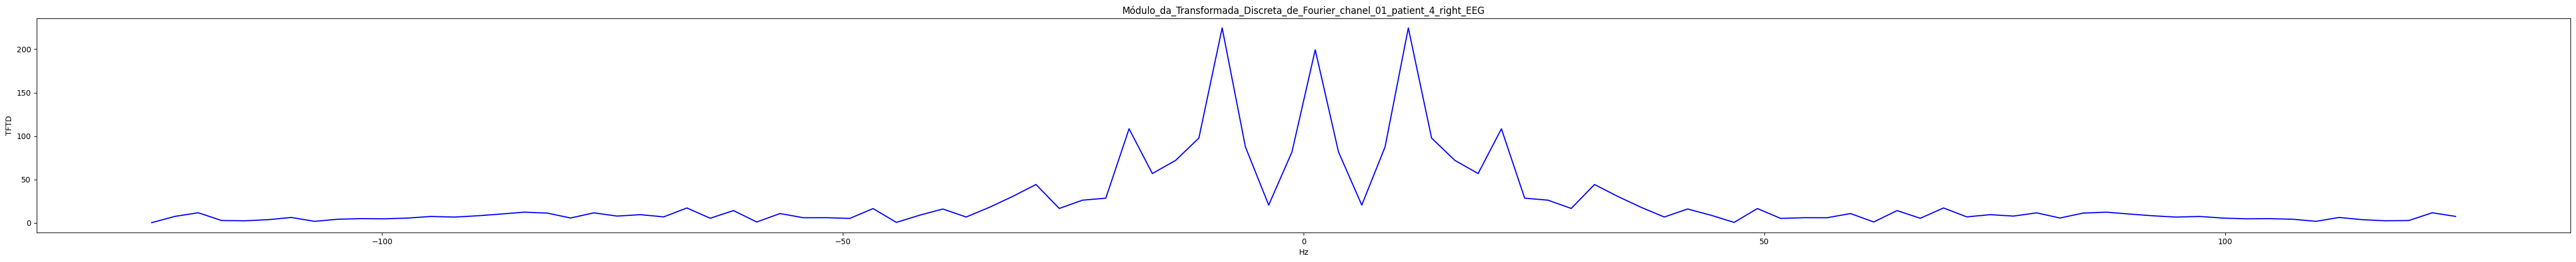

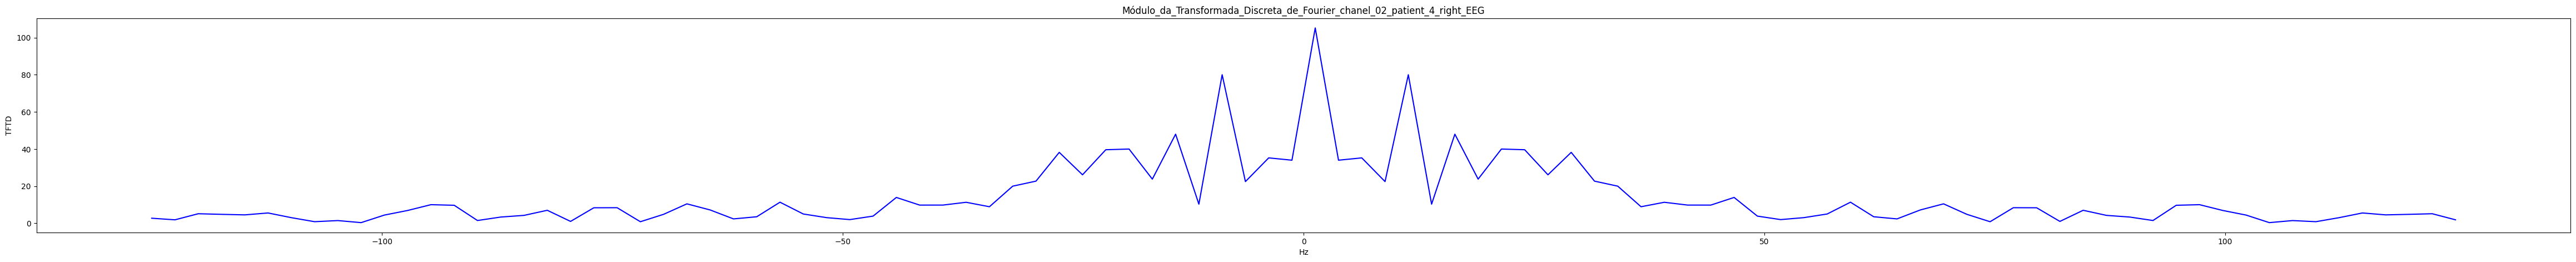

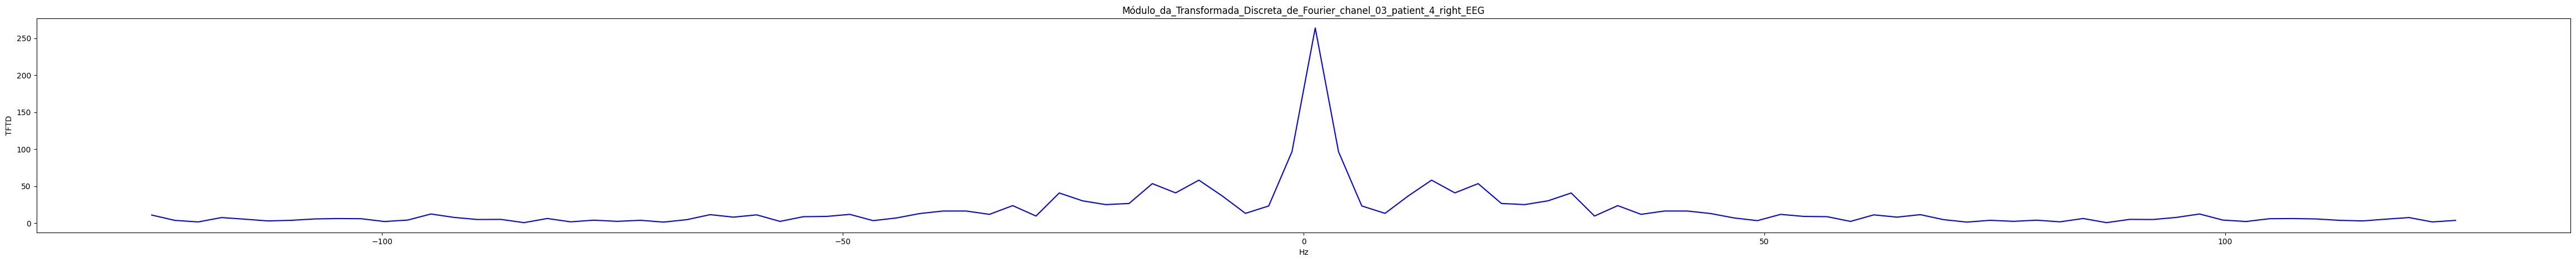

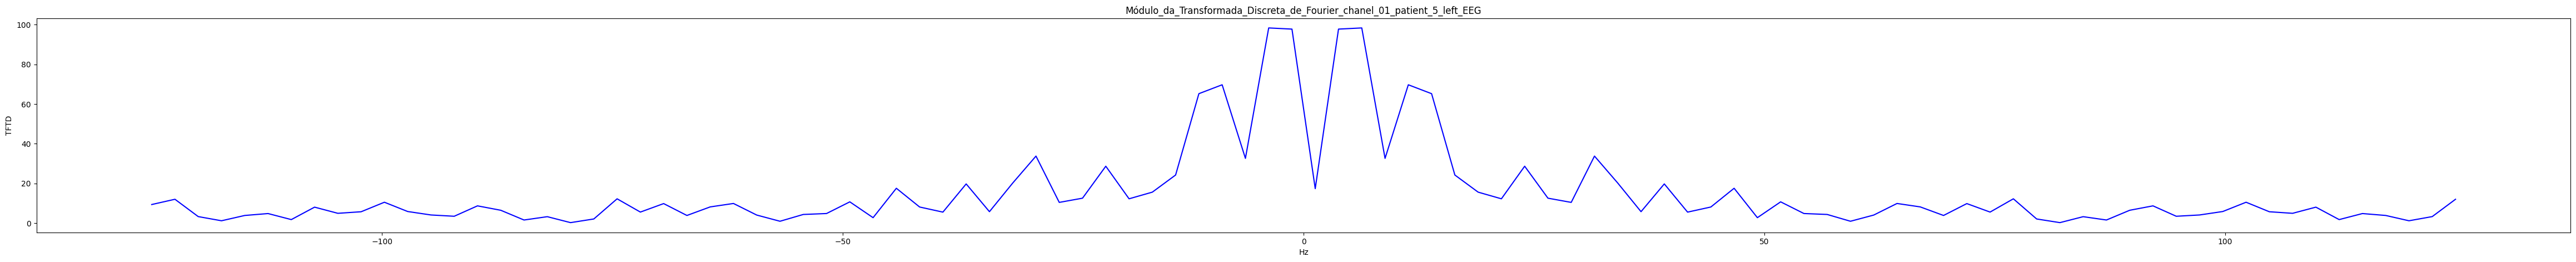

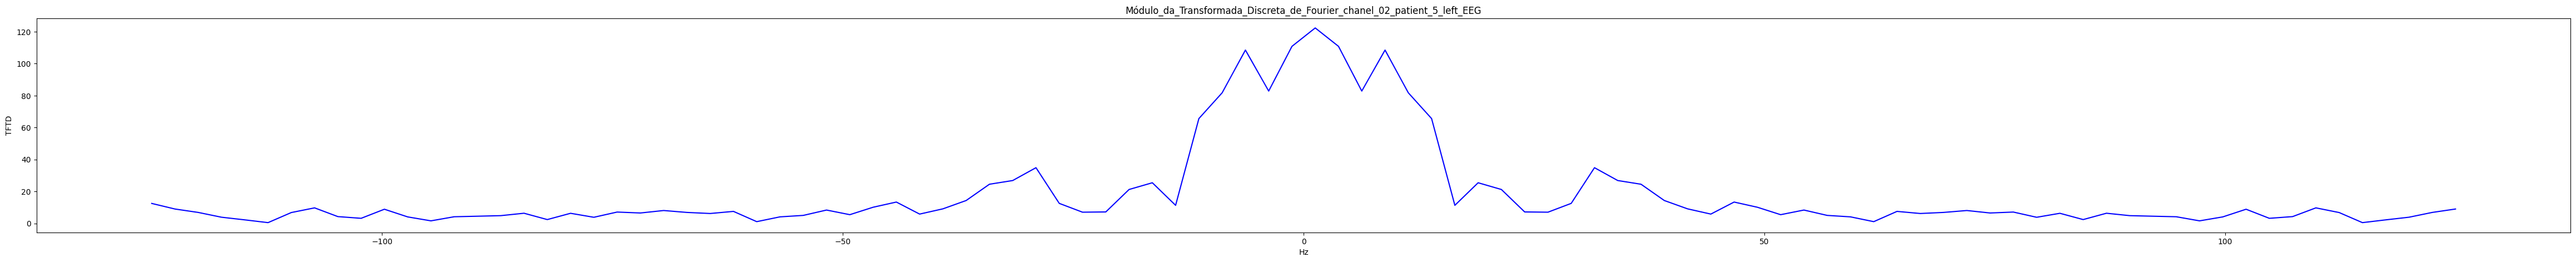

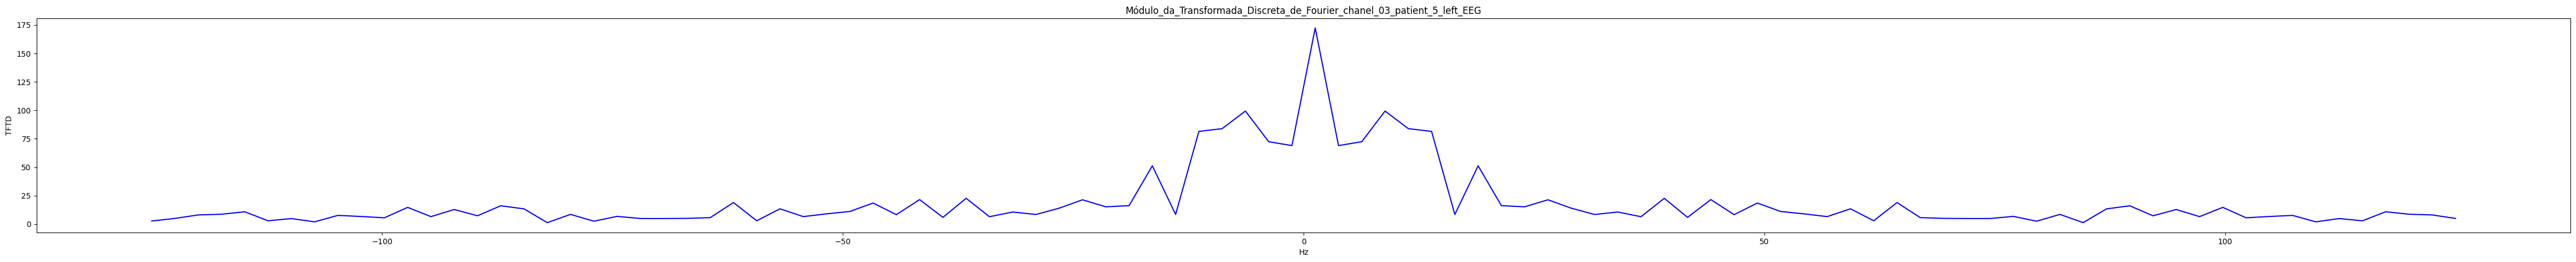

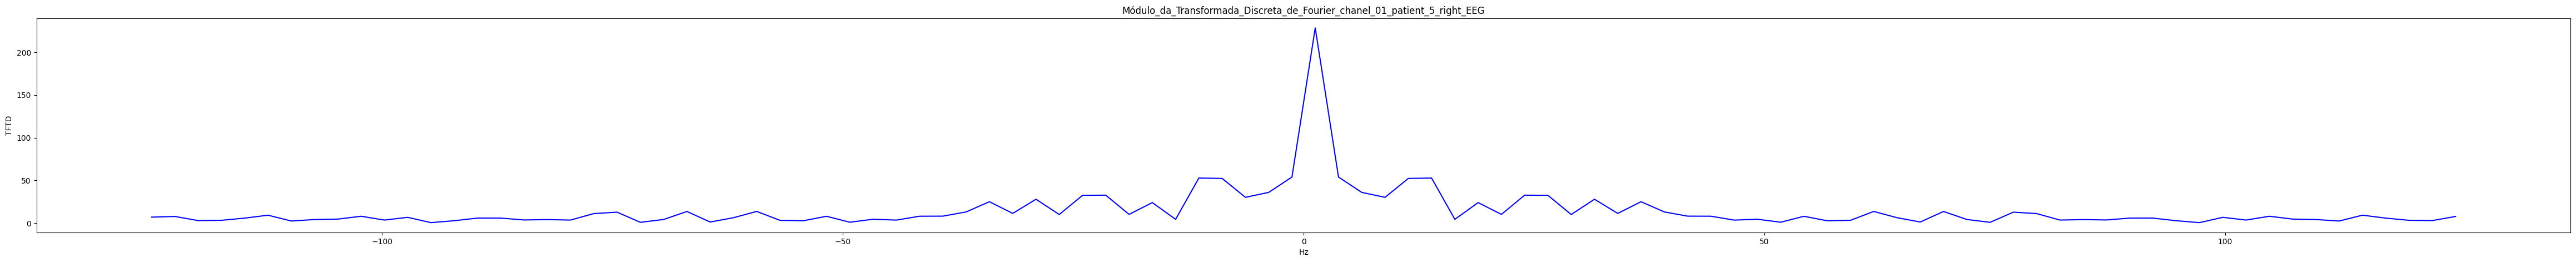

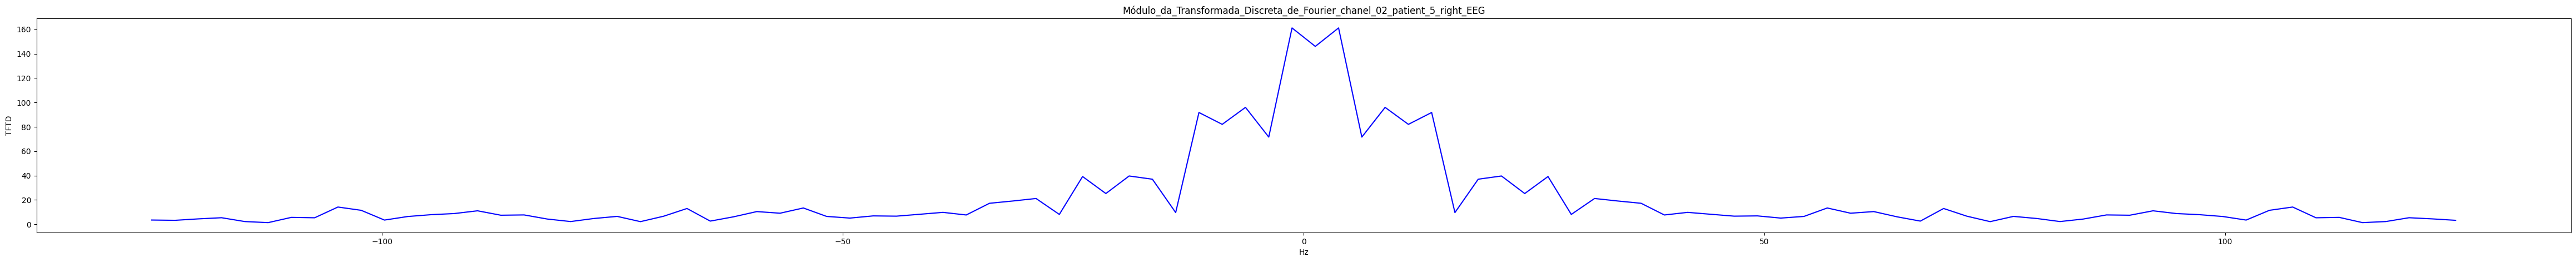

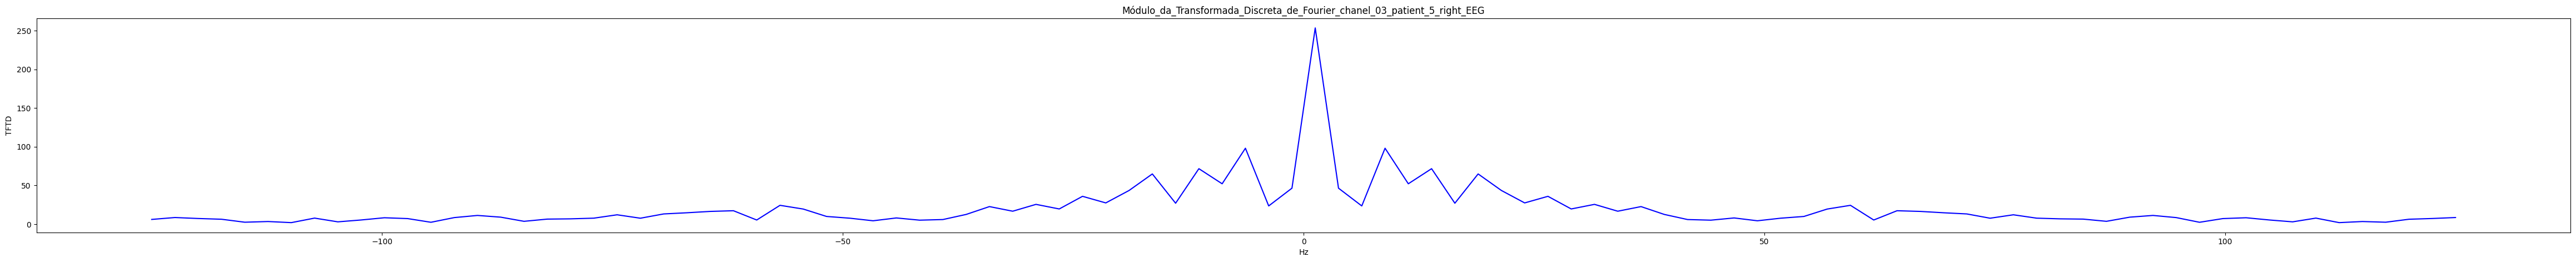

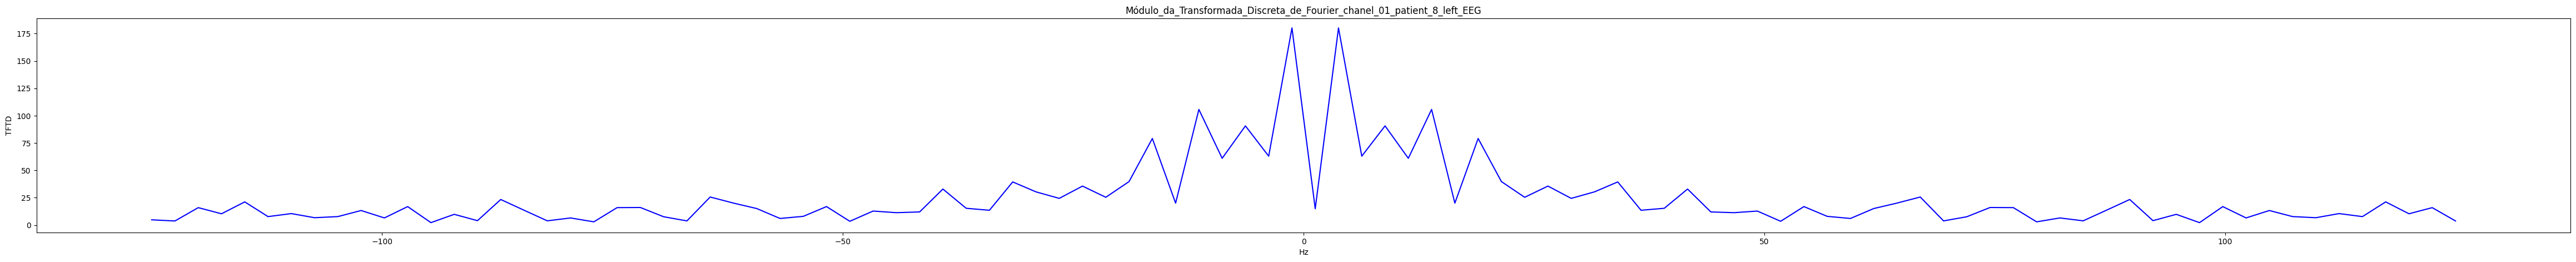

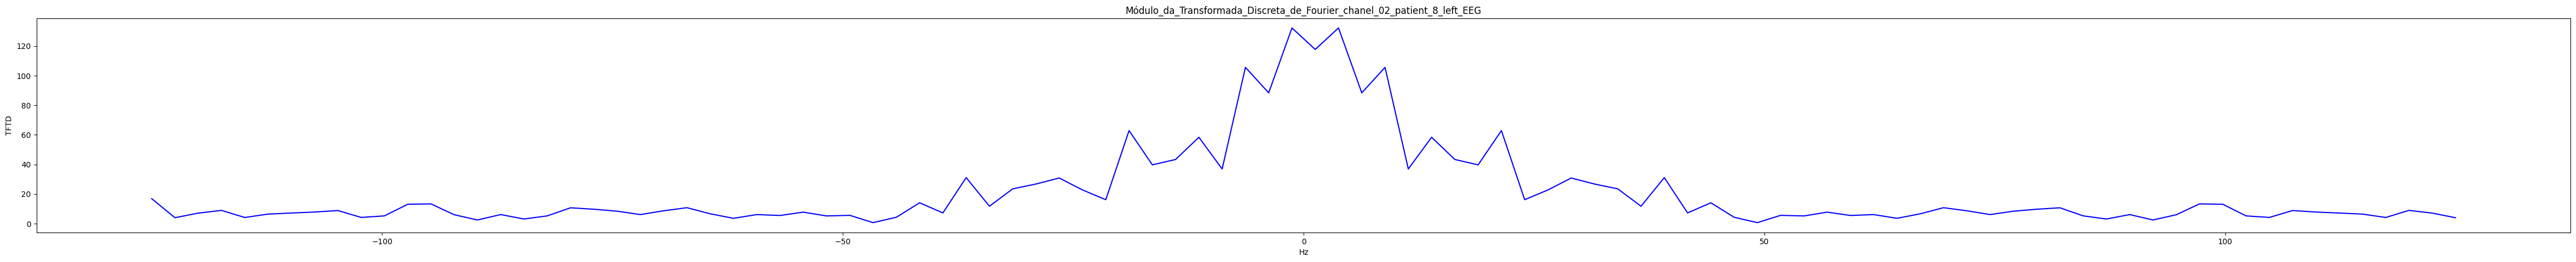

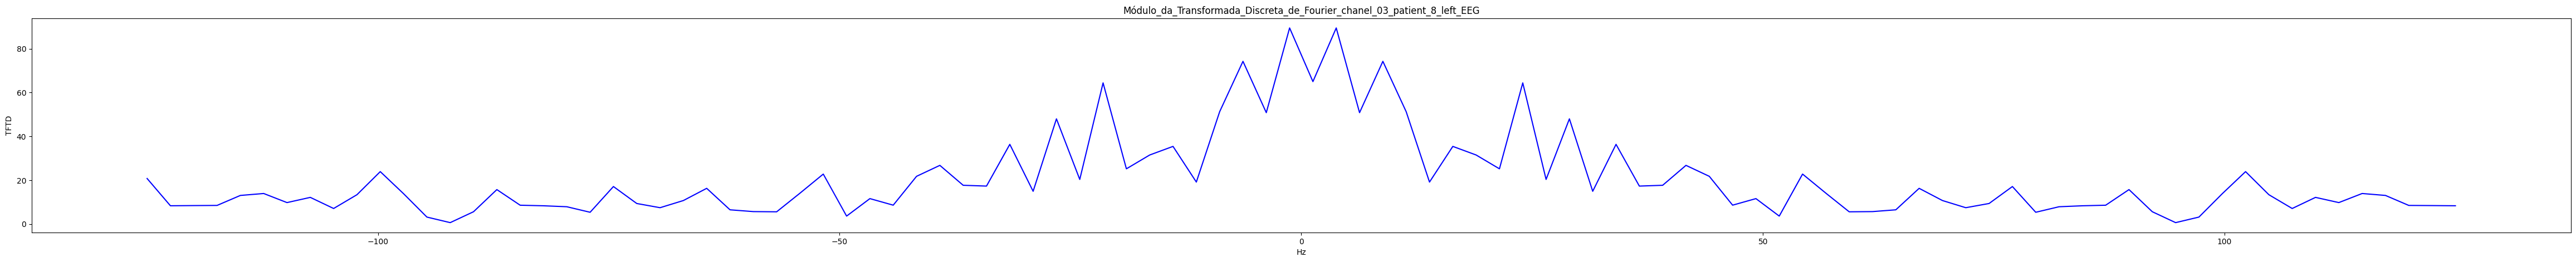

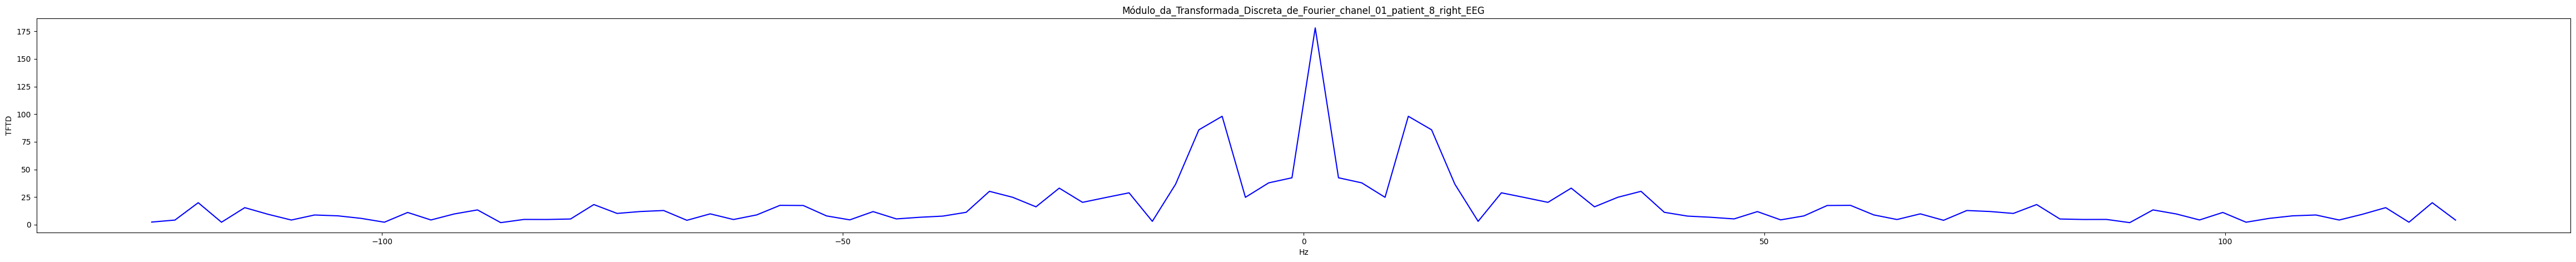

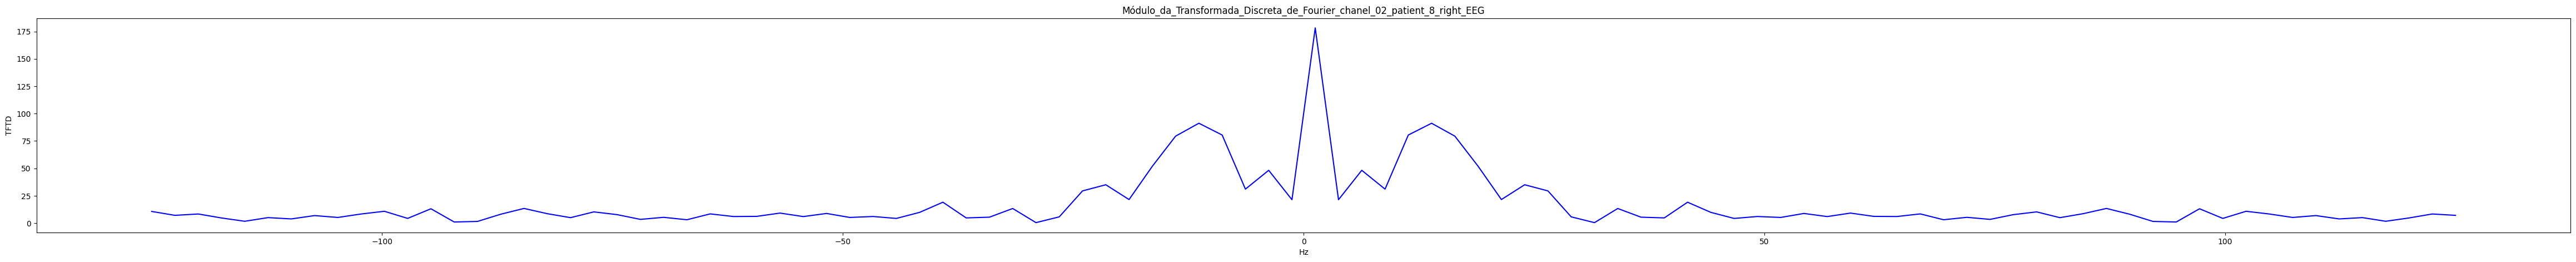

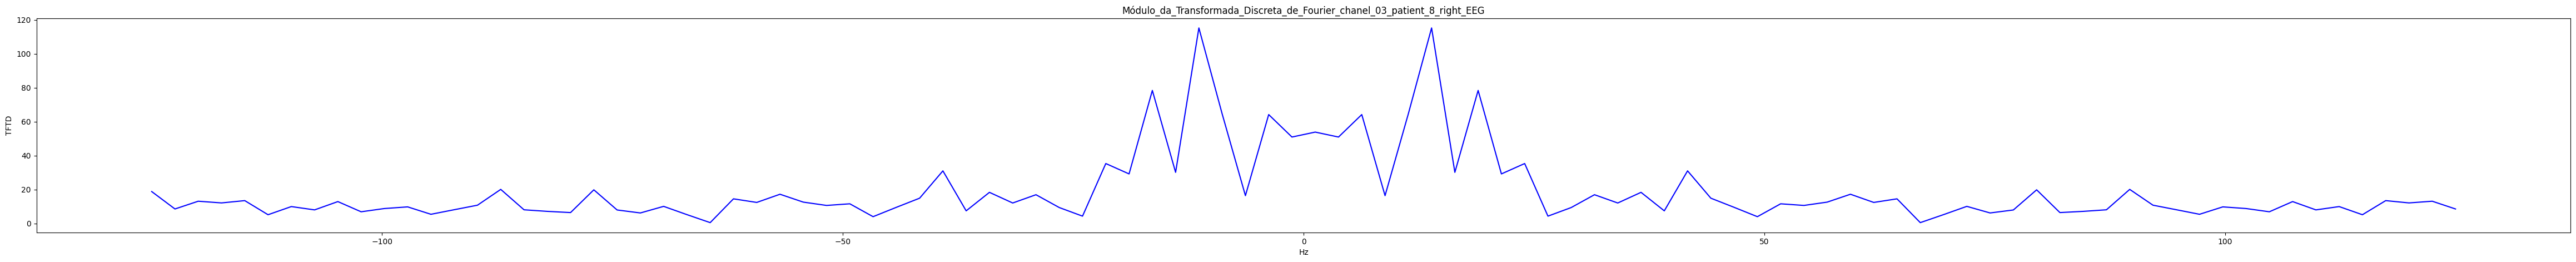

In [ ]:
chanels_freq = {}
for k in p:
  patient = "patient_"+str(k)
  chanels_freq[patient] = {}
  chanels_freq[patient]["left"] = {}
  chanels_freq[patient]["right"] = {}
  chanels_freq[patient]["left"] = TFTD(chanels[patient]["left"], chanels_count, start, tam)
  chanels_freq[patient]["right"] = TFTD(chanels[patient]["right"], chanels_count, start, tam)

**Comentários:**

Criação de porta em frequência para filtrar "idealmente" o sinal janelado.

<StemContainer object of 3 artists>

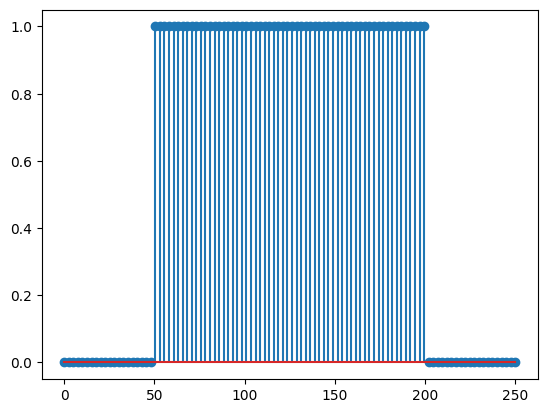

In [ ]:
n = np.linspace(0,250,tam)
frequency_filter = (n>=50)*1 - (n>=201)*1 
plt.stem(n,frequency_filter)

In [ ]:
def filtering (chanels:dict): ##função usada para multiplicar a TFTD de cada canal no domínio da frequência com frequência de corte 100Hz
  chanels_filtered = {}
  n = np.linspace(0,250,tam)
  frequency_filter = (n>=50)*1 - (n>=201)*1 ##rect in frequency
  for i,j in zip(chanels.values(), chanels.keys()):
    chanels_filtered[j] = [x*y for x,y in zip(i,frequency_filter)] ##multiplicação da porta por cada canal na frequência
  return chanels_filtered

In [ ]:
chanels_filtered = {}
for k in p:
  patient = "patient_"+str(k)
  chanels_filtered[patient] = {}
  chanels_filtered[patient]["left"] = filtering(chanels_freq[patient]["left"]) ##chamar a função filtering para cada canal de cada paciente
  chanels_filtered[patient]["right"] = filtering(chanels_freq[patient]["right"])

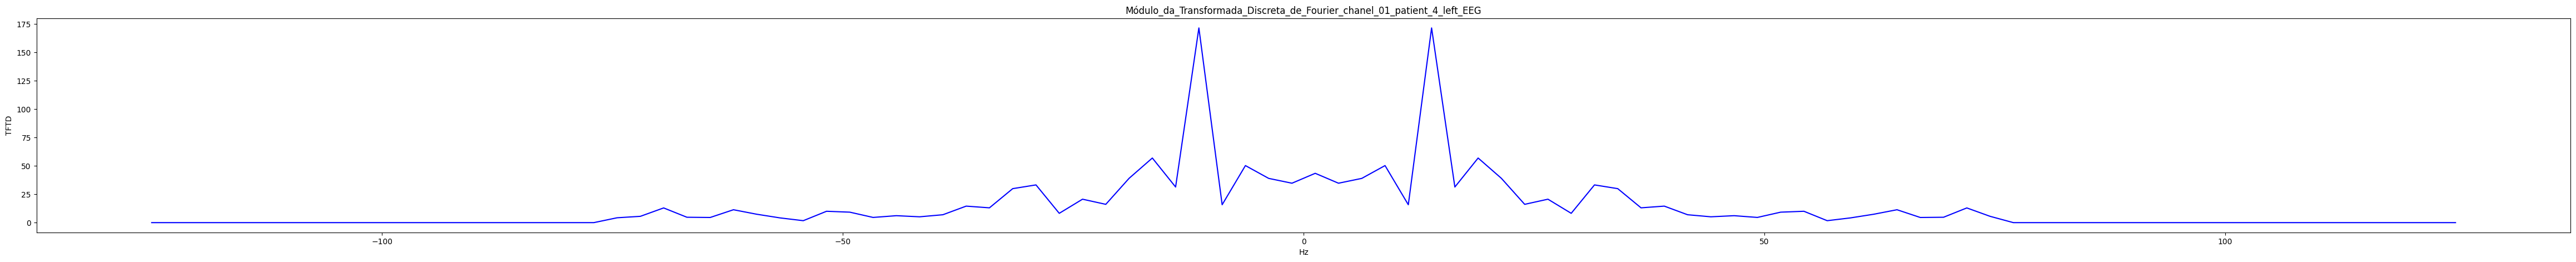

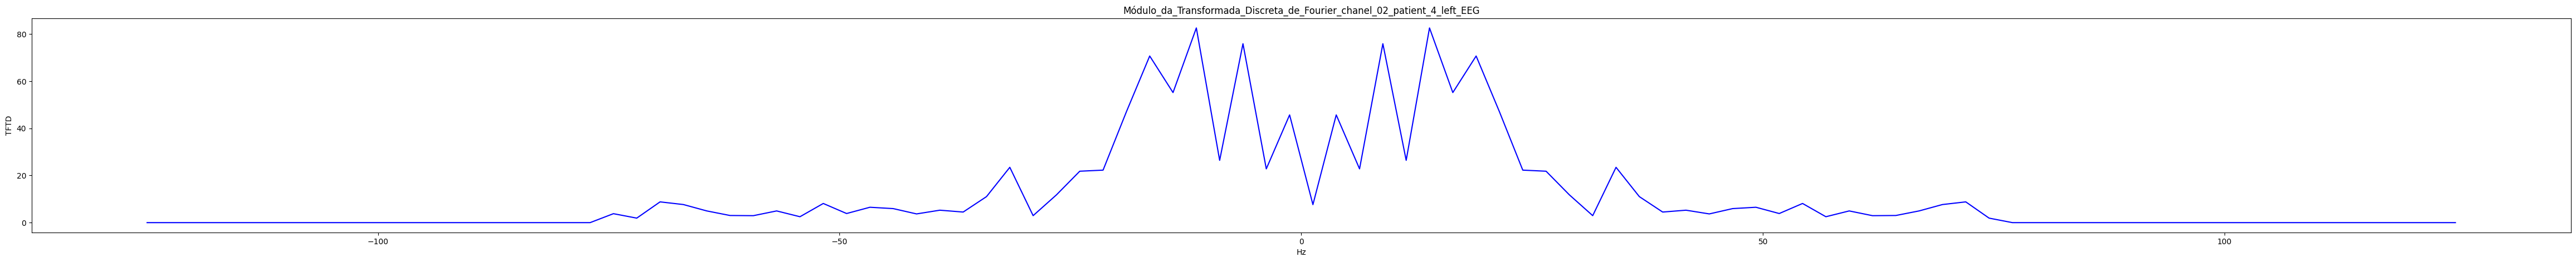

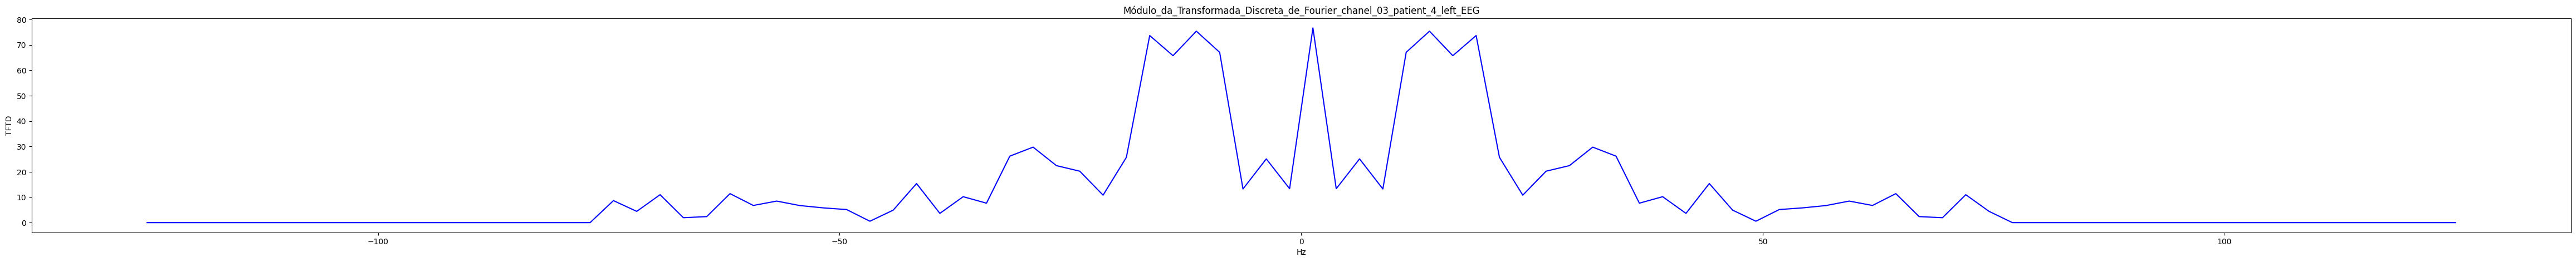

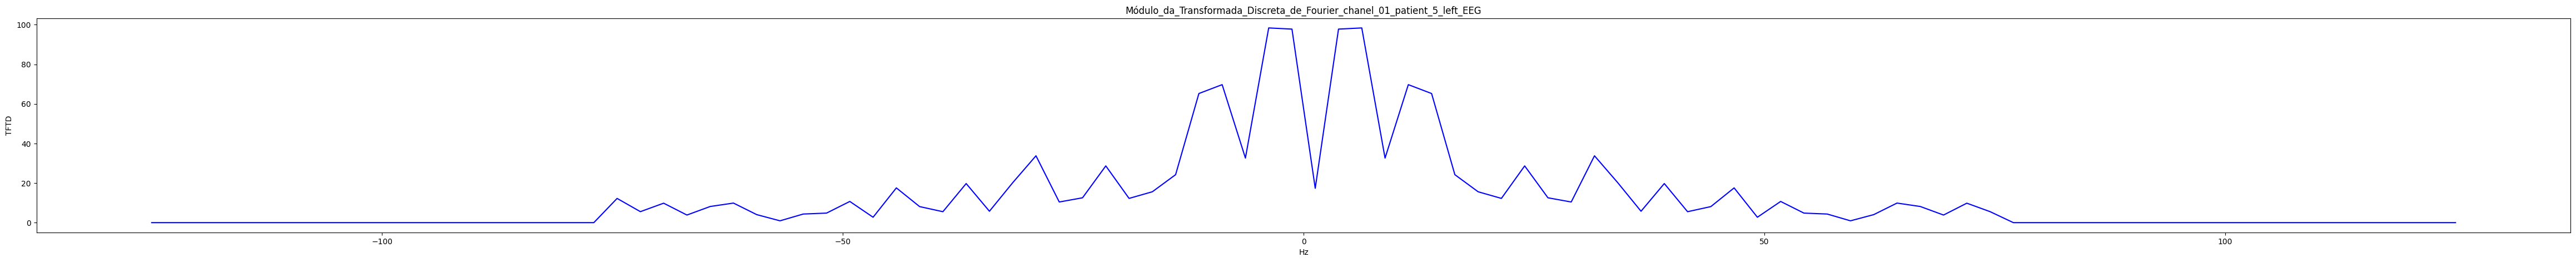

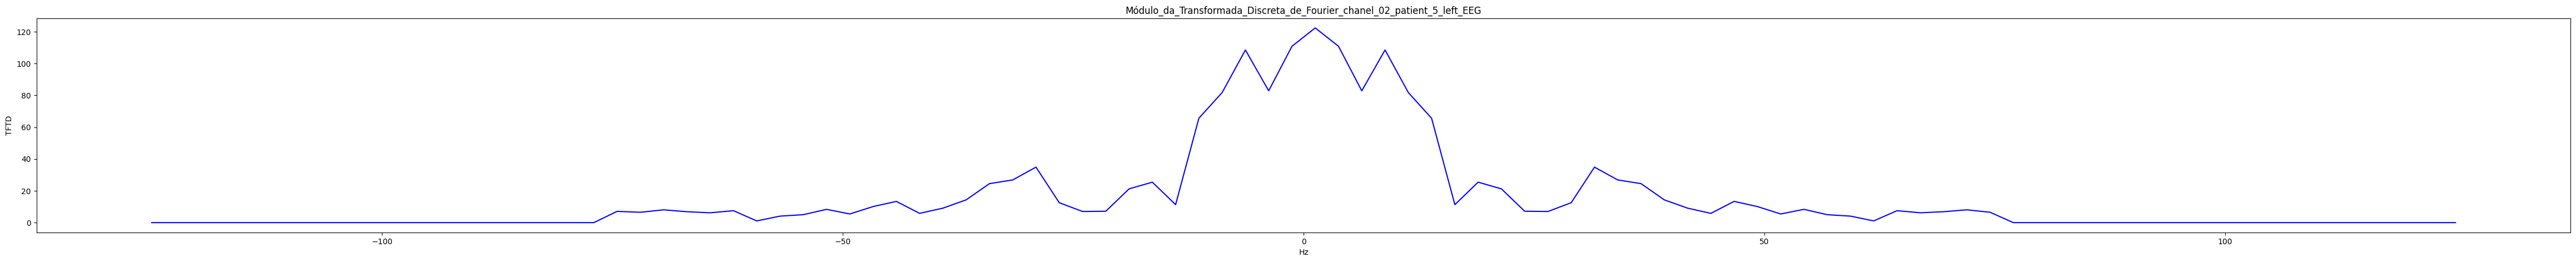

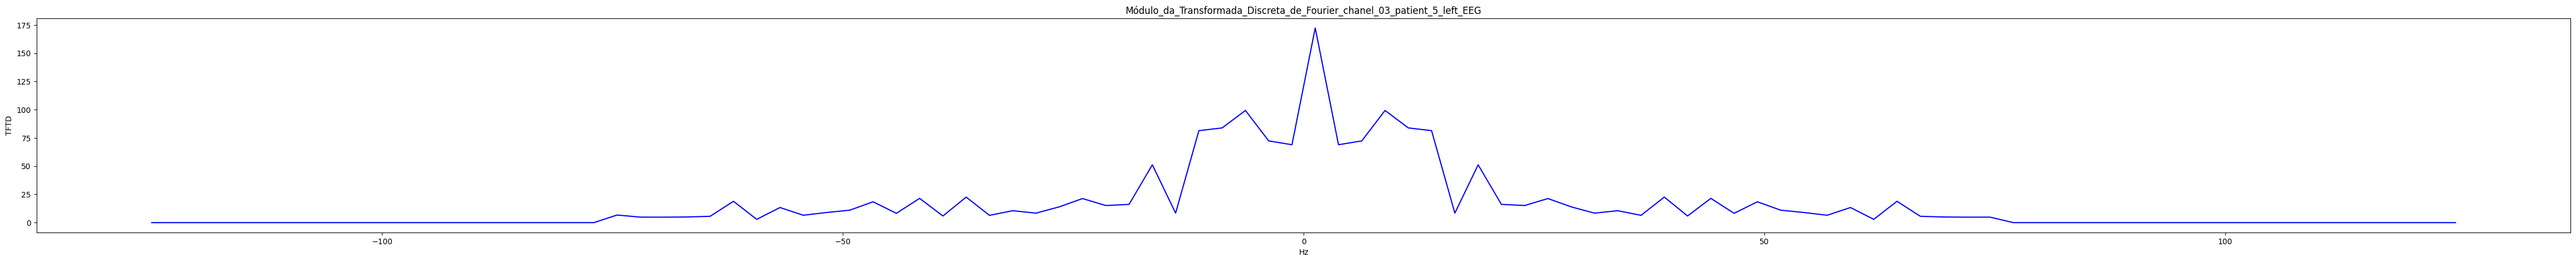

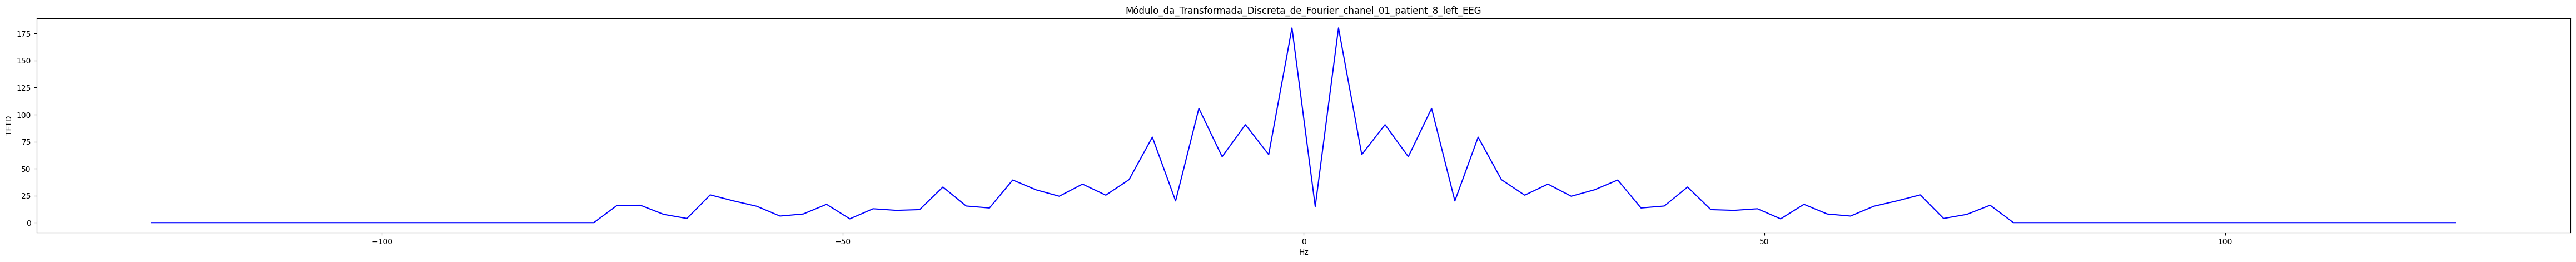

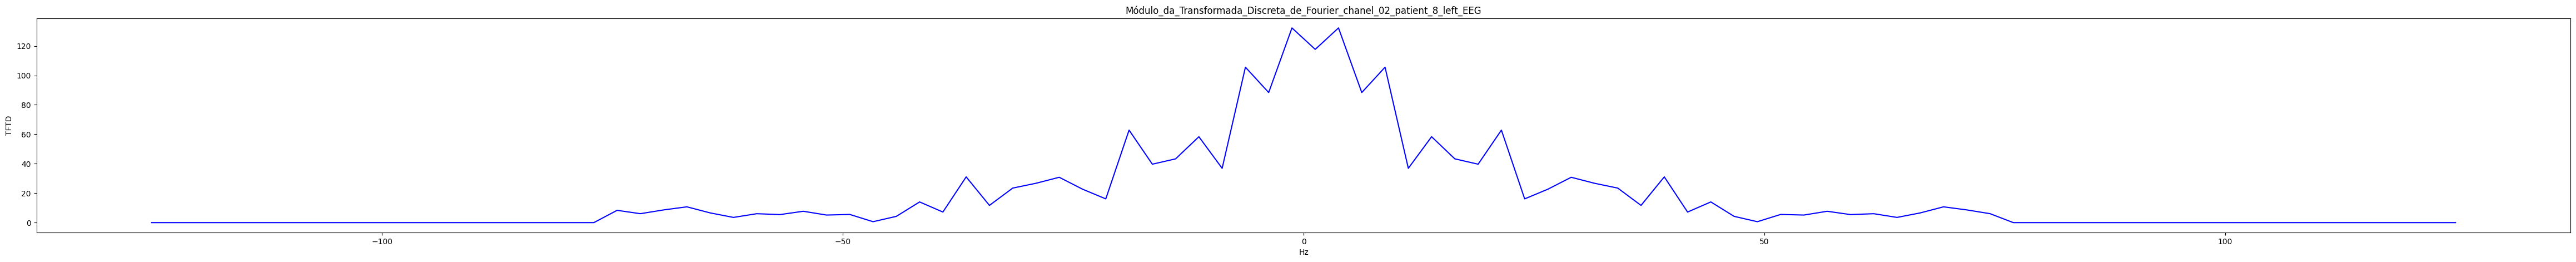

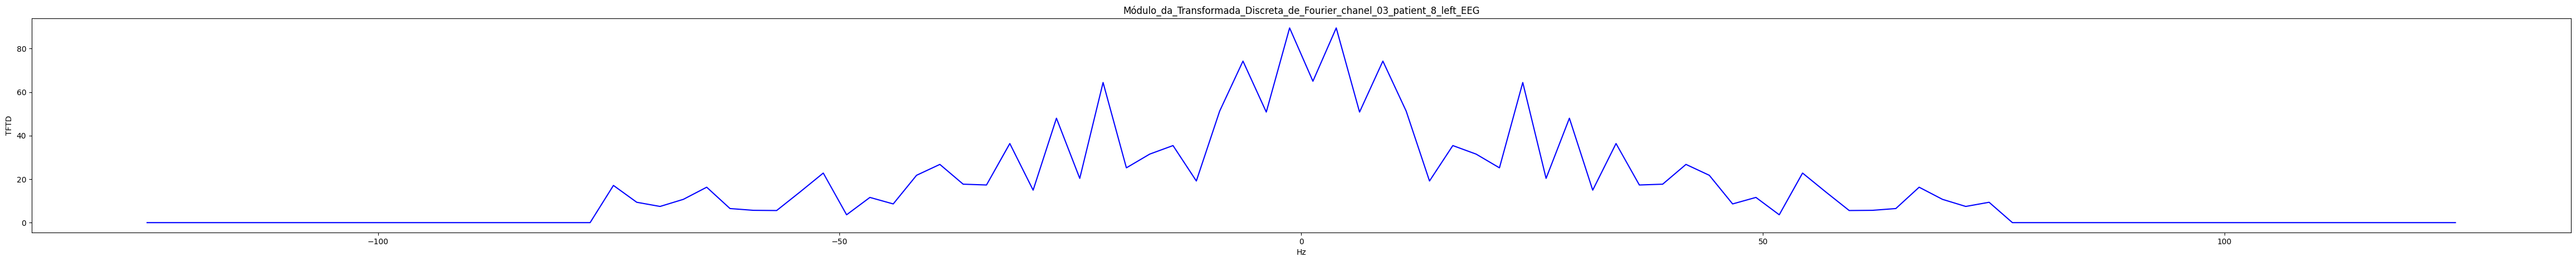

In [ ]:
for k in p:
  patient = "patient_"+str(k) 
  for i,j,z in zip(chanels_filtered[patient]["left"].keys(),chanels_filtered[patient]["left"].values(),chanels_count):
    fhz = np.linspace(-125,125,tam)
    f = plt.figure(figsize=(200,5)) 
    plt.subplot(1,3,z+1, title='Módulo_da_Transformada_Discreta_de_Fourier_'+i+'_EEG')
    plt.xlabel("Hz")
    plt.ylabel("TFTD")
    plt.plot(fhz, j, 'b')
    plt.show()

**Cometários:**

Foi aplicada a transformada inversa de Fourier no sinal filtrado para ver qual sua forma no tempo agora.

In [ ]:
def ITFTD(chanels:dict,chanels_count:list,start:int,tam:int):
  IXTF = {}
  for i,j,k in zip(chanels.keys(),chanels.values(),chanels_count):
    print(i,j)
    print("\n")
    t = np.linspace(0,0.4,tam) 
    IXtf = fftpack.ifftshift(fftpack.ifft(j))
    IXTF[i] = IXtf
    f = plt.figure(figsize=(200,5))
    plt.subplot(1,3,k+1, title='Transformada_Inversa_de_Fourier_'+i+'_EEG_Filtro_Porta')
    plt.xlabel("t")
    plt.ylabel("ITFTD")
    plt.stem(t, IXTF[i], 'b')
    plt.show()
  return IXTF

chanel_01_patient_4_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.280153518791516, 5.552094242031816, 12.950880092992087, 4.737931646034584, 4.535665744974001, 11.35467528484038, 7.394223052172439, 4.169341523459509, 1.712543345452033, 10.003488313777854, 9.215797468360705, 4.578273661081863, 6.113060927682453, 5.137153534097718, 6.953320245398611, 14.539732298871241, 13.036382110695302, 29.933901365724562, 33.23042014879843, 8.202223927816181, 20.640536093963696, 16.117046315868993, 39.01202935773564, 56.912574266526676, 31.37055418036832, 171.49812985944655, 15.76293105926668, 50.25410282466416, 38.96854466823281, 34.72067248346687, 43.445487144274054, 34.72067248346687, 38.96854466823281, 50.25410282466416, 15.76293105926668, 171.49812985944655, 31.37055418036832, 56.912574266526676, 39.01202935773564, 16.117046315868993, 20.640536093963696, 8.202223927816181, 33.23042014879843, 29.933901365724562, 13.036382110695302, 14.

/usr/local/lib/python3.9/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


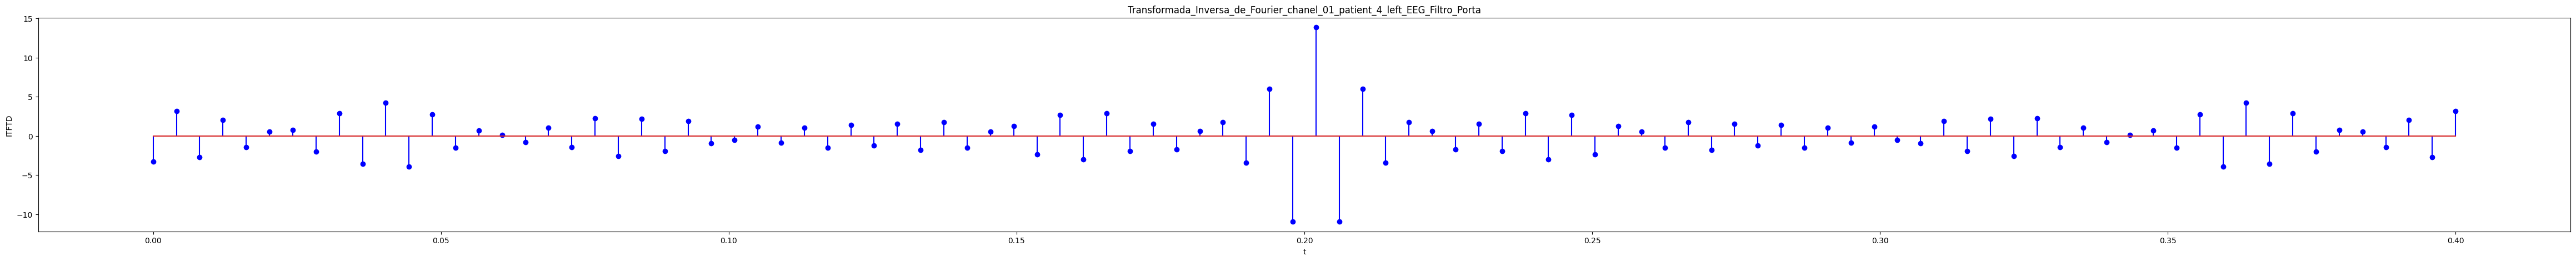

chanel_02_patient_4_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.797669118851316, 1.9110160222347239, 8.804356682713772, 7.6728256634899905, 4.971757613902082, 3.02622221933707, 2.949433290968471, 4.9648018297302965, 2.5037478116896463, 8.126255620709646, 3.8642274259092226, 6.521253067004351, 5.950229115833811, 3.696267573883625, 5.275421676034212, 4.489064177610518, 11.031022324009658, 23.463078492970293, 2.9623193800940997, 11.775611285101904, 21.806423109893753, 22.271710464898234, 47.02067978057599, 70.68159678853158, 55.17803491383503, 82.58907407739463, 26.424351669397126, 75.89547075556862, 22.806216113098433, 45.700958685975515, 7.638666361486234, 45.700958685975515, 22.806216113098433, 75.89547075556862, 26.424351669397126, 82.58907407739463, 55.17803491383503, 70.68159678853158, 47.02067978057599, 22.271710464898234, 21.806423109893753, 11.775611285101904, 2.9623193800940997, 23.463078492970293, 11.03102232400965

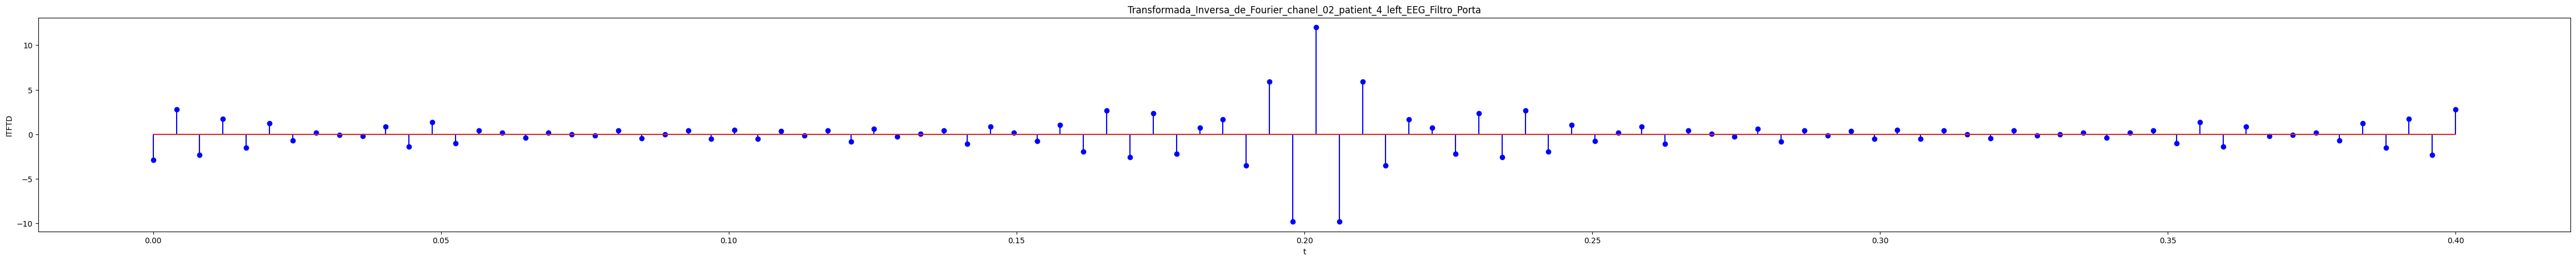

chanel_03_patient_4_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.67756616297267, 4.433278423041189, 11.002222289638592, 1.9408785654923344, 2.372622063513464, 11.423335912018697, 6.765061346845577, 8.489551990353146, 6.720637416804958, 5.812274075004851, 5.154055658294118, 0.552707054561424, 4.923469859369229, 15.401542838118907, 3.6454312571143315, 10.217236439375732, 7.6655505869785765, 26.19687608999168, 29.742089102374965, 22.45578649665627, 20.268285140383323, 10.823207469537627, 25.738774233963586, 73.71192895625799, 65.77234832449034, 75.43031903310617, 67.10744024190613, 13.262149850153904, 25.117695880085094, 13.367012744305068, 76.70710307469291, 13.367012744305068, 25.117695880085094, 13.262149850153904, 67.10744024190613, 75.43031903310617, 65.77234832449034, 73.71192895625799, 25.738774233963586, 10.823207469537627, 20.268285140383323, 22.45578649665627, 29.742089102374965, 26.19687608999168, 7.6655505869785765

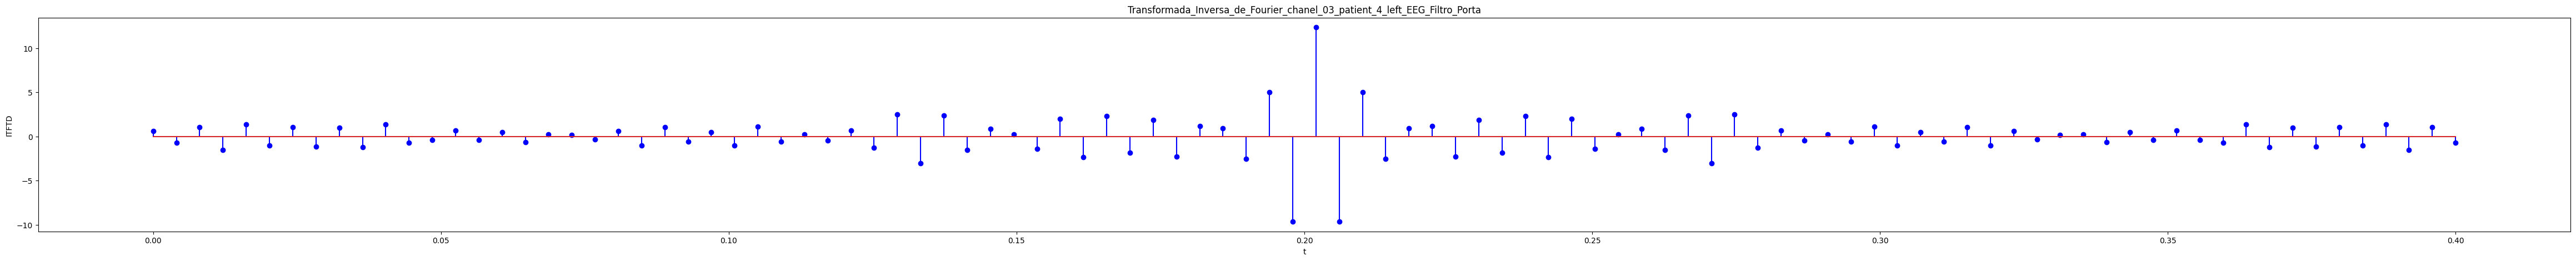

chanel_01_patient_4_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.766039504845712, 9.43094650955734, 6.8598759368554285, 17.11629502875417, 5.266460998471486, 14.104152570833012, 0.9888932505043321, 10.710296011225953, 5.8957222776880895, 5.936200689143336, 5.119410479957599, 16.44261504138161, 0.514704842724776, 8.786983468618425, 15.95500924703487, 6.70944621453268, 17.890749258906403, 30.431599185194898, 44.158904456179044, 16.577309327524333, 26.11030545296747, 28.411940280209166, 108.36173983481858, 56.80430979624564, 71.94292993980206, 97.6800826299754, 224.5214854430528, 87.43668762536454, 20.449746691376877, 81.68138086646425, 199.316395819028, 81.68138086646425, 20.449746691376877, 87.43668762536454, 224.5214854430528, 97.6800826299754, 71.94292993980206, 56.80430979624564, 108.36173983481858, 28.411940280209166, 26.11030545296747, 16.577309327524333, 44.158904456179044, 30.431599185194898, 17.890749258906403, 6.70

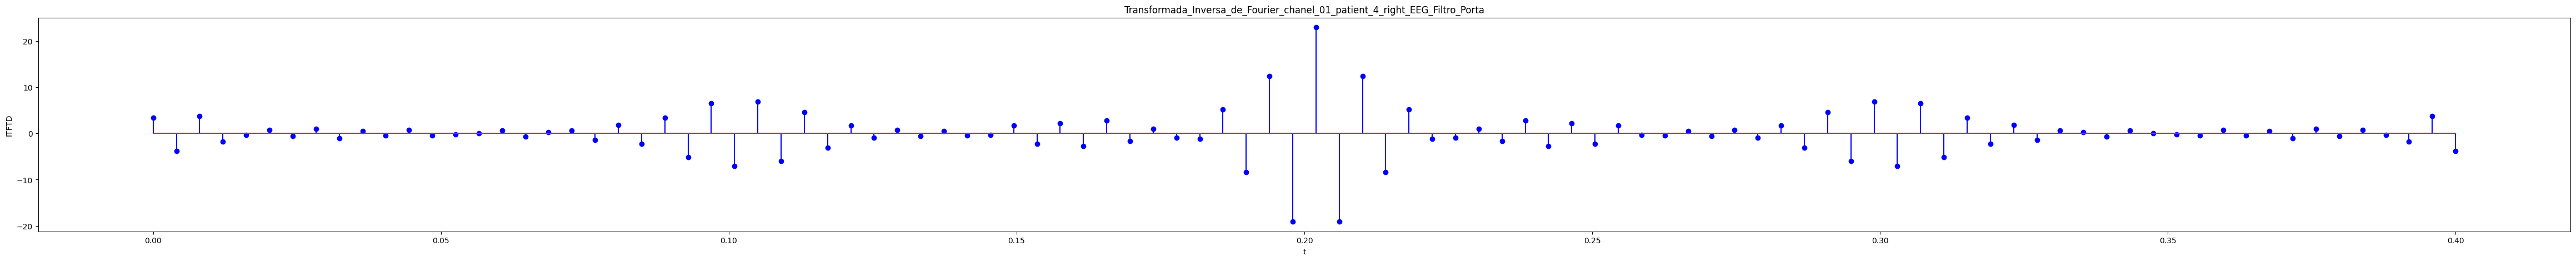

chanel_02_patient_4_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.411016613120445, 0.8625376048918589, 4.856098237956072, 10.487054445935005, 7.193833844686652, 2.384584331996666, 3.5375182905216707, 11.376793156359426, 5.025490787600672, 3.0678458134979274, 2.008684762217849, 3.8858195762809484, 13.934233760506805, 9.821451974561425, 9.827008897138883, 11.330921180078446, 8.933133942090203, 20.00922774284807, 22.71735348050085, 38.20625775415621, 26.12959307245317, 39.62587872200399, 39.991931730863676, 23.806336031012744, 47.99887064182987, 10.316338154702413, 80.0138882015891, 22.477072670175197, 35.2334980165605, 33.99061035876708, 105.19874876020447, 33.99061035876708, 35.2334980165605, 22.477072670175197, 80.0138882015891, 10.316338154702413, 47.99887064182987, 23.806336031012744, 39.991931730863676, 39.62587872200399, 26.12959307245317, 38.20625775415621, 22.71735348050085, 20.00922774284807, 8.933133942090203, 11.33

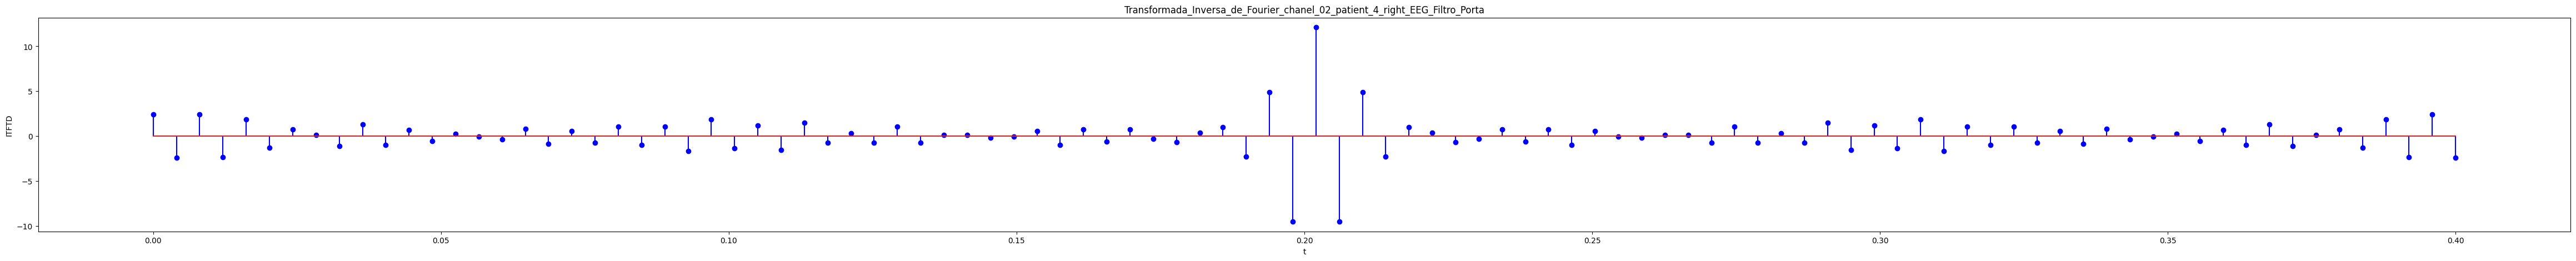

chanel_03_patient_4_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.447312047990541, 3.855293424794958, 1.4151500831512993, 4.731103761358648, 11.50273217766818, 8.128141661034757, 11.200088797166796, 2.3646499739723446, 8.72317180629581, 9.091466223397788, 11.884932409730196, 3.391599954801291, 7.009680797568704, 12.952153811452336, 16.375642943862587, 16.388960551253884, 11.895926245782, 23.696617358429656, 9.626836145343495, 40.7806614179384, 30.177494055840334, 25.06418096741946, 26.613991006858964, 53.43295873671493, 40.91742786595704, 58.127041096820406, 36.86318163357179, 13.233850364046523, 23.250323163578077, 96.60039647883968, 263.87731746395053, 96.60039647883968, 23.250323163578077, 13.233850364046523, 36.86318163357179, 58.127041096820406, 40.91742786595704, 53.43295873671493, 26.613991006858964, 25.06418096741946, 30.177494055840334, 40.7806614179384, 9.626836145343495, 23.696617358429656, 11.895926245782, 16.38

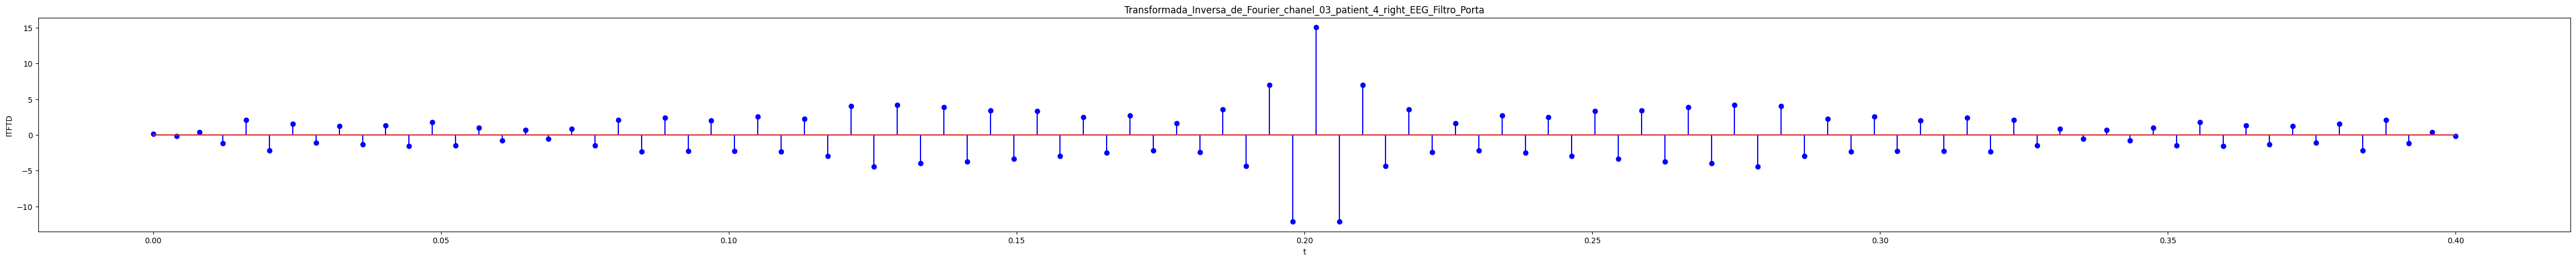

chanel_01_patient_5_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.232813178731105, 5.546205796559958, 9.824963647580061, 3.836139576100141, 8.151466162982615, 9.883132194007468, 4.042629930538256, 0.9184933334092316, 4.344489562899208, 4.8161121975928, 10.703326722608093, 2.7245284009712236, 17.54878962949451, 8.101405085422256, 5.523167963208621, 19.743865905508837, 5.750314255704795, 20.176503815837886, 33.766543152984305, 10.425025461681129, 12.551690094316214, 28.661843832861837, 12.24198719478757, 15.594935331043002, 24.230403339008316, 65.23197429809395, 69.71674703072433, 32.615300931743796, 98.37177636885961, 97.78411460362756, 17.36171511406119, 97.78411460362756, 98.37177636885961, 32.615300931743796, 69.71674703072433, 65.23197429809395, 24.230403339008316, 15.594935331043002, 12.24198719478757, 28.661843832861837, 12.551690094316214, 10.425025461681129, 33.766543152984305, 20.176503815837886, 5.750314255704795, 

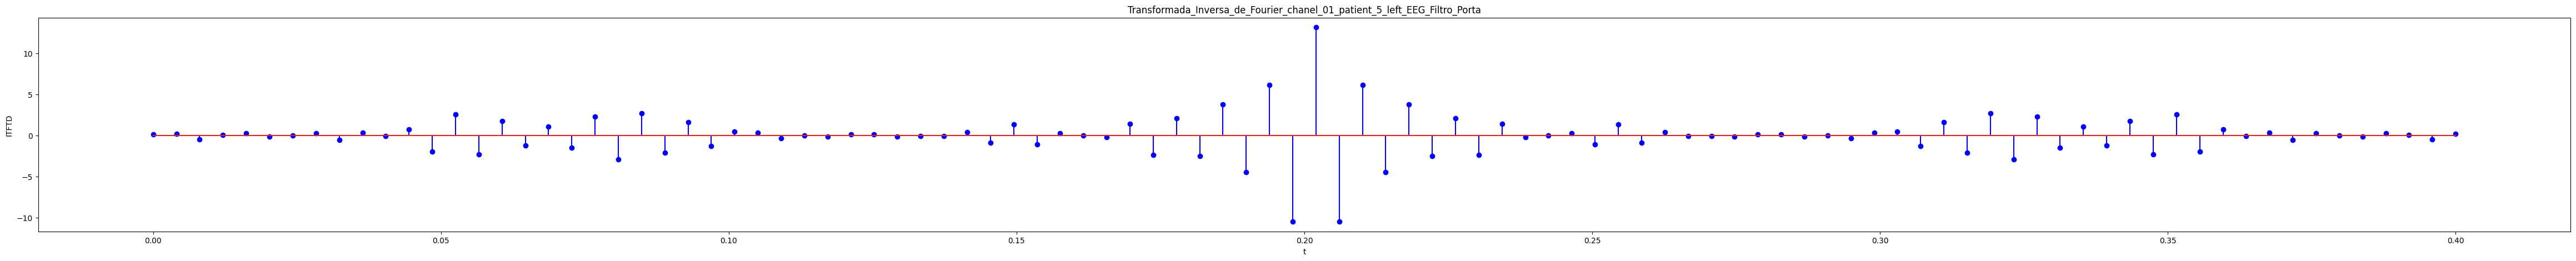

chanel_02_patient_5_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.085399435020239, 6.50647950213356, 8.051122017429803, 6.856160330513012, 6.184642562693446, 7.503669592932491, 1.0784275872650122, 4.082455363398974, 4.992730634487109, 8.346577930573313, 5.446132851852165, 10.098822048026744, 13.352032691448258, 5.816358065708728, 9.098313933006567, 14.319596111285602, 24.508428289762747, 26.828407730281974, 34.87080697405415, 12.525014116316854, 7.003116923971242, 7.161846175326957, 21.219423050808118, 25.43642457319237, 11.308302379863454, 65.62905808693522, 81.77303253605767, 108.53152167698127, 82.85900277140213, 110.86111917647648, 122.38651102464333, 110.86111917647648, 82.85900277140213, 108.53152167698127, 81.77303253605767, 65.62905808693522, 11.308302379863454, 25.43642457319237, 21.219423050808118, 7.161846175326957, 7.003116923971242, 12.525014116316854, 34.87080697405415, 26.828407730281974, 24.508428289762747, 1

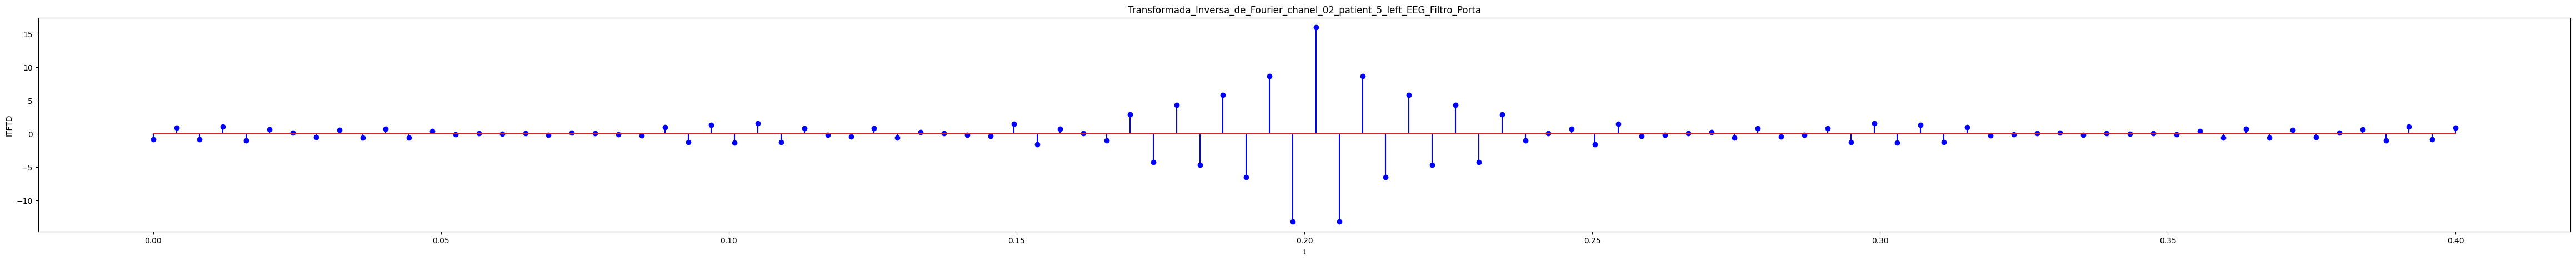

chanel_03_patient_5_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.734538465485126, 4.867661347396156, 4.837994775159136, 4.990612130095968, 5.6199596407020564, 18.8941958562082, 2.8963334400972838, 13.383567921402447, 6.538264357236426, 8.959793998655815, 11.035202657240612, 18.455489037317914, 8.245070482332883, 21.487802022631556, 5.8730188559292325, 22.61868041262997, 6.447784120172292, 10.5626004767753, 8.399462407950253, 13.961887955584174, 21.31726123224534, 15.15064295775371, 16.1566964858135, 51.19052622925623, 8.417694566152674, 81.42332850608958, 83.86052787982415, 99.3134563542317, 72.3663734698059, 68.9707890940511, 172.37811856260015, 68.9707890940511, 72.3663734698059, 99.3134563542317, 83.86052787982415, 81.42332850608958, 8.417694566152674, 51.19052622925623, 16.1566964858135, 15.15064295775371, 21.31726123224534, 13.961887955584174, 8.399462407950253, 10.5626004767753, 6.447784120172292, 22.61868041262997, 5

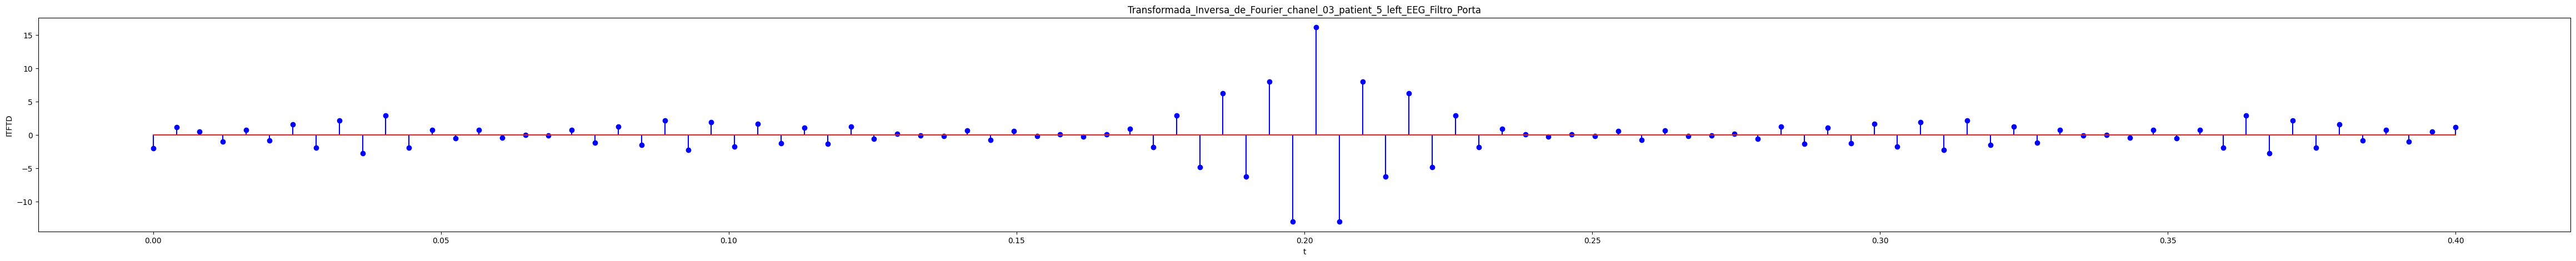

chanel_01_patient_5_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.82702433530458, 0.9396237413635343, 4.2565158514904, 13.63213883016629, 1.29246546253493, 6.348772007128115, 13.688509834157488, 3.267757799061882, 2.7709292946958026, 7.99277959445937, 1.0577771483583165, 4.552009021126715, 3.536492649805697, 8.091930066771607, 8.16970992338715, 13.104821161438482, 25.079188392397928, 11.379818209216419, 27.947437559372787, 10.083473524693854, 32.52548748488512, 32.73212224277835, 10.232011889897391, 24.016717043198607, 4.434454203298495, 52.77212878934024, 52.31081690168274, 30.211651091520856, 35.96087924841875, 53.936434620467786, 228.4550240329595, 53.936434620467786, 35.96087924841875, 30.211651091520856, 52.31081690168274, 52.77212878934024, 4.434454203298495, 24.016717043198607, 10.232011889897391, 32.73212224277835, 32.52548748488512, 10.083473524693854, 27.947437559372787, 11.379818209216419, 25.079188392397928, 13

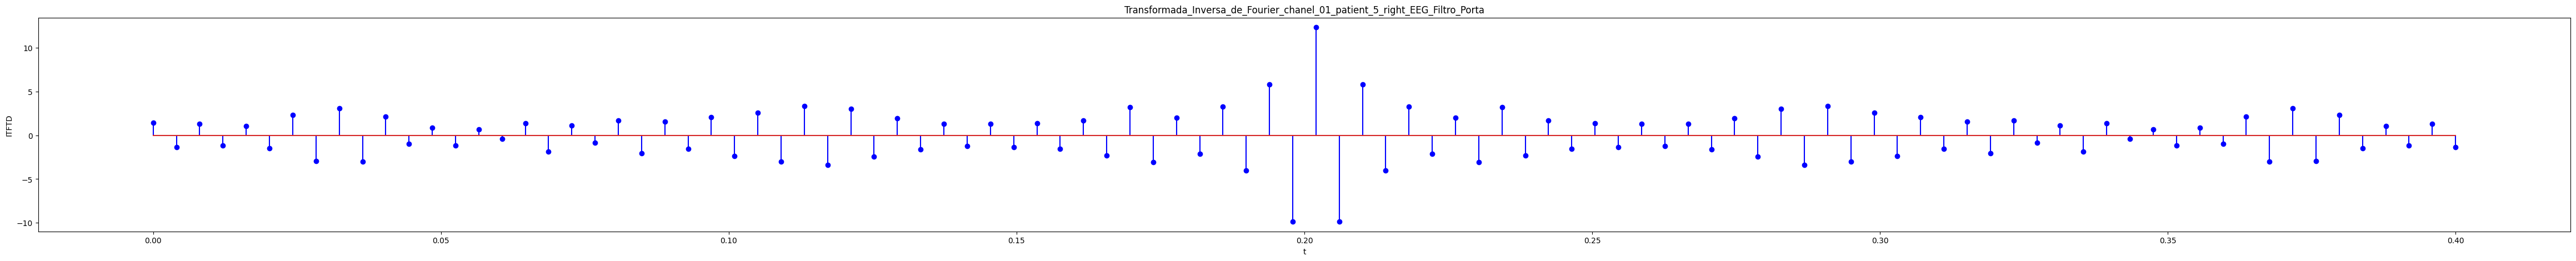

chanel_02_patient_5_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.527199208457596, 2.2143518402186455, 6.683818846412266, 13.003884179577488, 2.6580021195082004, 6.171664532059782, 10.469830571695182, 9.136026009108853, 13.428723354627781, 6.501930629282513, 5.135668112743136, 6.929708915631239, 6.717916011066445, 8.25613912389062, 9.827332636277669, 7.6814173126550545, 17.287322556614313, 19.147313538771538, 21.212388312295516, 8.145721062220211, 39.233510290018515, 25.279900937143164, 39.67769480647064, 37.03826218628254, 9.663020814228286, 91.78324821841886, 82.05153472765328, 95.9900033002553, 71.61772284181578, 161.17035701116092, 146.02883955138475, 161.17035701116092, 71.61772284181578, 95.9900033002553, 82.05153472765328, 91.78324821841886, 9.663020814228286, 37.03826218628254, 39.67769480647064, 25.279900937143164, 39.233510290018515, 8.145721062220211, 21.212388312295516, 19.147313538771538, 17.287322556614313, 7.

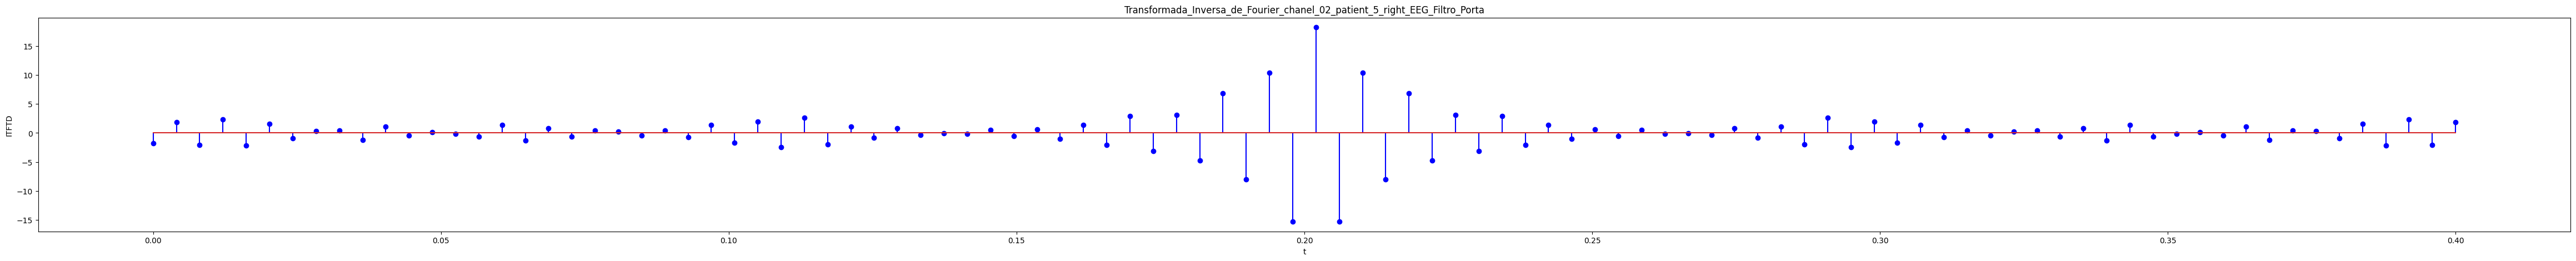

chanel_03_patient_5_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.165945426082153, 7.748567635551315, 13.269032405166595, 14.782641420555501, 16.522951648028744, 17.405357551399327, 5.428756679190736, 24.39278896288905, 19.5757275236825, 10.02192588941308, 7.773688070505839, 4.436819263644808, 8.092830774393786, 5.22714073123699, 6.032014336320036, 12.633353500828235, 22.755093305822932, 16.78799796800958, 25.624847836000512, 19.700695043450025, 36.01219178767595, 27.504125991168703, 43.55911217725541, 64.90565593631807, 27.10674067645451, 71.69651951401902, 52.20257326355199, 98.0977967917139, 23.605610751644864, 46.529484501449815, 253.40047302967878, 46.529484501449815, 23.605610751644864, 98.0977967917139, 52.20257326355199, 71.69651951401902, 27.10674067645451, 64.90565593631807, 43.55911217725541, 27.504125991168703, 36.01219178767595, 19.700695043450025, 25.624847836000512, 16.78799796800958, 22.755093305822932, 12.

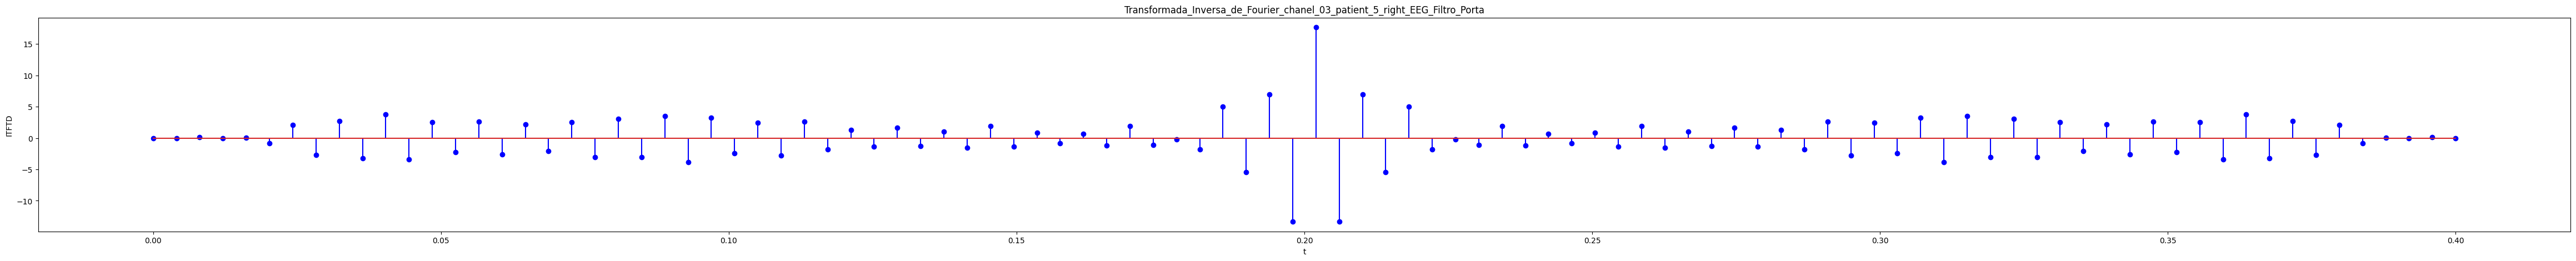

chanel_01_patient_8_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.956124298884728, 16.07388310903416, 7.620496075458751, 3.824725060883035, 25.65108842338622, 20.102919508116692, 15.118639411410717, 6.051317322165152, 7.977374369882252, 16.91299946365008, 3.4662068479611956, 12.814441025083445, 11.337096476866664, 12.014632328280742, 32.92932263703592, 15.355851394882098, 13.540665956321067, 39.43590232791403, 30.361601294394543, 24.412001743375892, 35.63758720412713, 25.399774541063515, 39.76637121442403, 79.13523109196578, 20.048863998750324, 105.67820163018591, 61.01868211854557, 90.64028279615066, 62.989111823483185, 180.14782169707306, 14.947737850003817, 180.14782169707306, 62.989111823483185, 90.64028279615066, 61.01868211854557, 105.67820163018591, 20.048863998750324, 79.13523109196578, 39.76637121442403, 25.399774541063515, 35.63758720412713, 24.412001743375892, 30.361601294394543, 39.43590232791403, 13.54066595632

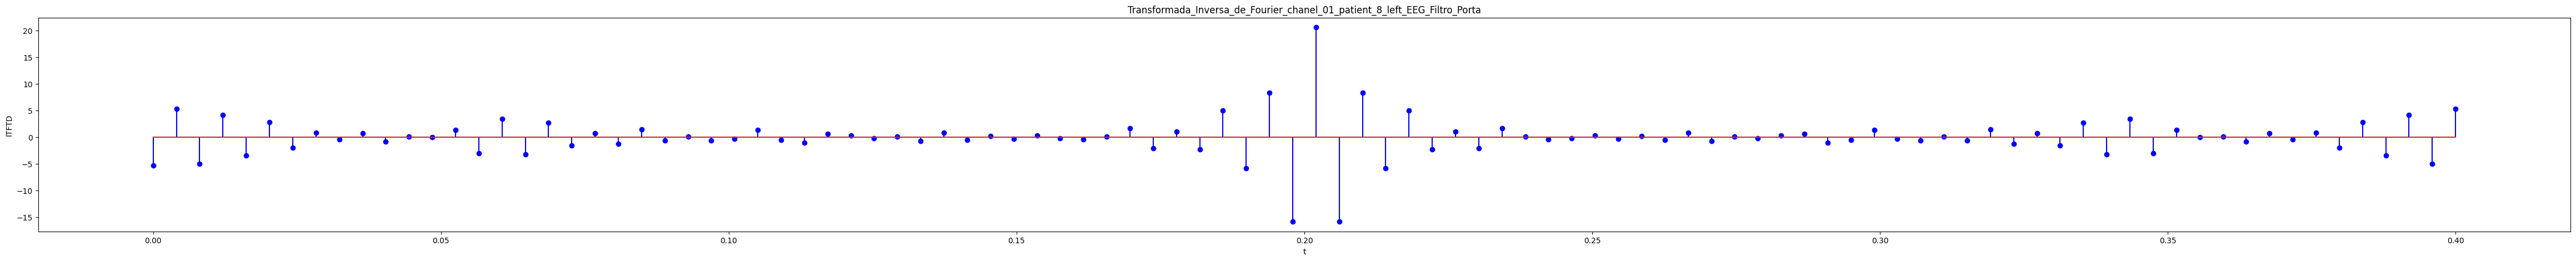

chanel_02_patient_8_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.356089274385054, 6.076855931016307, 8.639595602086413, 10.730505585167865, 6.60335363049659, 3.5443525202219304, 6.061176437502471, 5.466622682843173, 7.7153852639866525, 5.150490043309117, 5.557276748926318, 0.6300656307614044, 4.262320716738674, 14.0567825659181, 7.189581991155056, 31.073341944902182, 11.71239316454961, 23.459005445684205, 26.735342424448323, 30.80489267521364, 22.72540150504442, 16.13646511181261, 62.85133054423209, 39.696921815205734, 43.31479429974562, 58.34961837549805, 36.89938326005786, 105.58202436454651, 88.37392121474764, 132.2477957565426, 117.7019913023575, 132.2477957565426, 88.37392121474764, 105.58202436454651, 36.89938326005786, 58.34961837549805, 43.31479429974562, 39.696921815205734, 62.85133054423209, 16.13646511181261, 22.72540150504442, 30.80489267521364, 26.735342424448323, 23.459005445684205, 11.71239316454961, 31.07334

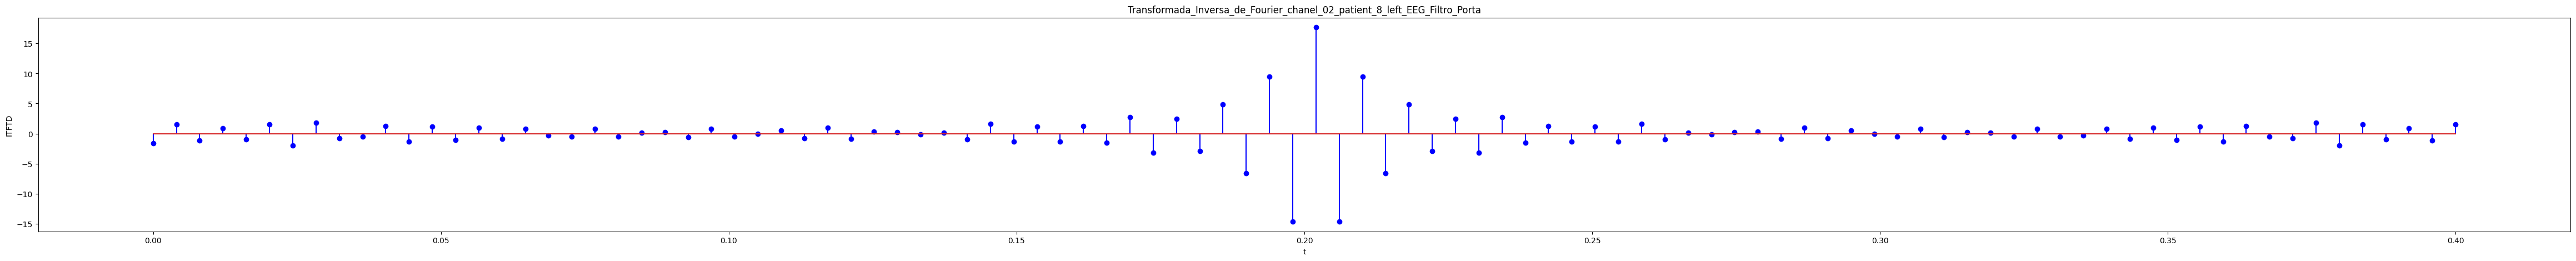

chanel_03_patient_8_left [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.108850660989482, 9.36281488818434, 7.4406436805653655, 10.711995054139447, 16.285976116118114, 6.478644314500019, 5.659632645302941, 5.567019268837713, 14.071239269808775, 22.79676170675627, 3.608370361615587, 11.593824082900797, 8.599166784248949, 21.768415333783345, 26.774782467390093, 17.6780380750745, 17.309883897733446, 36.37242758069475, 14.93367152398589, 48.019365741798296, 20.350419865969375, 64.44105198512347, 25.199041070734342, 31.509116576005116, 35.436091271175876, 19.14633676669267, 51.2794305053707, 74.28449338361379, 50.84553701368568, 89.53428930318736, 65.0308995193408, 89.53428930318736, 50.84553701368568, 74.28449338361379, 51.2794305053707, 19.14633676669267, 35.436091271175876, 31.509116576005116, 25.199041070734342, 64.44105198512347, 20.350419865969375, 48.019365741798296, 14.93367152398589, 36.37242758069475, 17.309883897733446, 17.6

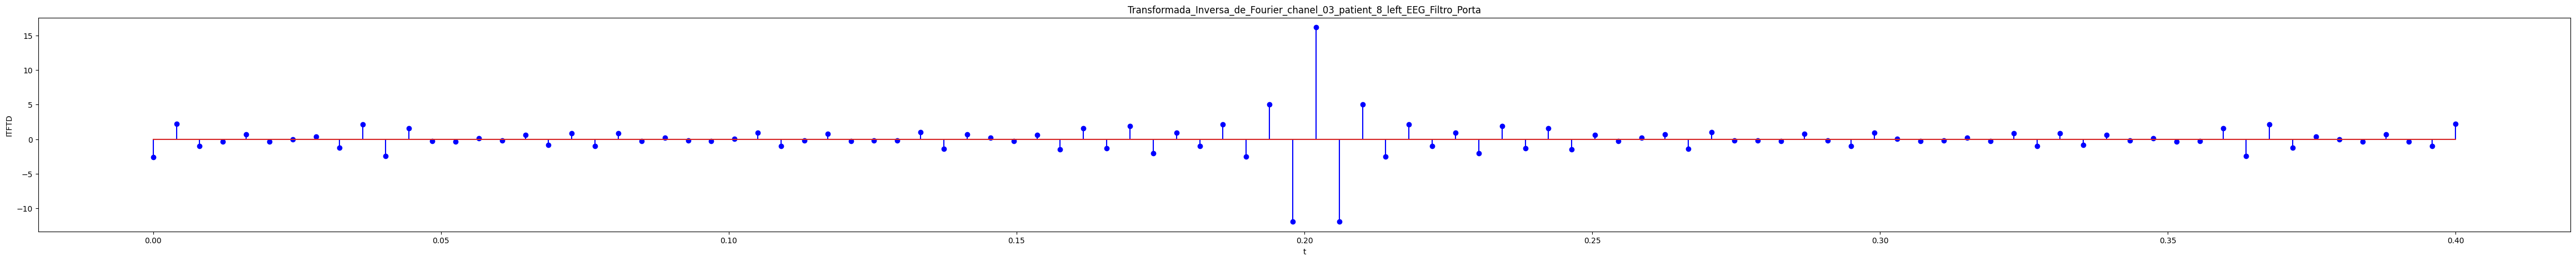

chanel_01_patient_8_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.162487608937658, 11.886540079323561, 12.791737532991466, 3.935690102541166, 9.773095352198803, 4.642356231863492, 8.825672387847641, 17.472854163319578, 17.332785118070603, 7.909399083512516, 4.332058232622195, 11.811073449293476, 5.198583764981697, 6.671850586271918, 7.738456818810908, 11.175848028143948, 30.1650516789127, 24.751954138269177, 16.139698057688243, 33.04863132740655, 20.186205172248243, 24.552950169855876, 28.805104637308094, 3.0095711293686596, 36.63435499145334, 85.8215387260581, 98.07227211583967, 24.740321417885518, 37.81750133730429, 42.41382435786255, 178.01480125123982, 42.41382435786255, 37.81750133730429, 24.740321417885518, 98.07227211583967, 85.8215387260581, 36.63435499145334, 3.0095711293686596, 28.805104637308094, 24.552950169855876, 20.186205172248243, 33.04863132740655, 16.139698057688243, 24.751954138269177, 30.1650516789127, 

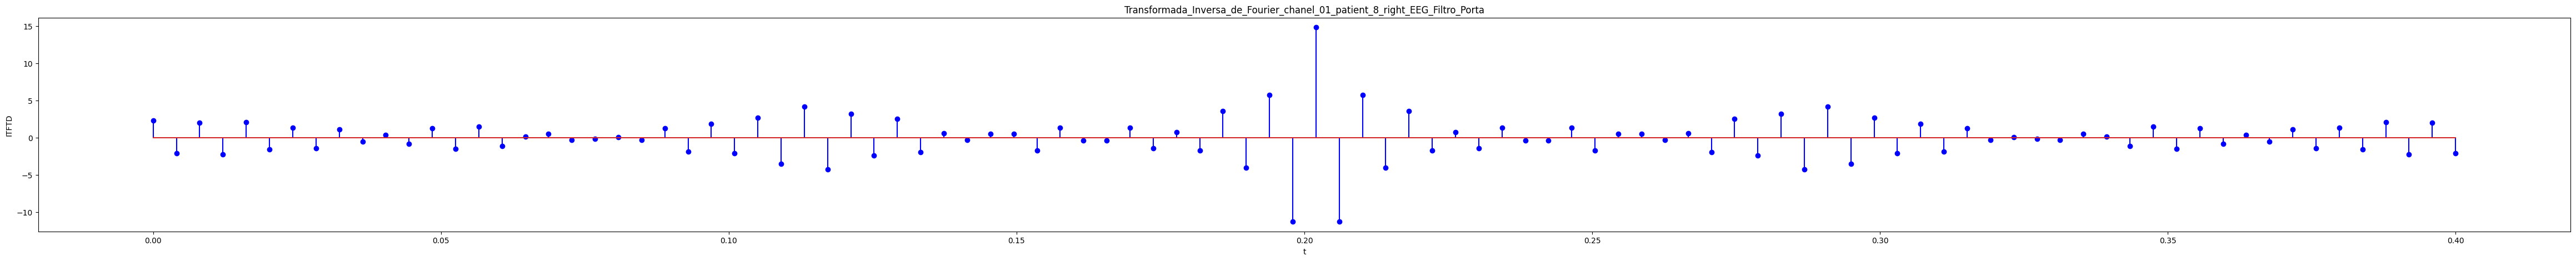

chanel_02_patient_8_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.7538174769359065, 3.425555581981208, 5.2940232587622775, 3.088128827539833, 8.42804015465856, 6.035466111042631, 6.169544109069083, 9.168413199118683, 5.986139646396757, 8.826937191679013, 5.180777885621225, 6.052169001527885, 4.286322742408256, 9.822984578344034, 19.09463870779364, 4.768317588032457, 5.4307767849104716, 13.353663208559842, 0.4523817124382936, 5.716080014260578, 29.423213818687454, 35.04531833638024, 21.524627519000322, 51.920165326753335, 79.43739504843403, 91.21065667123104, 80.46862311499378, 31.047130137938815, 48.23140670891319, 21.395241657701607, 178.2497901884489, 21.395241657701607, 48.23140670891319, 31.047130137938815, 80.46862311499378, 91.21065667123104, 79.43739504843403, 51.920165326753335, 21.524627519000322, 35.04531833638024, 29.423213818687454, 5.716080014260578, 0.4523817124382936, 13.353663208559842, 5.4307767849104716, 4

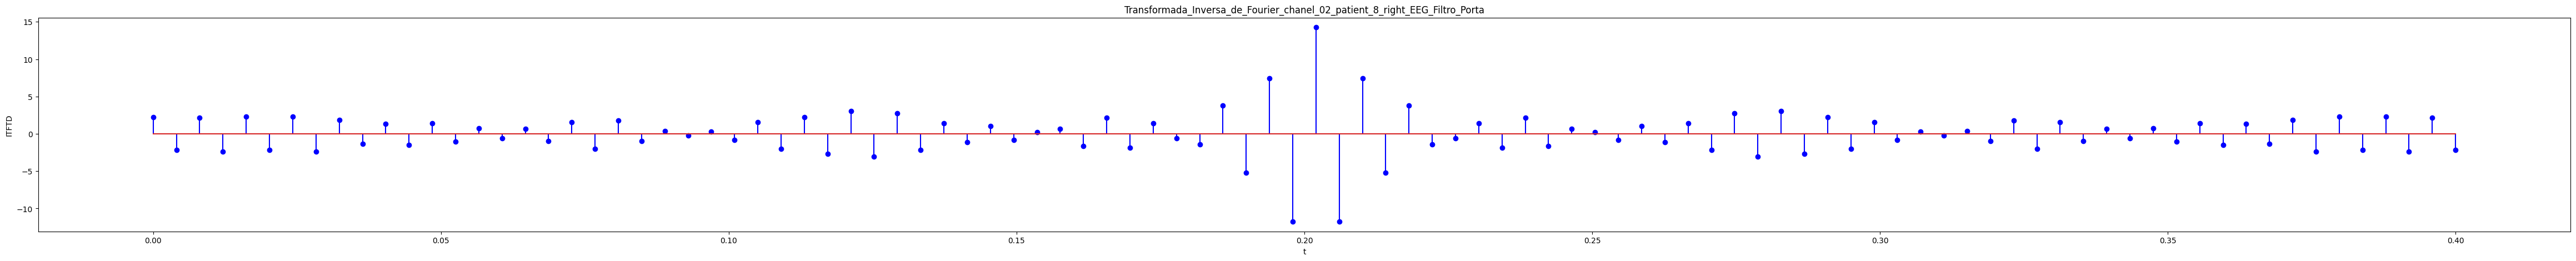

chanel_03_patient_8_right [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.990451342108339, 6.232469952576614, 10.116130922004636, 5.249627043217828, 0.5359171413170182, 14.54622124937244, 12.430230644087356, 17.250643535749358, 12.615548526793935, 10.661294548430776, 11.625211153929682, 4.041157747013745, 9.547806785311309, 14.933431181330436, 31.021813031861765, 7.475552657936109, 18.370314423720338, 12.095385672489332, 16.97327178171578, 9.420917005470535, 4.356832310805792, 35.336688478244206, 29.223687894800985, 78.38904379820202, 30.146679530639183, 115.18873629621224, 64.58297747350205, 16.429933897619698, 64.16576425940437, 50.94005258186002, 53.852140077821005, 50.94005258186002, 64.16576425940437, 16.429933897619698, 64.58297747350205, 115.18873629621224, 30.146679530639183, 78.38904379820202, 29.223687894800985, 35.336688478244206, 4.356832310805792, 9.420917005470535, 16.97327178171578, 12.095385672489332, 18.37031442372

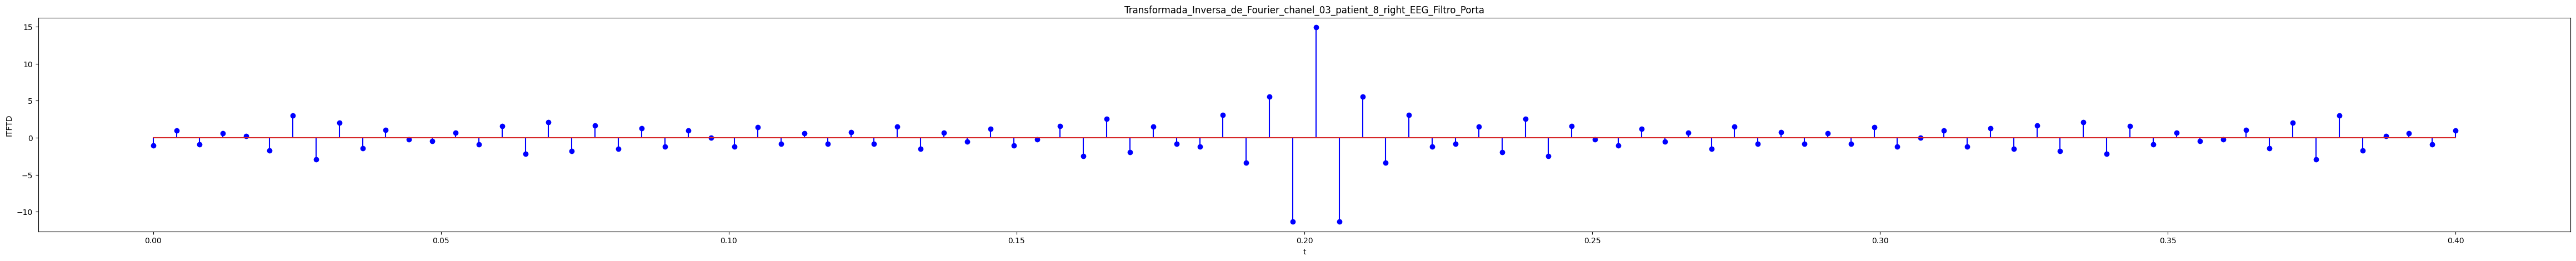

In [ ]:
chanels_filtered_test1 = {}
for k in p:
  patient = "patient_"+str(k)
  chanels_filtered_test1[patient] = {}
  chanels_filtered_test1[patient]["left"] = {}
  chanels_filtered_test1[patient]["right"] = {}
  chanels_filtered_test1[patient]["left"] = ITFTD(chanels_filtered[patient]["left"], chanels_count, start, tam)
  chanels_filtered_test1[patient]["right"] = ITFTD(chanels_filtered[patient]["right"], chanels_count, start, tam)

**Cometários:**

É possível notar, então, que a aplicação de filtro ideal (porta na frequência) não implica em uma filtragem ótima pois gera uma convolução do sinal com uma sinc no tempo, como esperado, o que altera a visualização dos valores ao final no tempo, bem como, e principalmente, gera um gasto de processamento muito elevado, pois é uma resposta muito lenta para uma aplicação em tempo real.

**Comentários:**

Vamos fazer um vetor v para cada janela com as informações de cada canal para cada mão de cada paciente.

In [ ]:
 def filtering_signal_1(v:list,N:int,tam:int):   ##Aplicação do filtro Butterworth de primeira ordem, pois reduz o tempo operacional
    b = {}
    a = {}
    w = {}
    h = {}
    fc = 100 ##frequência de corte sugerida
    fs = 250
    wn = fc/(fs/2)
    t = np.linspace(0,0.4,tam)
    b, a = signal.iirfilter(N, wn, btype='lowpass', analog=False, ftype='butter')
    w, h = signal.freqz(b, a)
    filtered_signal = signal.filtfilt(b, a, v)
    return list(filtered_signal)

In [ ]:
v = {}
v["patient_4"] = {}
v["patient_4"]["left"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_4"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux =[filtering_signal_1(chanels[patient]["left"]["chanel_01_patient_4_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_02_patient_4_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_03_patient_4_left"][st:st+tam],1,tam)]
  v[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7) ##sobreposição de 30%

In [ ]:
v_not_filtered = {}
v_not_filtered["patient_4"] = {}
v_not_filtered["patient_4"]["left"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_4"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux =[chanels[patient]["left"]["chanel_01_patient_4_left"][st:st+tam],chanels[patient]["left"]["chanel_02_patient_4_left"][st:st+tam],chanels[patient]["left"]["chanel_03_patient_4_left"][st:st+tam]]
  v_not_filtered[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7) ##sobreposição de 30%

In [ ]:

v["patient_4"]["right"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_4"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [filtering_signal_1(chanels[patient]["right"]["chanel_01_patient_4_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_02_patient_4_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_03_patient_4_right"][st:st+tam],1,tam)]
  v[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
v_not_filtered["patient_4"]["right"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_4"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [chanels[patient]["right"]["chanel_01_patient_4_right"][st:st+tam],chanels[patient]["right"]["chanel_02_patient_4_right"][st:st+tam],chanels[patient]["right"]["chanel_03_patient_4_right"][st:st+tam]]
  v_not_filtered[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:

v["patient_5"] = {}
v["patient_5"]["left"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_5"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux = [filtering_signal_1(chanels[patient]["left"]["chanel_01_patient_5_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_02_patient_5_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_03_patient_5_left"][st:st+tam],1,tam)]
  v[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:

v_not_filtered["patient_5"] = {}
v_not_filtered["patient_5"]["left"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_5"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux = [chanels[patient]["left"]["chanel_01_patient_5_left"][st:st+tam],chanels[patient]["left"]["chanel_02_patient_5_left"][st:st+tam],chanels[patient]["left"]["chanel_03_patient_5_left"][st:st+tam]]
  v_not_filtered[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
v["patient_5"]["right"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_5"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [filtering_signal_1(chanels[patient]["right"]["chanel_01_patient_5_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_02_patient_5_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_03_patient_5_right"][st:st+tam],1,tam)]
  v[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
v_not_filtered["patient_5"]["right"] = {}
st = 0
i = 0

while (st+tam)<18840:
  i+=1
  patient = "patient_5"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [filtering_signal_1(chanels[patient]["right"]["chanel_01_patient_5_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_02_patient_5_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_03_patient_5_right"][st:st+tam],1,tam)]
  v_not_filtered[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:

v["patient_8"] = {}
v["patient_8"]["left"] = {}
st = 0
i = 0

while (st+tam)<25120:
  i+=1
  patient = "patient_8"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux = [filtering_signal_1(chanels[patient]["left"]["chanel_01_patient_8_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_02_patient_8_left"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["left"]["chanel_03_patient_8_left"][st:st+tam],1,tam)]
  v[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:

v_not_filtered["patient_8"] = {}
v_not_filtered["patient_8"]["left"] = {}
st = 0
i = 0

while (st+tam)<25120:
  i+=1
  patient = "patient_8"
  label = "v_"+str(i)+"_"+patient+"_left"
  v_aux = [chanels[patient]["left"]["chanel_01_patient_8_left"][st:st+tam],chanels[patient]["left"]["chanel_02_patient_8_left"][st:st+tam],chanels[patient]["left"]["chanel_03_patient_8_left"][st:st+tam]]
  v_not_filtered[patient]["left"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
v["patient_8"]["right"] = {}
st = 0
i = 0

while (st+tam)<25120:
  i+=1
  patient = "patient_8"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [filtering_signal_1(chanels[patient]["right"]["chanel_01_patient_8_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_02_patient_8_right"][st:st+tam],1,tam),filtering_signal_1(chanels[patient]["right"]["chanel_03_patient_8_right"][st:st+tam],1,tam)]
  v[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
v_not_filtered["patient_8"]["right"] = {}
st = 0
i = 0

while (st+tam)<25120:
  i+=1
  patient = "patient_8"
  label = "v_"+str(i)+"_"+patient+"_right"
  v_aux = [chanels[patient]["right"]["chanel_01_patient_8_right"][st:st+tam],chanels[patient]["right"]["chanel_02_patient_8_right"][st:st+tam],chanels[patient]["right"]["chanel_03_patient_8_right"][st:st+tam]]
  v_not_filtered[patient]["right"][label] = np.array(v_aux)
  st += int(tam*0.7)

In [ ]:
list(v["patient_8"]["left"].values())[0].T.shape

(100, 3)

In [ ]:
list(v["patient_8"]["left"].values())[0].T

array([[ 2.91005653,  4.74885569,  7.3987494 ],
       [ 4.17514941,  5.14378837,  8.95691472],
       [ 3.58625813,  5.20787982,  9.89126664],
       [ 3.88275721,  5.42562112,  9.70823904],
       [ 2.79353262,  4.54004583,  8.90221425],
       [ 0.91107045,  2.95965316,  7.85348485],
       [-0.04379982,  2.95487243,  7.49206411],
       [ 0.62002143,  3.78620303,  6.0086056 ],
       [ 1.18604704,  3.28487904,  4.63269616],
       [ 1.89349459,  3.64512121,  5.50846517],
       [ 3.19871676,  5.07107277,  5.35399047],
       [ 2.80284835,  3.02476381,  4.65197063],
       [ 1.47654455,  0.35215136,  4.69944246],
       [-0.28413321, -2.43839686,  3.69410369],
       [-1.53500932, -5.12656136,  4.47372377],
       [-2.50972766, -5.52053761,  5.220214  ],
       [-2.05992707, -5.60822137,  4.1408141 ],
       [-0.73683195, -4.87464618,  3.77669309],
       [-0.19930133, -4.31440592,  3.15970164],
       [-0.5105988 , -4.34481434,  2.17277567],
       [-0.76647875, -3.36953587,  2.459

Início da aplicação de IA:

In [ ]:
def atributos(k):
    # k is the dataset
    [lin, col] = k.shape
##     AAC   %Average Amplitude Change
##     DASDV %Difference Absolute Deviation
##     IAV   %Intagrated Absolute Value
##     LOGD  %Logarithm Detector
##     MAV   %Mean Absolute Value
##     MLOGK %Mean Logarithm Kernel
##     RMS   %Root Mean Square
##     KURT  %Kurtosis
##     SSC   %Slope Sign Changes
##     SSI   %Simple Square Integral
##     SSI   %Simple Square Integral
##     VAR   %Variance
##     WFL   %Waveform Length
##     ZCS   %Zero Crossings
##     TM3   %Third Moment
##     TM4   %Fourth Moment
##     TM5   %Fifth Moment
##     STD   %Standard Deviation
##     MVAL  %Mean Value
##     MAX   %Maximum Amplitude
##     PSR   %Power Spectrum Ratio
##     PKF   %Peak Frequency
##     MNP   %Mean Power
##     MDF   %Median Frequency
##     MNF   %Mean Frequency   
##     TTP   %Total Power
##     VCF   %Variance of Central Frequency
##     SM1   %1st Spectral Moments
##     SM2   %2s     "        "
##     SM3   %3rd    "        "
    AAC = np.array([])
    DASDV = np.array([])
    IAV = np.array([])
    LOGD = np.array([])
    MAV = np.array([])
    MLOGK = np.array([])
    RMS = np.array([])
    KURT = np.array([])
    SSC = np.array([])
    SSI = np.array([])
    VAR = np.array([])
    WFL = np.array([])
    ZCS = np.array([])
    TM3= np.array([])
    TM4 = np.array([])
    TM5 = np.array([])
    STD = np.array([])
    MVAL = np.array([])
    MAX = np.array([])
    PSR = np.array([])
    PKF = np.array([])
    MNP = np.array([])
    MDF = np.array([])
    MNF = np.array([])
    TTP = np.array([])
    VCF = np.array([])
    SM1 = np.array([])
    SM2 = np.array([])
    SM3 = np.array([])



    # colocar o loop (o = 1:col)
    for o in range(0,col):

        F, P = signal.periodogram(k[:,o])

        AAC = np.append(AAC, [[(1/lin)*(np.sum(np.abs(np.diff(k[o,:]))))]])
        DASDV = np.append(DASDV,[[np.sqrt((1/(lin-1))*np.sum(np.diff(k[o,:])**2))]])
        IAV = np.append(IAV,[[np.sum(k[o,:])]])
        LOGD = np.append(LOGD, [[np.exp((1/lin)*(np.sum(np.log10(0.0001 + (np.abs(k[o,:]))))))]])
        MAV = np.append(MAV, [[(1/lin)*(np.sum(np.abs(k[o,:])))]])
        MLOGK = np.append(MLOGK, [[(1/lin)*(np.abs(np.sum(k[o,:])))]])
        RMS = np.append(RMS, [[np.sqrt((1/lin)*(np.sum(k[o,:]**2)))]])
        KURT = np.append(KURT, [[kurtosis(k[o,:])]])
        SSC = np.append(SSC, [[len(np.nonzero(np.diff(np.sign(np.diff(k[o,:])))))]])
        SSI = np.append(SSI, [[np.sum(k[o,:]**2)]])
        VAR = np.append(VAR, [[np.var(k[o,:])]])
        WFL = np.append(WFL, [[0]])
        ZCS = np.append(ZCS,[[len(np.nonzero(np.diff(np.sign(k[o,:]))))]])
        TM3 = np.append(TM3,[[np.abs((1/lin)*(np.sum(k[o,:]**3)))]])
        TM4 = np.append(TM4,[[np.abs((1/lin)*(np.sum(k[o,:]**4)))]])
        TM5 = np.append(TM5,[[np.abs((1/lin)*(np.sum(k[o,:]**5)))]])
        STD = np.append(STD,[[np.std(k[o,:])]])
        MVAL = np.append(MVAL,[[(1/lin)*(np.sum(k[o,:]))]])
        MAX = np.append(MAX,[[np.amax(k[o,:])]])
        PSR = np.append(PSR, [[((np.amax(P)/(np.sum(P))))]])
        MNF = np.append(MNF,[[np.sum(F*P)/np.sum(P)]])
        MNP = np.append(MNP,[[np.sum(P)/len(F)]])
        PKF = np.append(PKF,[[np.amax(P)]])
        TTP = np.append(TTP,[[np.sum(P)]])
        SM1 = np.append(SM1,[[np.sum(F*P)]])
        SM2 = np.append(SM2,[[np.sum((F**2)*P)]])
        SM3 = np.append(SM3,[[np.sum((F**3)*P)]])
        VCF = np.append(VCF,[[(((SM2[o]/TTP[o]) - ((SM1[o])/TTP[o]))**2)]])
        MDF = np.append(MDF,[[[(1/2)*(np.sum(P))]]])


    allFeatures = np.hstack((AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF))

    return allFeatures

In [ ]:

def atributos_modificado(k):
    # k is the dataset
    [lin, col] = k.shape

    AAC = np.array([]) 
    DASDV = np.array([]) 
    IAV = np.array([])
    LOGD = np.array([])
    MAV = np.array([])
    MLOGK = np.array([])
    RMS = np.array([]) # valor efetivo
    KURT = np.array([])
    SSC = np.array([])
    SSI = np.array([])
    VAR = np.array([]) # Variância
    WFL = np.array([])
    ZCS = np.array([])
    TM3= np.array([])
    TM4 = np.array([])
    TM5 = np.array([])
    STD = np.array([])
    MVAL = np.array([])
    MAX = np.array([]) # valor máximo
    PSR = np.array([])
    PKF = np.array([])
    MNP = np.array([])
    MDF = np.array([])
    MNF = np.array([])
    TTP = np.array([])
    VCF = np.array([])
    SM1 = np.array([])
    SM2 = np.array([])
    SM3 = np.array([])



    # colocar o loop (o = 1:col)
    for o in range(0,col):
        F, P = signal.periodogram(k[:,o])
        print(k[o,:])
        AAC = np.append(AAC, [[(1/lin)*(np.sum(np.abs(np.diff(k[:,o]))))]])
        DASDV = np.append(DASDV,[[np.sqrt((1/(lin-1))*np.sum(np.diff(k[:,o])**2))]])
        IAV = np.append(IAV,[[np.sum(k[:,o])]])
        LOGD = np.append(LOGD, [[np.exp((1/lin)*(np.sum(np.log10(0.0001 + (np.abs(k[:,o]))))))]])
        MAV = np.append(MAV, [[(1/lin)*(np.sum(np.abs(k[:,o])))]])
        MLOGK = np.append(MLOGK, [[(1/lin)*(np.abs(np.sum(k[:,o])))]])
        RMS = np.append(RMS, [[np.sqrt((1/lin)*(np.sum(k[:,o]**2)))]])
        KURT = np.append(KURT, [[kurtosis(k[:,o])]])
        SSC = np.append(SSC, [[len(np.nonzero(np.diff(np.sign(np.diff(k[:,o])))))]])
        SSI = np.append(SSI, [[np.sum(k[:,o]**2)]])
        VAR = np.append(VAR, [[np.var(k[:,o])]])
        WFL = np.append(WFL, [[0]])
        ZCS = np.append(ZCS,[[len(np.nonzero(np.diff(np.sign(k[:,o]))))]])
        TM3 = np.append(TM3,[[np.abs((1/lin)*(np.sum(k[:,o]**3)))]])
        TM4 = np.append(TM4,[[np.abs((1/lin)*(np.sum(k[:,o]**4)))]])
        TM5 = np.append(TM5,[[np.abs((1/lin)*(np.sum(k[:,o]**5)))]])
        STD = np.append(STD,[[np.std(k[:,o])]])
        MVAL = np.append(MVAL,[[(1/lin)*(np.sum(k[:,o]))]])
        MAX = np.append(MAX,[[np.amax(k[:,o])]])
        PSR = np.append(PSR, [[((np.amax(P)/(np.sum(P))))]])
        MNF = np.append(MNF,[[np.sum(F*P)/np.sum(P)]])
        MNP = np.append(MNP,[[np.sum(P)/len(F)]])
        PKF = np.append(PKF,[[np.amax(P)]])
        TTP = np.append(TTP,[[np.sum(P)]])
        SM1 = np.append(SM1,[[np.sum(F*P)]])
        SM2 = np.append(SM2,[[np.sum((F**2)*P)]])
        SM3 = np.append(SM3,[[np.sum((F**3)*P)]])
        VCF = np.append(VCF,[[(((SM2[o]/TTP[o]) - ((SM1[o])/TTP[o]))**2)]])
        MDF = np.append(MDF,[[[(1/2)*(np.sum(P))]]])

    #print(AAC)
    allFeatures = np.concatenate((AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF), axis=0)

    return allFeatures

In [ ]:
M = [] ##essa é a matriz de atributos que vamos usar 
atr_list_name =  ['AAC', 'DASDV', 'IAV', 'LOGD', 'MAV', 'MLOGK', 'RMS', 'KURT', 'SSC', 'SSI', 'VAR', 'WFL', 'ZCS', 'TM3', 'TM4', 'TM5', 'STD', 'MVAL', 'MAX', 'PSR', 'MNF', 'MNP', 'PKF', 'TTP', 'SM1', 'SM2', 'SM3', 'VCF', 'MDF']

for i,j in v["patient_4"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)
for i,j in v["patient_4"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)

[-0.15531499  1.00024458  0.3472639 ]
[-0.69601421  0.22046577 -1.99822404]
[-0.19855203  1.1058744  -2.99230514]
[-6.81752576 -4.63450068 -1.81413952]
[-6.3657101  -4.2649014  -2.09187994]
[-6.37951171 -3.86798457 -1.47967303]
[0.11380062 4.87415244 7.30348907]
[-0.00849372  2.38765321  5.96846658]
[-0.67625858  1.50993192  3.82182956]
[-2.50907433 -3.82351373 -4.05181433]
[-1.68861524 -2.24143227 -3.57784263]
[ 0.80464854 -2.76509571 -1.86367522]
[5.42761856 2.27125332 2.21363781]
[8.28961828 2.79085045 2.5827616 ]
[9.65646124 3.39585837 3.52092305]
[9.26610629 6.28850968 3.68446075]
[7.36770555 6.16796362 3.79018335]
[6.5514216  5.21027848 2.81158846]
[-0.54156926  1.67438239  0.3325518 ]
[-0.27074815  2.82384383  3.07383295]
[0.15658101 2.94897525 3.6011463 ]
[ 0.08383145 -0.86716329 -1.40061522]
[-3.28319691  0.50277324  0.10070707]
[-1.15930696  2.58587374  1.29837055]
[2.25104736 1.77375804 2.71614014]
[3.68730828 1.81830882 0.95531069]
[4.25024548 2.25095183 0.42920387]
[2.8015

In [ ]:

for i,j in v["patient_5"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)
for i,j in v["patient_5"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)


[-3.46848435  2.16930265 -1.22406969]
[-4.2444131   0.29259019 -4.11998637]
[-4.28964987 -0.91024117 -4.09157537]
[-4.67214982 -1.42636544 -1.25032284]
[-5.38335783 -0.94787666 -0.41787129]
[-3.82227206  0.13584302  1.33822767]
[-7.51963335 -4.34575296 -2.46743893]
[-7.43054335 -4.86918547 -2.52648356]
[-6.53890107 -4.30063002 -1.35903628]
[4.97348116 5.7288989  7.14359107]
[4.04701714 5.57364459 7.16790352]
[2.95191273 4.43785745 7.1377221 ]
[-2.87491026 -4.05965339  0.07125724]
[-2.63376285 -1.48019868  3.3986152 ]
[-1.07873837  0.29776005  5.61513872]
[-4.22950095 -5.81817286 -2.47885116]
[-2.8525125  -6.07523096 -2.45980831]
[-2.8342313  -7.67728993 -2.0413176 ]
[-0.84265716 -4.62692835 -2.06009522]
[-1.79093671 -4.93743276 -3.85395527]
[-1.91562009 -5.92524684 -3.59589694]
[ 0.6333009  -2.47502648 -0.81826828]
[ 0.49284853 -2.90883734 -1.46344051]
[ 1.18500924 -2.1736451  -1.78061011]
[ 4.71324379  1.25901807 -2.37601279]
[ 4.36730074  3.06380213 -1.0302917 ]
[5.72661388 4.2963034

In [ ]:

atr = {}
atr["patient_8"] = {}
atr["patient_8"]["left"] = {}
atr["patient_8"]["right"] = {}
atr["patient_8"]["left"]["labels"] = atr_list_name
atr["patient_8"]["right"]["labels"] = atr_list_name
for i,j in v["patient_8"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)
  atr["patient_8"]["left"][i+"_ch_01"] = output[:29]
  atr["patient_8"]["left"][i+"_ch_02"] = output[29:58]
  atr["patient_8"]["left"][i+"_ch_03"] = output[58:87]
for i,j in v["patient_8"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)
  atr["patient_8"]["right"][i+"_ch_01"] = output[:29]
  atr["patient_8"]["right"][i+"_ch_02"] = output[29:58]
  atr["patient_8"]["right"][i+"_ch_03"] = output[58:87]
df_atr_patient8_left = pd.DataFrame(data=atr["patient_8"]["left"])
display(df_atr_patient8_left)
df_atr_patient8_right = pd.DataFrame(data=atr["patient_8"]["right"])
display(df_atr_patient8_right)

[2.91005653 4.74885569 7.3987494 ]
[4.17514941 5.14378837 8.95691472]
[3.58625813 5.20787982 9.89126664]
[-0.59536732 -2.7561708   5.97565016]
[ 0.46741968 -2.38005523  5.40038217]
[ 0.0540061  -2.53437796  2.97142829]
[-5.25938106 -3.23997584  1.30137366]
[-6.21209596 -3.60635518 -0.39429464]
[-4.97021882 -4.31786135 -1.42870649]
[-1.57502111 -1.85676011  5.00321595]
[-1.62623646 -1.19909429  4.17830491]
[-1.16391491 -0.49484453  4.04772567]
[-3.29920589 -1.87964149  6.17501873]
[-1.77883541 -0.2022276   5.55451795]
[-1.62491258  1.8097681   5.15475216]
[-4.38346559  0.82223435  3.4852233 ]
[-4.33339713  1.89495225  5.09208264]
[-4.14417411  1.93139188  4.56918331]
[-4.5499509  -4.54468078 -2.67196075]
[-3.62823101 -6.16917136 -1.54393467]
[-3.01522265 -6.32330983 -1.5055881 ]
[-0.21972739 -2.78463291 -1.36405624]
[-0.16600695 -4.26095722 -1.71606681]
[-1.30449679 -5.03496263 -1.07774249]
[6.43269706 4.05654818 5.42745189]
[5.97523054 2.48376751 5.25717959]
[4.98298203 1.6088336  6.08

labels  v_1_patient_8_left_ch_01  v_1_patient_8_left_ch_02  \
0     AAC                  0.867490               5021.955776   
1   DASDV                  0.749991                  4.364426   
2     IAV                  1.003335                 13.546663   
3    LOGD                  1.032301                  6.984355   
4     MAV                  0.987479                  0.000000   
5   MLOGK                  1.294987                  0.000000   
6     RMS                168.212815                  0.000000   
7    KURT                164.719492                  1.000000   
8     SSC                657.534809                  1.000000   
9     SSI                  1.129878                  1.000000   
10    VAR                  1.355131                 28.886456   
11    WFL                  2.173683                 90.898644   
12    ZCS                  2.118692                428.939411   
13    TM3                  3.090768                139.539206   
14    TM4                  6.575348                852.910501   
15    TM5                  1.682128               3999.957175   
16    STD                  1.647195                690.955734   
17   MVAL                  6.575348               6726.983780   
18    MAX                  2.682160              40004.097894   
19    PSR                  4.032358                  2.089121   
20    MNF                  7.086576                  3.680579   
21    MNP                 -0.727253                  2.642793   
22    PKF                 -0.293815                  1.682128   
23    TTP                 -0.172647                  1.647195   
24    SM1                  1.000000                  6.575348   
25    SM2                  1.000000                  6.152028   
26    SM3                  1.000000                 10.566529   
27    VCF                719.398126                 13.518385   
28    MDF               1625.991380                  0.278984   

    v_1_patient_8_left_ch_03  v_2_patient_8_left_ch_01  \
0                   0.355297                  0.907120   
1                   0.507124                  0.871170   
2                   0.062424                  1.123698   
3                   0.030120                  1.148436   
4                   0.066876                  1.078715   
5                   8.557698                  1.403360   
6                  26.562084                 15.426407   
7                  13.694814                 99.244562   
8                 121.760563                498.245532   
9                 481.309107                  1.150513   
10                354.193633                  1.254320   
11                436.442613                  1.903595   
12               1354.666268                  2.250101   
13                698.435527                  2.961357   
14                 27.244648                  5.221840   
15                 40.802333                  0.154264   
16                 46.708253                  0.992446   
17                  3.663979                  4.982455   
18                  3.064510                  2.912229   
19                  4.812095                  3.978795   
20                  0.857371                  5.869223   
21                  0.558987                 -0.296981   
22                  0.829322                 -0.260253   
23                  0.002919                  1.093394   
24                  0.000776                  1.000000   
25                  0.003598                  1.000000   
26                218.221306                  1.000000   
27                677.333134                848.107628   
28                349.217764               1583.080997   

    v_2_patient_8_left_ch_02  v_2_patient_8_left_ch_03  \
0                3444.777901                  0.497382   
1                   8.457279                  0.188614   
2                  14.845862                  0.043569   
3                   9.622918                  0.029687   
4                   0

labels  v_1_patient_8_right_ch_01  v_1_patient_8_right_ch_02  \
0     AAC                   0.992786                1967.187988   
1   DASDV                   0.679256                   9.583667   
2     IAV                   0.996976                   8.877828   
3    LOGD                   1.200819                   9.706765   
4     MAV                   0.869017                   0.000000   
5   MLOGK                   1.304343                   0.000000   
6     RMS                  29.315410                   0.000000   
7    KURT                -239.069221                   1.000000   
8     SSC                -315.675699                   1.000000   
9     SSI                   1.266460                   1.000000   
10    VAR                   1.376466                  14.168780   
11    WFL                   1.553419                  71.594190   
12    ZCS                   2.570305                 113.571617   
13    TM3                   3.173259                 222.348776   
14    TM4                   3.750789                 440.173302   
15    TM5                   0.293154                 891.793732   
16    STD                   2.390692                 653.189253   
17   MVAL                   3.156757                2607.695485   
18    MAX                   3.109599                6580.773594   
19    PSR                   3.820110                   3.095750   
20    MNF                   4.435299                   2.979568   
21    MNP                  -0.705980                   3.115568   
22    PKF                  -0.995646                   0.293154   
23    TTP                   0.566141                  -2.390692   
24    SM1                   1.000000                  -3.156757   
25    SM2                   1.000000                   7.357043   
26    SM3                   1.000000                   4.069126   
27    VCF                 966.960625                   6.258288   
28    MDF                1459.323719                   0.431987   

    v_1_patient_8_right_ch_03  v_2_patient_8_right_ch_01  \
0                    0.737926                   0.973078   
1                    0.455288                   0.832178   
2                    0.039955                   0.993383   
3                    0.027242                   1.197578   
4                    0.045663                   1.040510   
5                   18.791504                   1.214427   
6                   17.407506                 209.283662   
7                   19.032873                  -0.719559   
8                  414.001600                -108.167906   
9                  655.117627                   1.431926   
10                 441.937178                   1.223693   
11                 958.366693                   1.530720   
12                 887.782793                   3.825065   
13                 970.676519                   2.547595   
14                  38.291798                   3.901552   
15                  24.185199                   2.092837   
16                  44.323637                   0.007196   
17                   4.415048                   1.081679   
18                   2.421133                   4.981161   
19                   4.965494                   3.054494   
20                   0.956961                   4.767202   
21                   0.501386                  -0.707763   
22                   0.945200                  -0.981062   
23                   0.001250                   0.677527   
24                   0.000601                   1.000000   
25                   0.001644                   1.000000   
26                 479.183346                   1.000000   
27                 443.891397                2481.196439   
28                 485.338260                 932.993575   

    v_2_patient_8_right_ch_02  v_2_patient_8_right_ch_03  \
0                 2272.621136                   0.267873   
1                   20.431999                   0.362871   
2          

In [ ]:
df = pd.DataFrame(data=M)
df

0         1         2         3         4         5           6   \
0     1.023242  0.751933  0.894361  1.270537  0.927637  1.115639 -188.512993   
1     1.189090  0.735478  0.888688  1.461740  0.919622  1.139395   -6.799104   
2     1.067701  0.690082  0.944351  1.332838  0.895949  1.227755  145.982655   
3     1.003470  0.635185  0.798442  1.266764  0.810797  1.016619  228.939746   
4     1.256822  0.901940  1.010381  1.601900  1.153886  1.349160   42.947951   
...        ...       ...       ...       ...       ...       ...         ...   
1783  0.809068  0.858907  1.682745  1.038290  1.115354  2.292272  147.066871   
1784  1.516309  0.986396  2.014358  1.900484  1.255411  2.700228  241.121859   
1785  1.408025  1.048662  2.569252  1.745482  1.322303  3.220452   67.569407   
1786  1.519298  1.163510  2.180999  1.921566  1.464720  2.907810  -27.078744   
1787  1.321817  1.015688  1.873199  1.723403  1.324017  2.287168  180.309853   

              7           8         9   ...        78        79        80  \
0    -136.298963 -166.799146  1.335338  ...  1.015478  0.549532  0.765073   
1      78.877502  174.532208  1.327858  ...  3.638151  1.171064  0.706210   
2      83.981296  236.704735  1.192623  ...  1.488363  0.550419  1.573102   
3      24.371228  138.166032  1.313912  ...  0.937734  0.376633  1.267756   
4     -28.155707  -14.455549  1.494709  ...  1.708229  0.434920  1.065472   
...          ...         ...       ...  ...       ...       ...       ...   
1783 -147.699894 -276.898630  1.130703  ...  0.622744  0.691352  3.222622   
1784 -128.977491   -1.220400  1.685809  ...  1.032536  1.904140  5.619866   
1785 -159.938615   17.454107  1.590530  ...  0.906871  0.834563  3.547544   
1786 -173.744912   78.492552  1.723461  ...  1.254123  3.360530  7.297767   
1787   98.162231  143.634868  1.386775  ...  1.516980  0.958406  2.986901   

            81        82        83           84           85           86  \
0     0.001391  0.001172  0.002150   566.573605   396.719467   297.517889   
1     0.003031  0.001126  0.000947   630.990291   554.047533   624.876829   
2     0.003499  0.000772  0.002108   353.375211   436.536607   404.479079   
3     0.002048  0.001785  0.002747   429.058607   245.946262   197.017421   
4     0.002275  0.001449  0.001821   896.263566   704.470447   584.232089   
...        ...       ...       ...          ...          ...          ...   
1783  0.002664  0.001973  0.004313   278.029434   339.383833   833.000278   
1784  0.002276  0.005901  0.004104  1374.832420   263.750200  1395.072588   
1785  0.001381  0.000886  0.002261  1620.695328  1063.986654  4070.382289   
1786  0.002295  0.003258  0.003279  1546.847982   859.521829  2635.047217   
1787  0.002722  0.002511  0.003698   896.808554   457.124756   937.728284   

         87  
0      left  
1      left  
2      left  
3      left  
4      left  
...     ...  
1783  right  
1784  right  
1785  right  
1786  right  
1787  right  

[1788 rows x 88 columns]

In [ ]:
labels= []
for i in range(3):
  for j in atr_list_name:
    labels.append(j+"_ch_"+str(i+1))
labels.append("classes")
print(labels)

['AAC_ch_1', 'DASDV_ch_1', 'IAV_ch_1', 'LOGD_ch_1', 'MAV_ch_1', 'MLOGK_ch_1', 'RMS_ch_1', 'KURT_ch_1', 'SSC_ch_1', 'SSI_ch_1', 'VAR_ch_1', 'WFL_ch_1', 'ZCS_ch_1', 'TM3_ch_1', 'TM4_ch_1', 'TM5_ch_1', 'STD_ch_1', 'MVAL_ch_1', 'MAX_ch_1', 'PSR_ch_1', 'MNF_ch_1', 'MNP_ch_1', 'PKF_ch_1', 'TTP_ch_1', 'SM1_ch_1', 'SM2_ch_1', 'SM3_ch_1', 'VCF_ch_1', 'MDF_ch_1', 'AAC_ch_2', 'DASDV_ch_2', 'IAV_ch_2', 'LOGD_ch_2', 'MAV_ch_2', 'MLOGK_ch_2', 'RMS_ch_2', 'KURT_ch_2', 'SSC_ch_2', 'SSI_ch_2', 'VAR_ch_2', 'WFL_ch_2', 'ZCS_ch_2', 'TM3_ch_2', 'TM4_ch_2', 'TM5_ch_2', 'STD_ch_2', 'MVAL_ch_2', 'MAX_ch_2', 'PSR_ch_2', 'MNF_ch_2', 'MNP_ch_2', 'PKF_ch_2', 'TTP_ch_2', 'SM1_ch_2', 'SM2_ch_2', 'SM3_ch_2', 'VCF_ch_2', 'MDF_ch_2', 'AAC_ch_3', 'DASDV_ch_3', 'IAV_ch_3', 'LOGD_ch_3', 'MAV_ch_3', 'MLOGK_ch_3', 'RMS_ch_3', 'KURT_ch_3', 'SSC_ch_3', 'SSI_ch_3', 'VAR_ch_3', 'WFL_ch_3', 'ZCS_ch_3', 'TM3_ch_3', 'TM4_ch_3', 'TM5_ch_3', 'STD_ch_3', 'MVAL_ch_3', 'MAX_ch_3', 'PSR_ch_3', 'MNF_ch_3', 'MNP_ch_3', 'PKF_ch_3', 'TTP_c

In [ ]:
filename = 'Data_PDS_filtered.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     writer.writerows(M)

In [ ]:
M = [] ##essa é a matriz de atributos que vamos usar 

for i,j in v_not_filtered["patient_4"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)
for i,j in v_not_filtered["patient_4"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)

[-0.15564202  0.99794003  0.34180209]
[-0.70496681  0.01220722 -1.99282826]
[-0.28992142  1.34889754 -3.14030671]
[-6.81162737 -4.62958724 -1.80972   ]
[-6.2684062  -4.17181659 -2.2278172 ]
[-6.53086137 -4.06195163 -1.30617227]
[0.11596857 4.87373159 7.30296788]
[0.04272526 2.39566644 6.08529793]
[-0.72327764  1.3244831   3.67437247]
[-2.51468681 -3.82391089 -4.04669261]
[-1.5350576  -2.00503548 -3.5553521 ]
[ 0.32654307 -3.01518273 -2.04470893]
[5.4352636  2.27359426 2.21560998]
[8.33142596 2.80460822 2.55130846]
[9.72304875 3.35698482 3.52178225]
[9.2683299  6.28976883 3.68047608]
[7.13206683 6.25314717 3.65606165]
[6.90623331 5.12703136 3.19829099]
[-0.54627298  1.669337    0.32959487]
[-0.29297322  2.88395514  3.21660182]
[0.18921187 2.94193942 3.5523003 ]
[ 0.08239872 -0.86671244 -1.40077821]
[-3.63469902  0.36316472  0.10681315]
[-1.03456168  2.7893492   1.31837949]
[2.25528344 1.77309834 2.7161059 ]
[3.72930495 1.7395285  0.98878462]
[4.2542153  2.3682002  0.23193713]
[2.8015564

In [ ]:

for i,j in v_not_filtered["patient_5"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)
for i,j in v_not_filtered["patient_5"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)


[-3.46684977  2.16983291 -1.22682536]
[-4.32440681  0.29297322 -4.19623102]
[-4.20843824 -0.98268101 -4.24505989]
[-4.6723125  -1.42519265 -1.2512398 ]
[-5.42000458 -0.91248951 -0.421149  ]
[-3.98870832  0.          1.24818799]
[-7.5226978  -4.34882124 -2.47501335]
[-7.50438697 -4.85847257 -2.56046387]
[-6.47287709 -4.43427176 -1.41298543]
[4.97444114 5.73128862 7.14427405]
[4.15655756 5.75570306 7.37010758]
[2.74967575 4.17486839 6.73838407]
[-2.87174792 -4.05889982  0.0701915 ]
[-2.67948425 -1.3916228   3.46379797]
[-1.12916762  0.20447089  5.60311284]
[-4.22674907 -5.81979095 -2.48111696]
[-2.75577935 -5.79232471 -2.39871824]
[-2.88700694 -8.09948882 -2.20340276]
[-0.84534981 -4.62653544 -2.06301976]
[-1.89517052 -4.93476768 -4.08026246]
[-1.79140917 -5.85946441 -3.35698482]
[ 0.63172351 -2.47501335 -0.82093538]
[ 0.47302968 -2.9236286  -1.17189288]
[ 1.13832303 -2.26749065 -2.39566644]
[ 4.71198596  1.2573434  -2.37735561]
[ 4.26947433  2.97550927 -1.23903258]
[5.74349584 4.5349813

In [ ]:


for i,j in v_not_filtered["patient_8"]["left"].items():
  output = list(atributos_modificado(j.T))
  output.append("left")
  M.append(output)

for i,j in v_not_filtered["patient_8"]["right"].items():
  output = list(atributos_modificado(j.T))
  output.append("right")
  M.append(output)



[2.90836957 4.74860761 7.40062562]
[4.47699702 5.16975662 8.90821698]
[ 3.17998016  5.19111925 10.05264363]
[-0.59510185 -2.75577935  5.96932937]
[ 0.48218509 -2.12710765  5.61226825]
[ 0.18005646 -2.98466468  2.74967575]
[-5.26436255 -3.24101625  1.29701686]
[-6.32333867 -3.61638819 -0.40588998]
[-4.97444114 -4.26031891 -1.47096971]
[-1.57167926 -1.86160067  5.00801099]
[-1.50148775 -1.20241093  4.15960937]
[-1.47096971 -0.4882887   4.00701915]
[-3.29900053 -1.87380789  6.17990387]
[-1.46791791 -0.23498894  5.68551156]
[-2.10269322  1.83413443  4.86457618]
[-4.3884947   0.82093538  3.4821088 ]
[-4.38544289  1.99893187  5.38033112]
[-4.04974441  1.83413443  4.22064546]
[-4.55024033 -4.54718853 -2.67032883]
[-3.58587015 -6.23788815 -1.55336843]
[-3.0670634  -6.3385977  -1.37331197]
[-0.21972992 -2.7862974  -1.37026017]
[-0.14343481 -4.18707561 -1.88601511]
[-1.22377356 -5.25520714 -0.8361944 ]
[6.43320363 4.05584802 5.42305638]
[6.3385977 2.3010605 5.0843061]
[4.31219959 1.90127413 6.32

In [ ]:
filename = 'Data_PDS_not_filtered.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     writer.writerows(M)

**Comentários**

Vamos dividir em csv de teste e treino para cada condição

In [ ]:
import math
df = pd.read_csv('Data_PDS_filtered.csv')
df_shuffled=df.sample(frac=1).reset_index(drop=True)
total_size=len(df_shuffled)
train_size=math.floor(0.9*total_size)
train=df_shuffled.head(train_size)
test=df_shuffled.tail(len(df_shuffled) -train_size)

In [ ]:
df_shuffled.shape

(1788, 88)

In [ ]:
filename = 'Data_PDS_filtered_train.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

l,c = train.shape
with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     for i in range(l):
      writer.writerow(train.iloc[i])

In [ ]:
filename = 'Data_PDS_filtered_test.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

l,c = test.shape
with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     for i in range(l):
      writer.writerow(test.iloc[i])

In [ ]:

df = pd.read_csv('Data_PDS_not_filtered.csv')
df_shuffled=df.sample(frac=1).reset_index(drop=True)
total_size=len(df_shuffled)
train_size=math.floor(0.9*total_size)
train=df_shuffled.head(train_size)
test=df_shuffled.tail(len(df_shuffled) -train_size)


In [ ]:
filename = 'Data_PDS_not_filtered_train.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

l,c = train.shape
with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     for i in range(l):
      writer.writerow(train.iloc[i])

In [ ]:
filename = 'Data_PDS_not_filtered_test.csv'
np.savetxt(filename,[[]],delimiter=',')

import csv

l,c = test.shape
with open(filename, 'w', newline='') as file:
     writer = csv.writer(file,dialect='excel')
      
     writer.writerow(labels)
     #writer.writerow(atr_list_name)
     for i in range(l):
      writer.writerow(test.iloc[i])